https://towardsdatascience.com/tagged/tds-feature-engineering

https://viblo.asia/p/feature-engineering-phan-2-feature-engineering-voi-du-lieu-dang-so-lien-tuc-continuous-numeric-data-1VgZvXr25Aw

https://viblo.asia/p/feature-engineering-phan-3-feature-engineering-voi-du-lieu-dang-phan-loai-categorical-data-GrLZDQx2lk0

https://en.wikipedia.org/wiki/Ordinal_data

https://scikit-learn.org/stable/modules/impute.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

https://en.wikipedia.org/wiki/Education_in_Portugal

https://github.com/scikit-learn-contrib/imbalanced-learn

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/#:~:text=the%20validation%20dataset.-,Early%20Stopping%20in%20Keras,configured%20when%20instantiated%20via%20arguments


# 1. Chọn dữ liệu

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## 1.1 Thư viện


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,ComplementNB,BernoulliNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping

Mounted at /content/drive


## 1.2 Đọc dữ liệu

In [ ]:
# rawData = pd.read_csv('Data/bank-additional-full.csv', sep=';')
rawData = pd.read_csv('/content/drive/My Drive/Machine_Learning/Data/bank-additional-full.csv', sep=';') #https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd
rawData = rawData.drop(['duration'], axis=1)
listAttrNames = rawData.columns.to_list()
print(listAttrNames)
print('Shape = ', rawData.shape)
rawData.info()
rawData.head()

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Shape =  (41188, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  pr

age        job  marital  ... euribor3m nr.employed   y
0   56  housemaid  married  ...     4.857      5191.0  no
1   57   services  married  ...     4.857      5191.0  no
2   37   services  married  ...     4.857      5191.0  no
3   40     admin.  married  ...     4.857      5191.0  no
4   56   services  married  ...     4.857      5191.0  no

[5 rows x 20 columns]

# 2. Vẽ biểu đồ box theo nhãn trước cân bằng

20
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


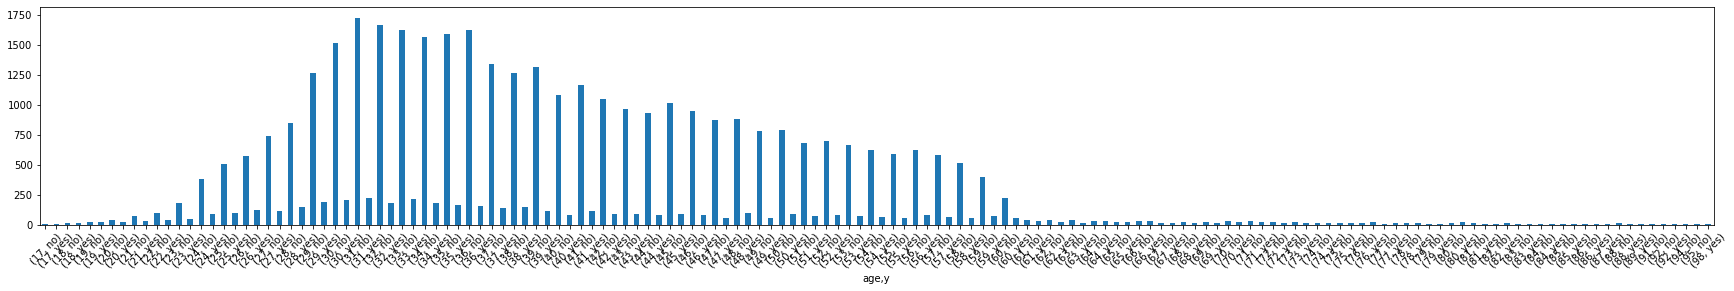

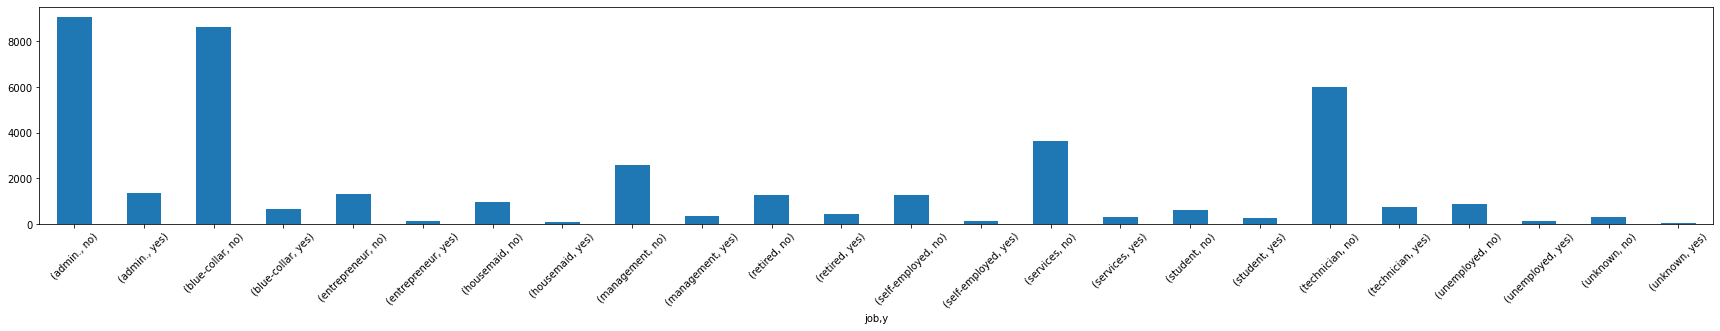

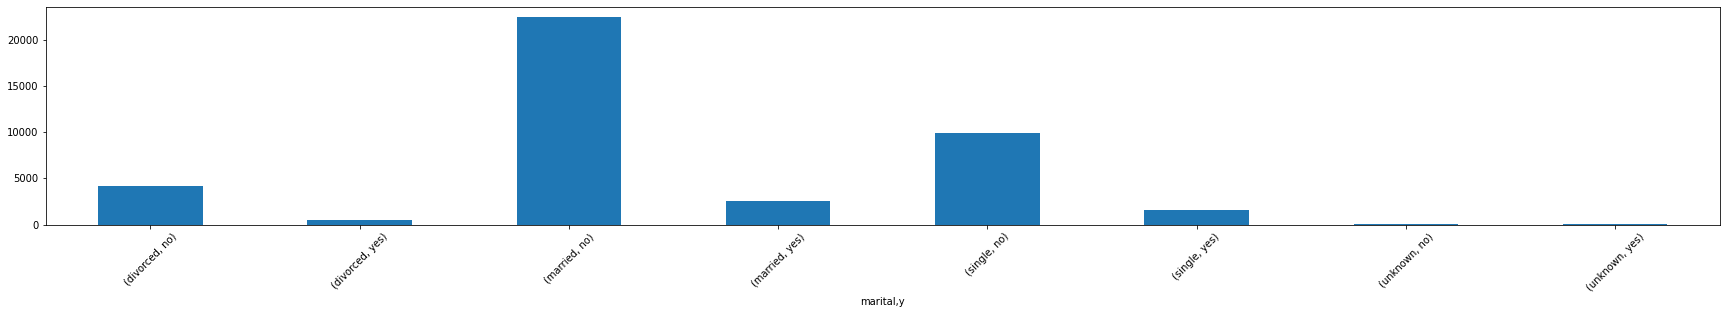

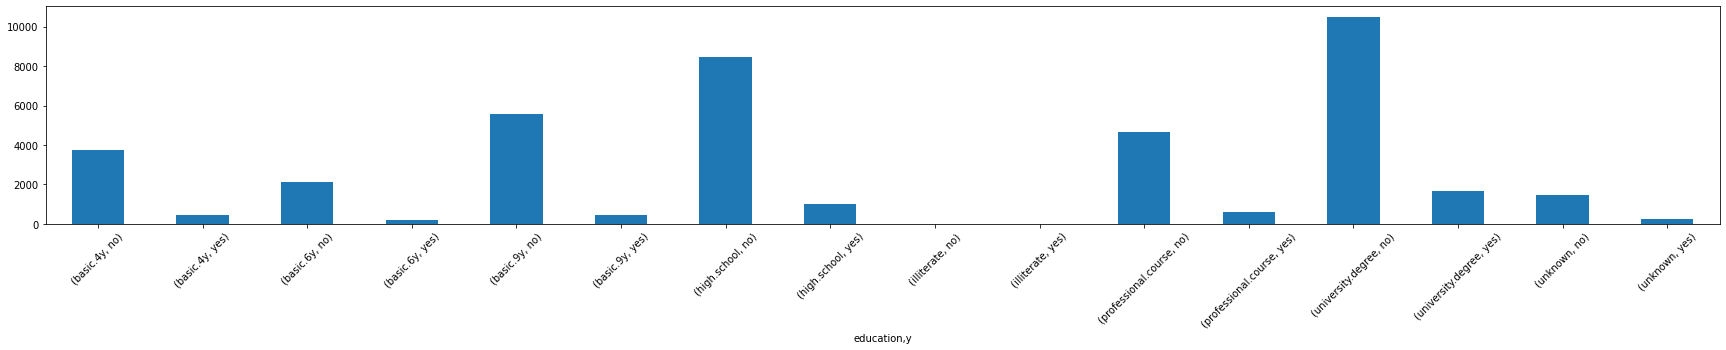

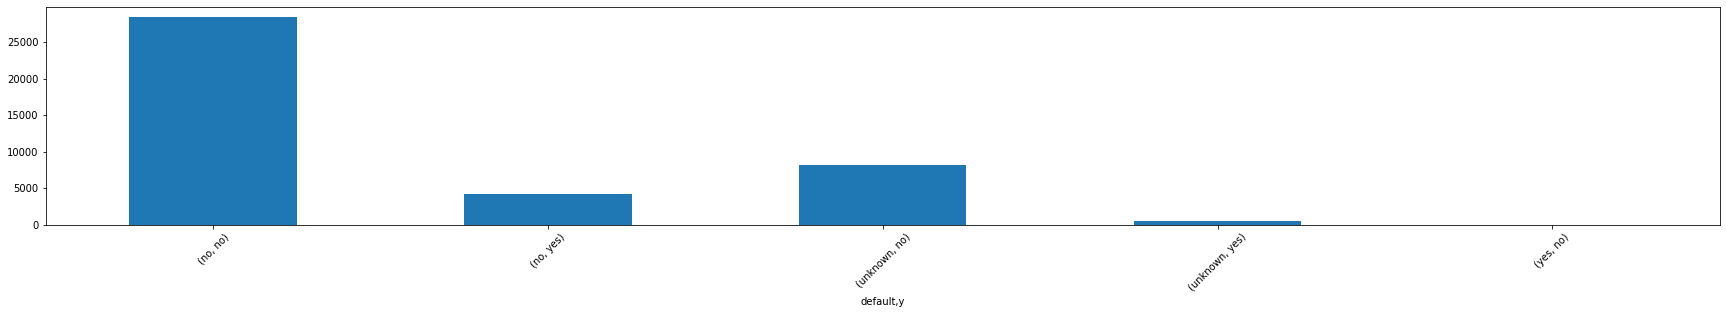

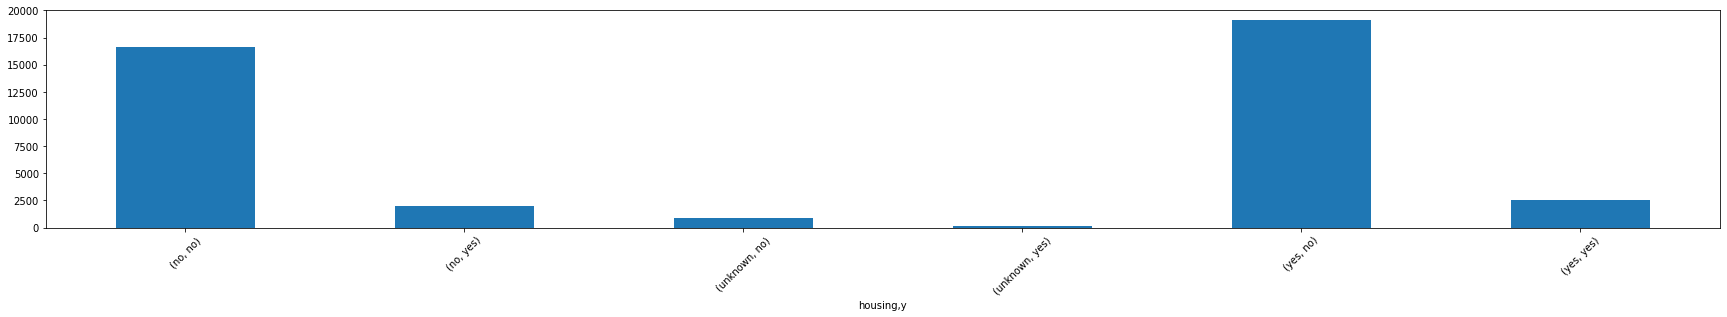

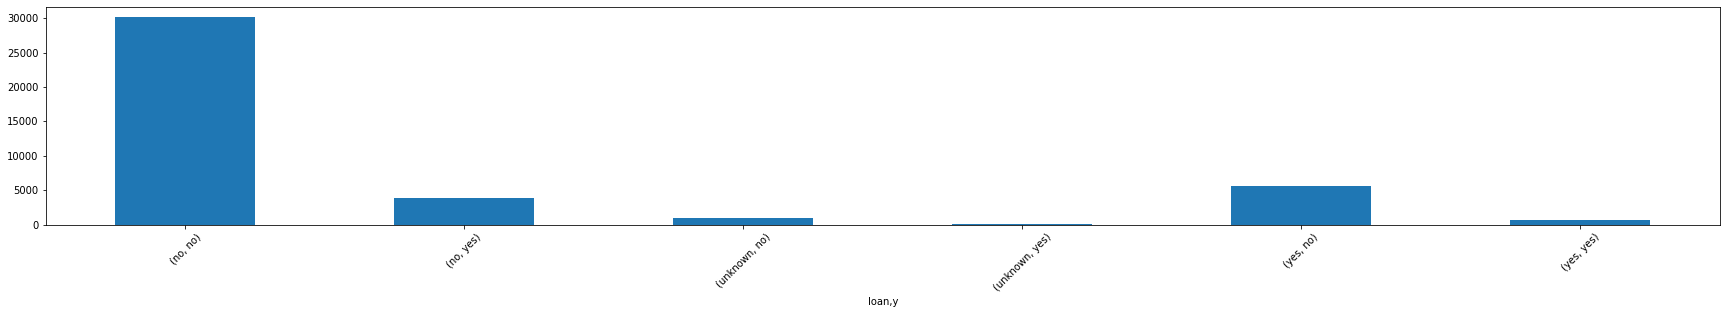

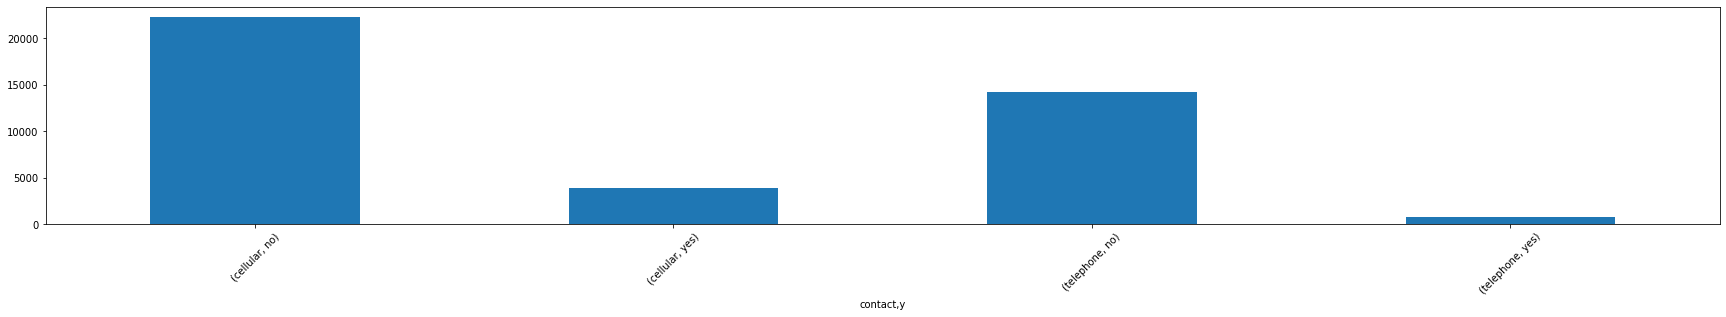

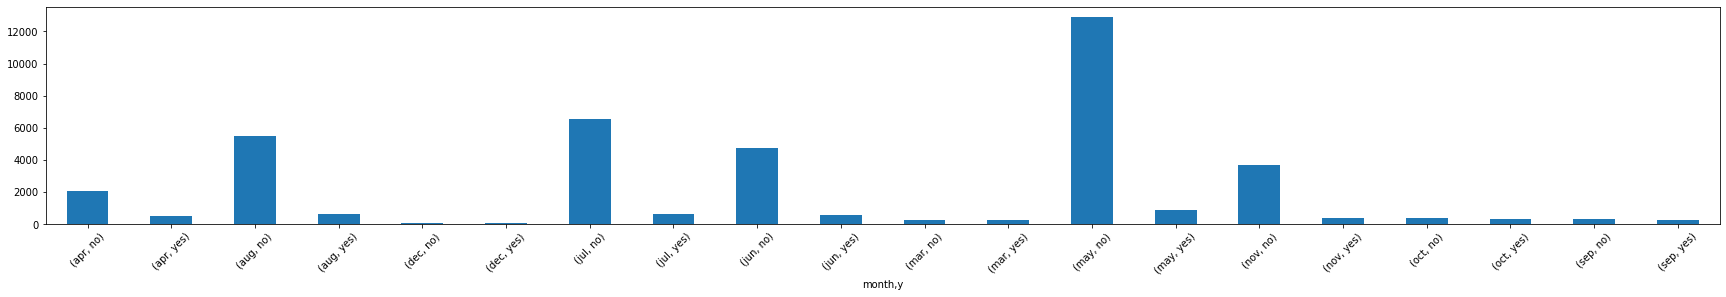

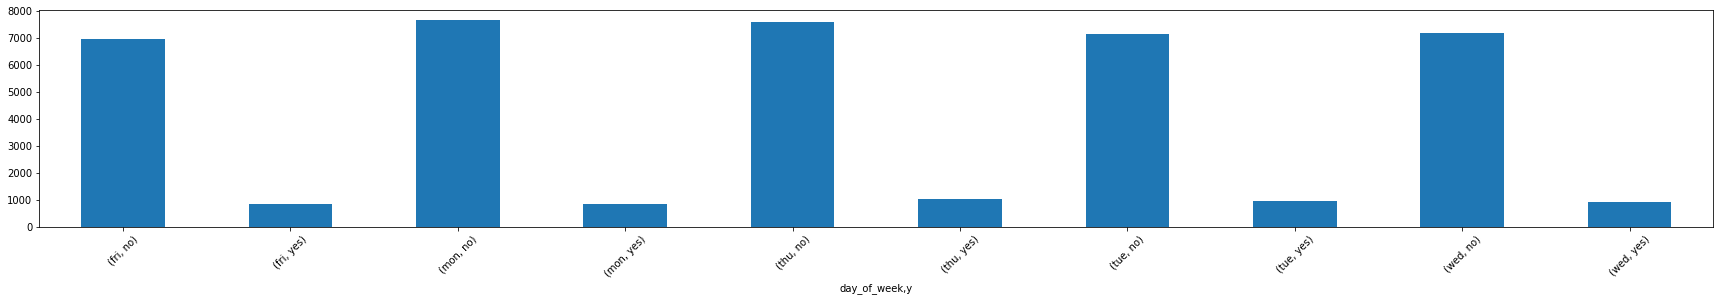

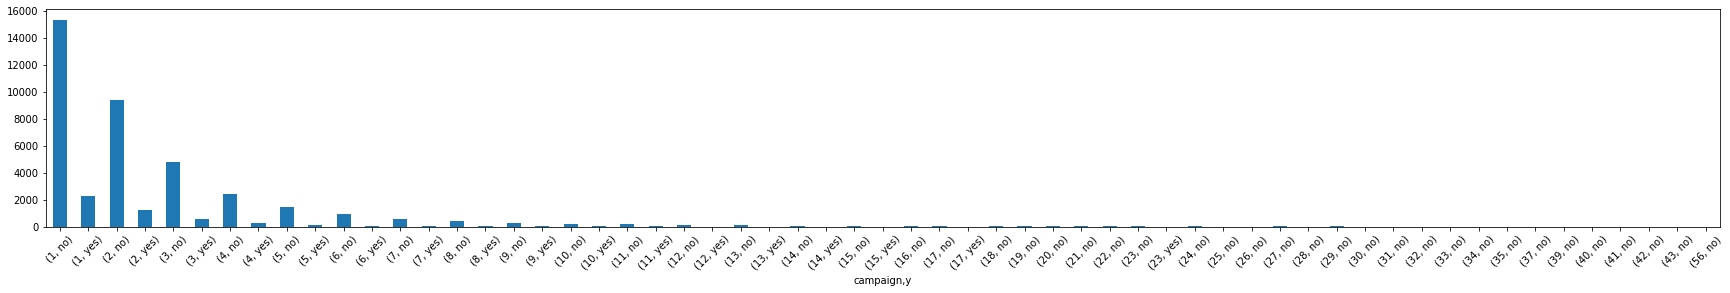

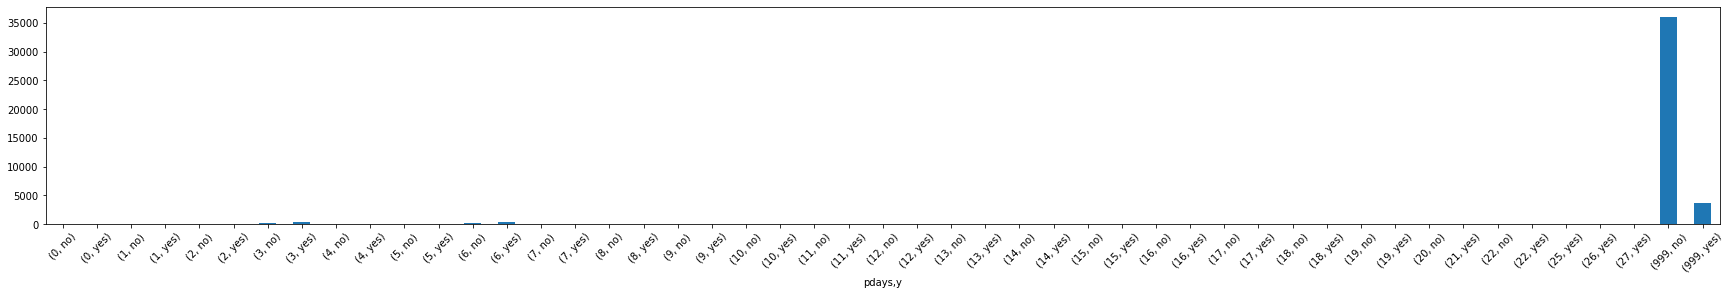

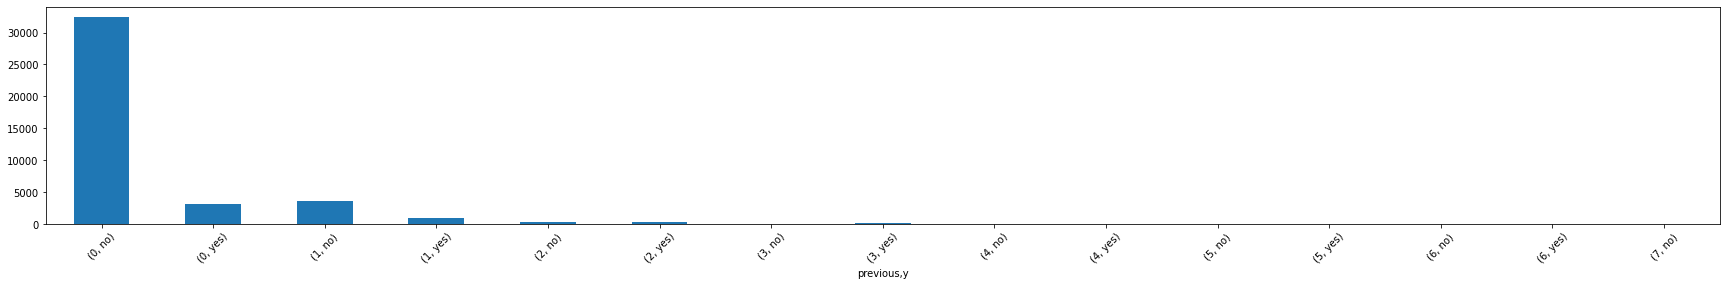

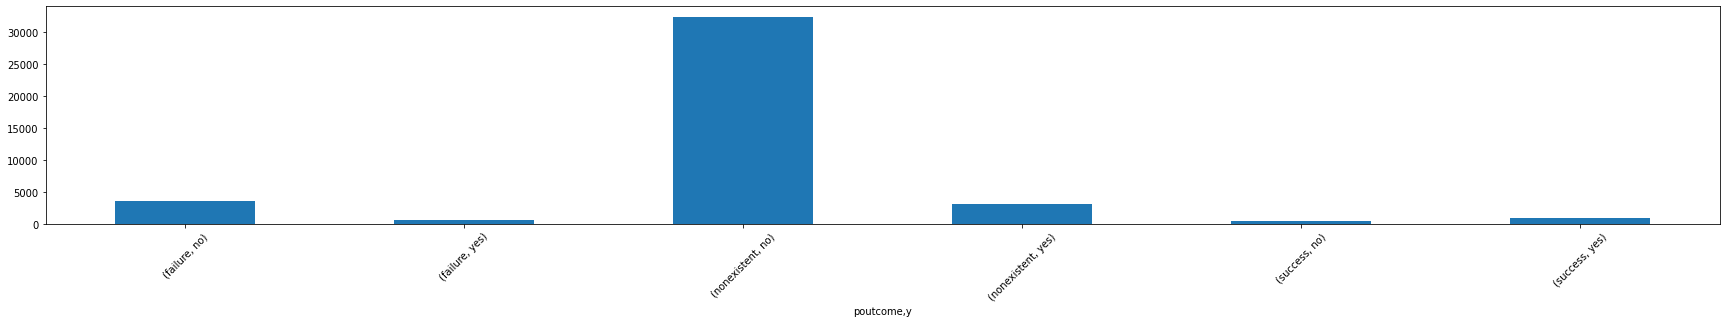

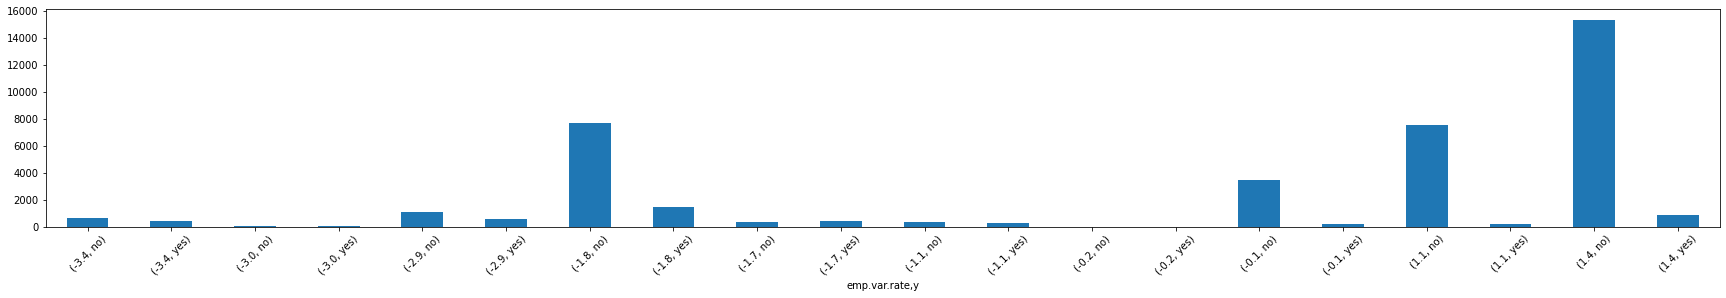

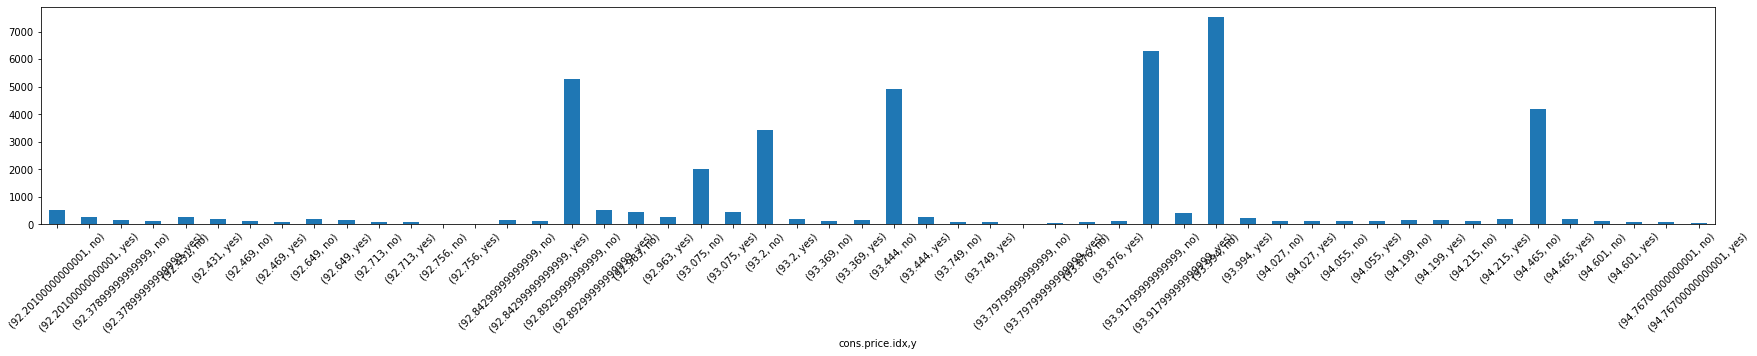

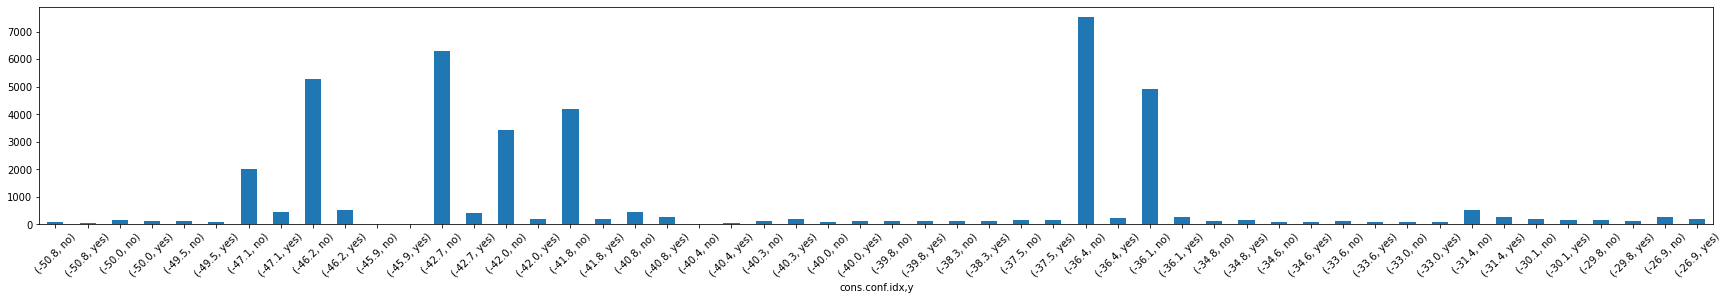

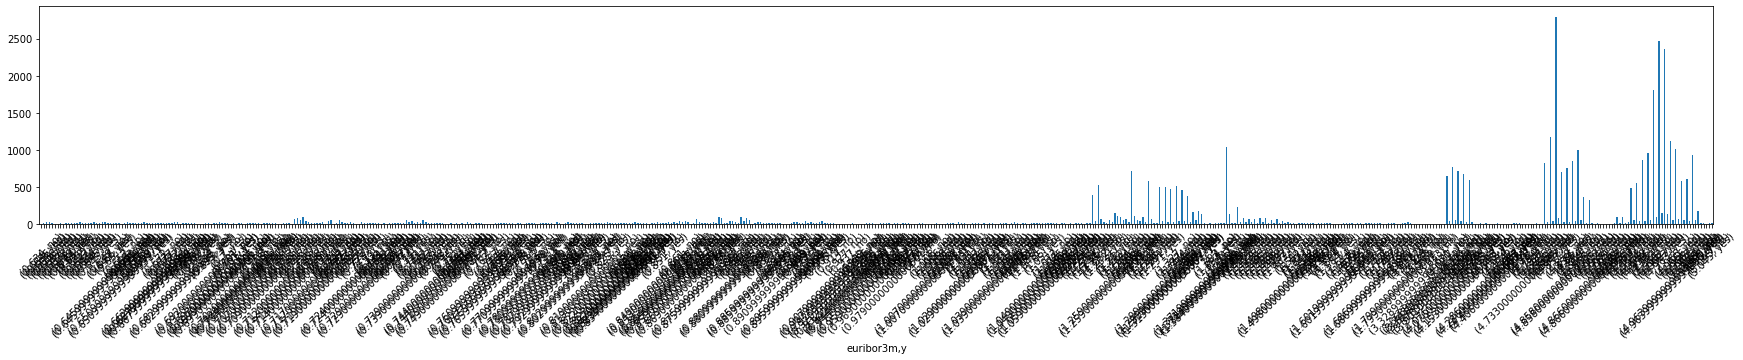

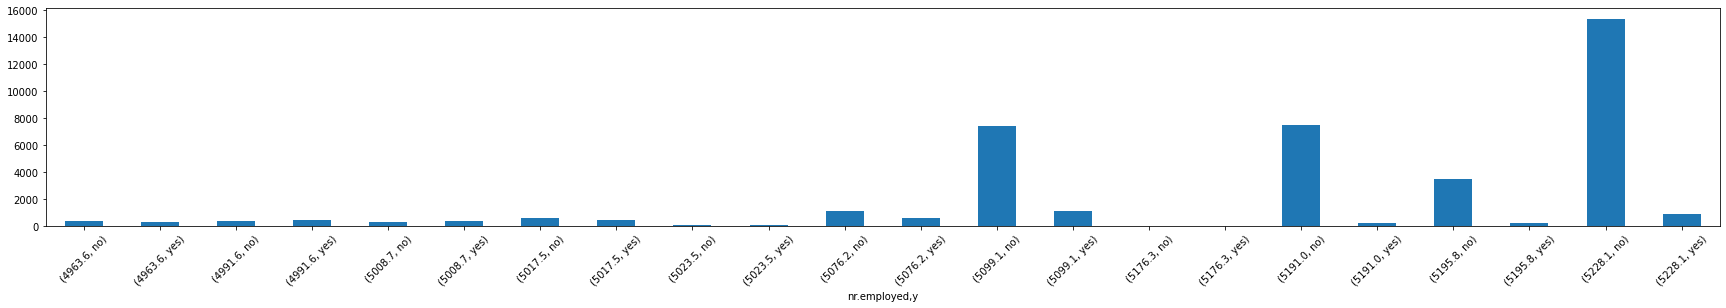

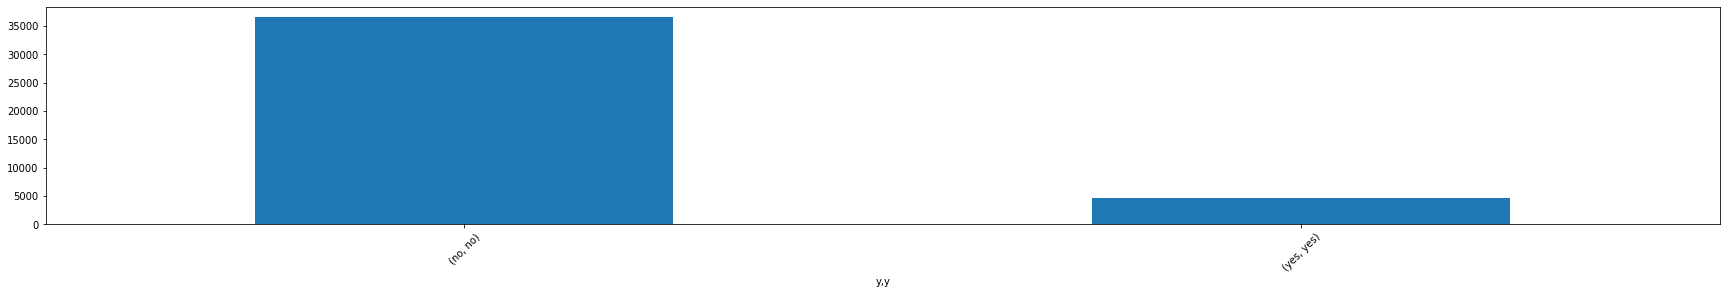

In [ ]:
print(len(listAttrNames))
print(listAttrNames)
for i in listAttrNames:
  plt.figure(figsize=(30,4))
  p = rawData.groupby([i, 'y']).size()
  p.plot.bar()#(stacked=True)
  plt.xticks(rotation=45)

# 3. Chuẩn hóa dữ liệu

## 3.1 Bỏ unknown

### Xem thuộc tính

In [ ]:
cateCols = list(set(rawData.select_dtypes(include='object').columns) - set(['y']))
numericCols = list(set(rawData.columns) - set(cateCols) - set(['y']))
print('Có %d thuộc tính phân loại (categorical): ' % len(cateCols), cateCols)
print('Có %d thuộc tính số (numeric): ' % len(numericCols), numericCols)

Có 10 thuộc tính phân loại (categorical):  ['housing', 'education', 'marital', 'loan', 'poutcome', 'contact', 'job', 'day_of_week', 'month', 'default']
Có 9 thuộc tính số (numeric):  ['pdays', 'emp.var.rate', 'cons.price.idx', 'previous', 'campaign', 'cons.conf.idx', 'nr.employed', 'age', 'euribor3m']


### Xem giá trị của thuộc tính

In [ ]:
for a in cateCols:
  print(a)
  print(rawData[a].unique(), end='\n\n')

housing
['no' 'yes' 'unknown']

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

marital
['married' 'single' 'divorced' 'unknown']

loan
['no' 'yes' 'unknown']

poutcome
['nonexistent' 'failure' 'success']

contact
['telephone' 'cellular']

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

default
['no' 'unknown' 'yes']



### Bỏ uknown bằng sklearn SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values='unknown', strategy='most_frequent')
nonUnknownData = rawData.copy()
nonUnknownData[cateCols] = imputer.fit_transform(nonUnknownData[cateCols])
for a in cateCols:
  print(a)
  print(nonUnknownData[a].unique(), end='\n\n')

housing
['no' 'yes']

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

marital
['married' 'single' 'divorced']

loan
['no' 'yes']

poutcome
['nonexistent' 'failure' 'success']

contact
['telephone' 'cellular']

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

default
['no' 'yes']



In [ ]:
# for a in numericCols:
#   print(nonUnknownData[a].unique(), end='\n\n')

## 3.2 Dữ liệu categorical

### 3.2.1 Chuyển nhãn yes no thành 1 0.

In [ ]:
le = LabelEncoder()
nonUnknownData.y = le.fit_transform(nonUnknownData.y)
print(nonUnknownData.y.value_counts())
nonUnknownData.head()

0    36548
1     4640
Name: y, dtype: int64


age        job  marital  ... euribor3m nr.employed  y
0   56  housemaid  married  ...     4.857      5191.0  0
1   57   services  married  ...     4.857      5191.0  0
2   37   services  married  ...     4.857      5191.0  0
3   40     admin.  married  ...     4.857      5191.0  0
4   56   services  married  ...     4.857      5191.0  0

[5 rows x 20 columns]

### 3.2.2 Có thứ tự (Ordinal)

One-hot encoding

In [ ]:
ordinalAttrs = ['education', 'default', 'housing', 'loan', 'poutcome']
ordinalEncodedData = pd.get_dummies(nonUnknownData, columns=ordinalAttrs)
ordinalEncodedData.head()

age        job  ... poutcome_nonexistent poutcome_success
0   56  housemaid  ...                    1                0
1   57   services  ...                    1                0
2   37   services  ...                    1                0
3   40     admin.  ...                    1                0
4   56   services  ...                    1                0

[5 rows x 31 columns]

### 3.2.3 Không thứ tự (nominal)

In [ ]:
nominalAttrs = ['job', 'marital', 'contact', 'month', 'day_of_week']
nominalEncodedData = pd.get_dummies(ordinalEncodedData, columns=nominalAttrs)
nominalEncodedData.head()

age  campaign  pdays  ...  day_of_week_thu  day_of_week_tue  day_of_week_wed
0   56         1    999  ...                0                0                0
1   57         1    999  ...                0                0                0
2   37         1    999  ...                0                0                0
3   40         1    999  ...                0                0                0
4   56         1    999  ...                0                0                0

[5 rows x 57 columns]

## 3.2.4 Dữ liệu numerical

Lấy thuộc tính numeric

In [ ]:
numericAttrs = list(set(listAttrNames) - set('y') - set(ordinalAttrs) - set(nominalAttrs))
print(len(numericAttrs))
print(numericAttrs)

listEncodedAttrs = nominalEncodedData.columns.to_list()
listNumericAttrIndex = []
for a in numericAttrs:
  if a in listEncodedAttrs:
    listNumericAttrIndex.append(listEncodedAttrs.index(a))

print(listNumericAttrIndex)

9
['pdays', 'cons.price.idx', 'previous', 'campaign', 'cons.conf.idx', 'nr.employed', 'emp.var.rate', 'age', 'euribor3m']
[2, 5, 3, 1, 6, 8, 4, 0, 7]


Min Max scale.

In [ ]:
scaler = MinMaxScaler()
data = nominalEncodedData.copy()
data[data.columns[listNumericAttrIndex]] = scaler.fit_transform(data[data.columns[listNumericAttrIndex]])
data.head()

age  campaign  pdays  ...  day_of_week_thu  day_of_week_tue  day_of_week_wed
0  0.481481       0.0    1.0  ...                0                0                0
1  0.493827       0.0    1.0  ...                0                0                0
2  0.246914       0.0    1.0  ...                0                0                0
3  0.283951       0.0    1.0  ...                0                0                0
4  0.481481       0.0    1.0  ...                0                0                0

[5 rows x 57 columns]

# 4. Xử lý cân bằng dữ liệu

## 4.1 Đếm số lượng theo nhãn

In [ ]:
no = data.y.value_counts()[0] #no
ye = data.y.value_counts()[1] #yes
print('yes: %d, %.2f%%\nno: %d, %.2f%%' % (ye, 100*ye/(ye+no), no, 100*no/(ye+no)))

yes: 4640, 11.27%
no: 36548, 88.73%


## 4.2 Cân bằng dữ liệu

### 4.2.1 Up sample

In [ ]:
# https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample

# Chia DataFrame thành 2 theo nhãn majority: đa số
majorityDF = data[data.y==0]
minorityDF = data[data.y==1]

# Tăng số lượng minority bằng majority
minorityUpSampleDF = resample(minorityDF,
                              replace=True,
                              n_samples=majorityDF.shape[0],
                              random_state=42)
# Kết hợp 2 DF lại
upSampleDF = pd.concat([majorityDF, minorityUpSampleDF])

print(upSampleDF.y.value_counts())
print(upSampleDF.shape)
upSampleDF.to_csv('/content/drive/My Drive/Machine_Learning/Data/upsample_bank-additional-full.csv', index=None)

1    36548
0    36548
Name: y, dtype: int64
(73096, 57)


### 4.2.2 Down sample

In [ ]:
# Giảm số lượng majority bằng minority
majorityDownSampleDF = resample(majorityDF,
                                replace=False,
                                n_samples=minorityDF.shape[0],
                                random_state=42)
# Kết hợp 2 DF lại
downSampleDF = pd.concat([majorityDownSampleDF, minorityDF])

print(downSampleDF.y.value_counts())
print(downSampleDF.shape)
downSampleDF.to_csv('/content/drive/My Drive/Machine_Learning/Data/downsample_bank-additional-full.csv', index=None)

1    4640
0    4640
Name: y, dtype: int64
(9280, 57)


# 5. Vẽ biểu đồ box theo nhãn sau cân bằng.

## 5.1 Vẽ biểu đồ theo phân lớp sau cân bằng (upsample)

57
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

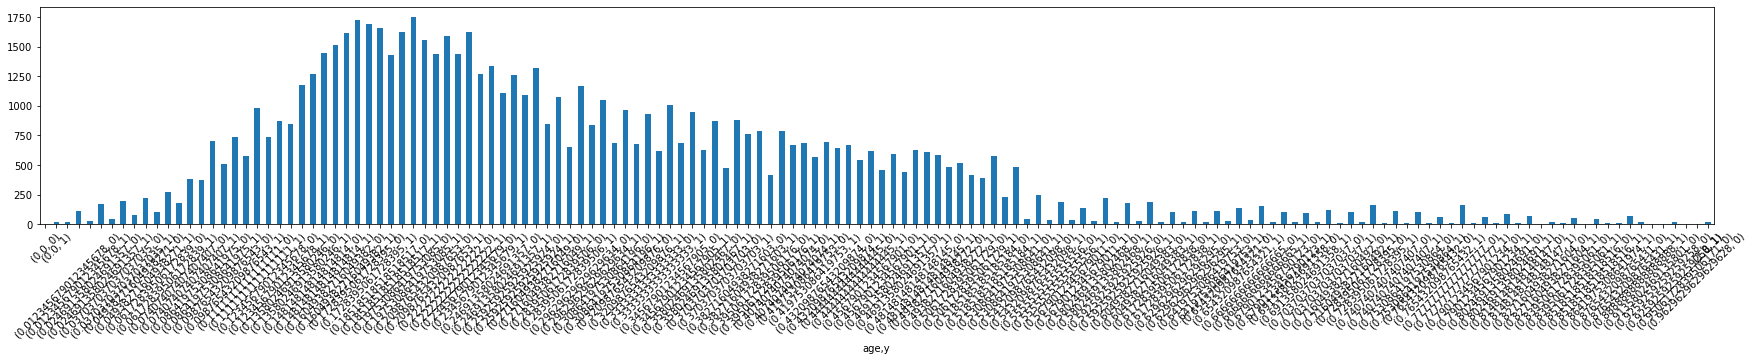

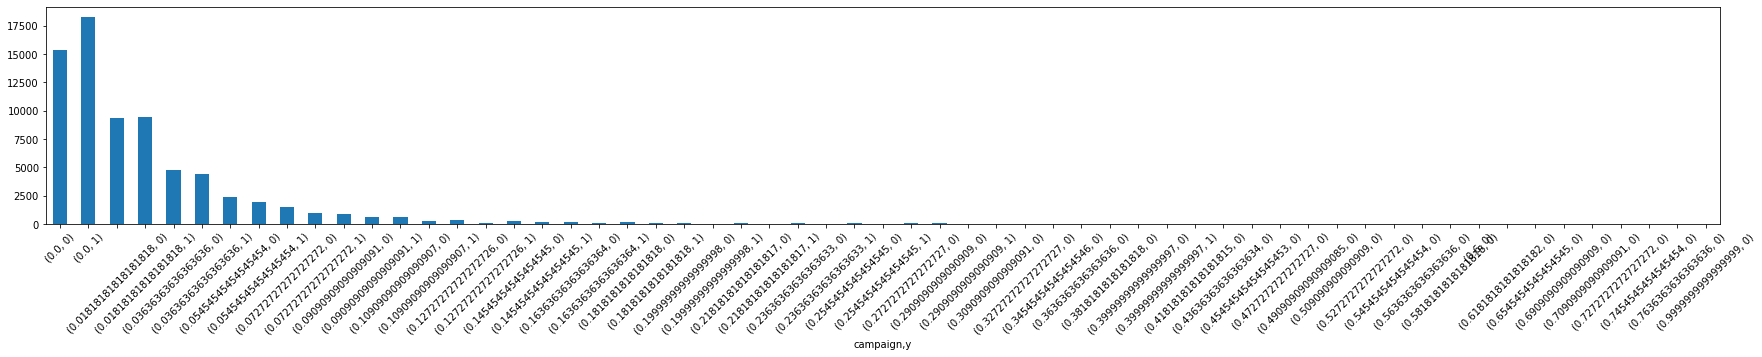

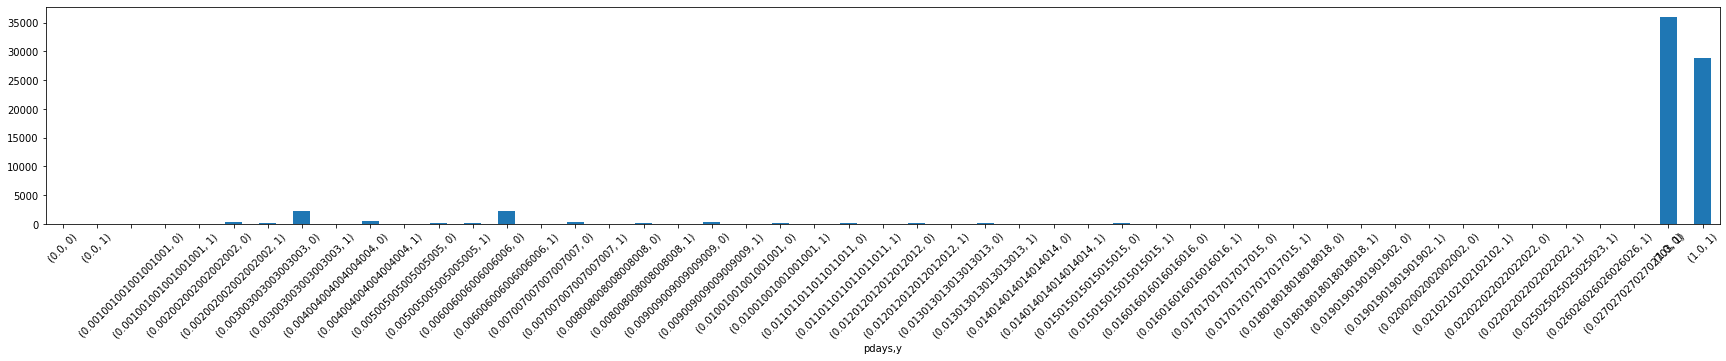

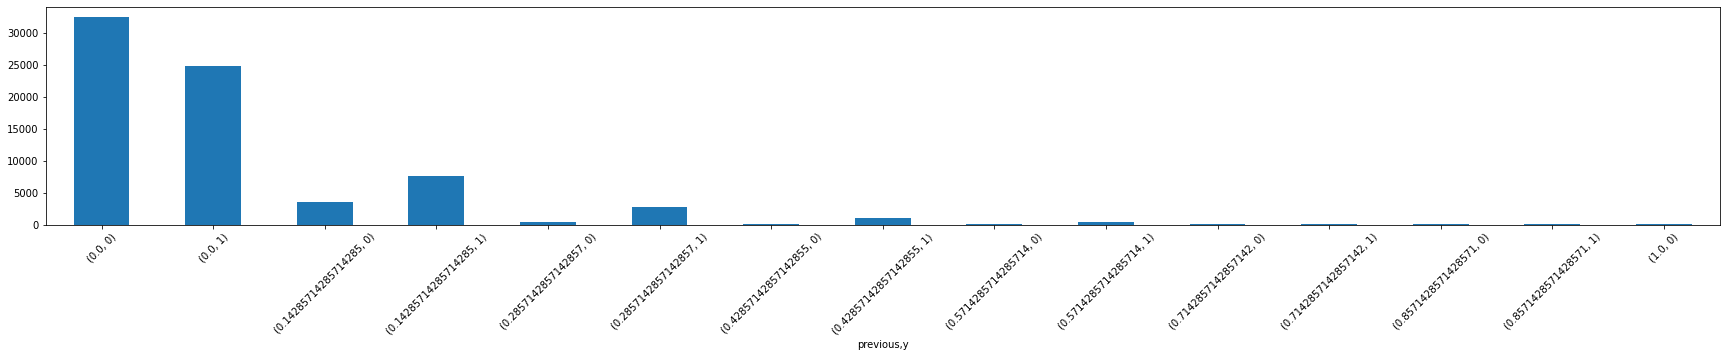

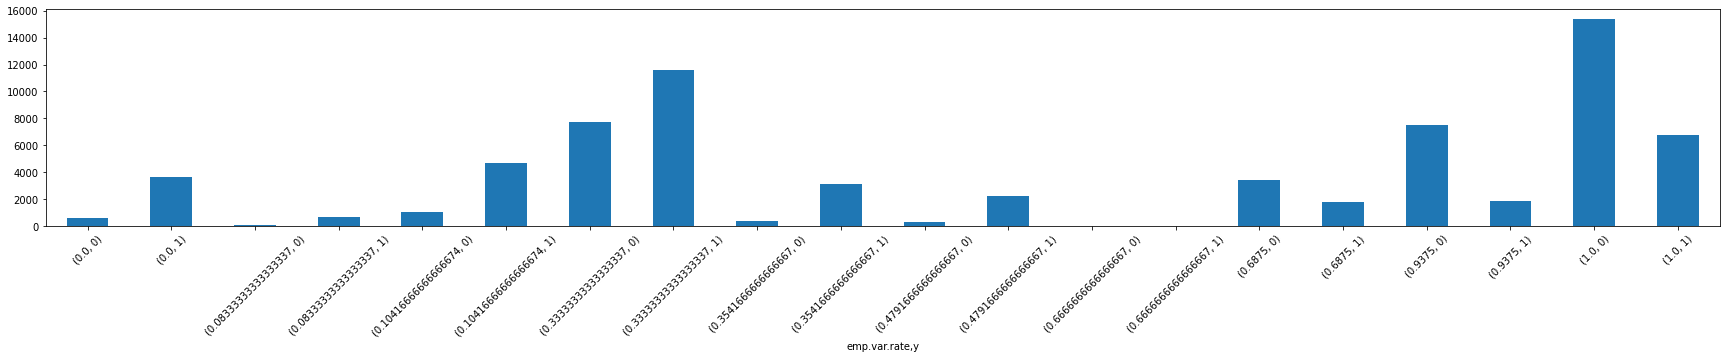

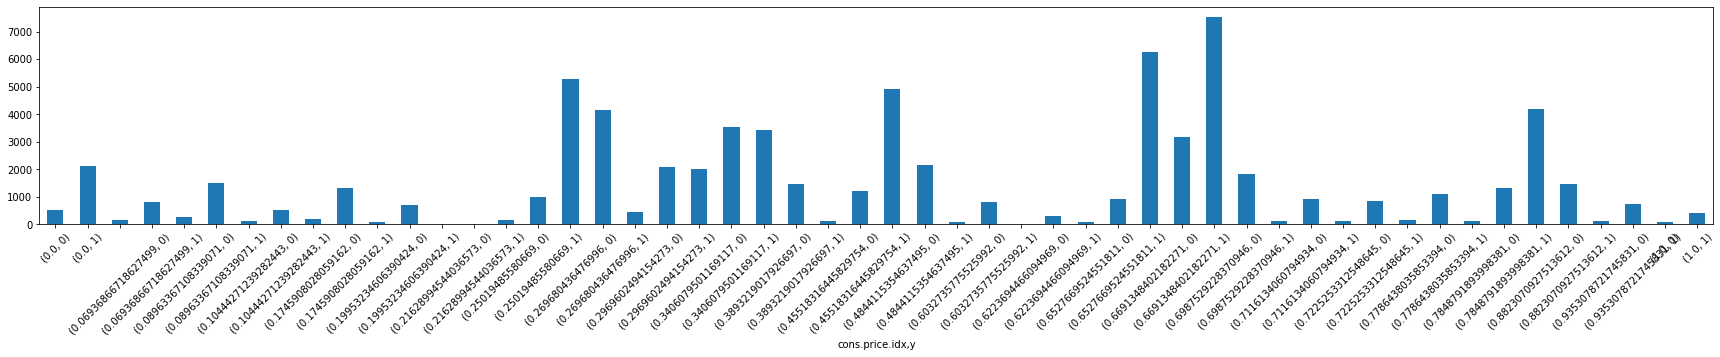

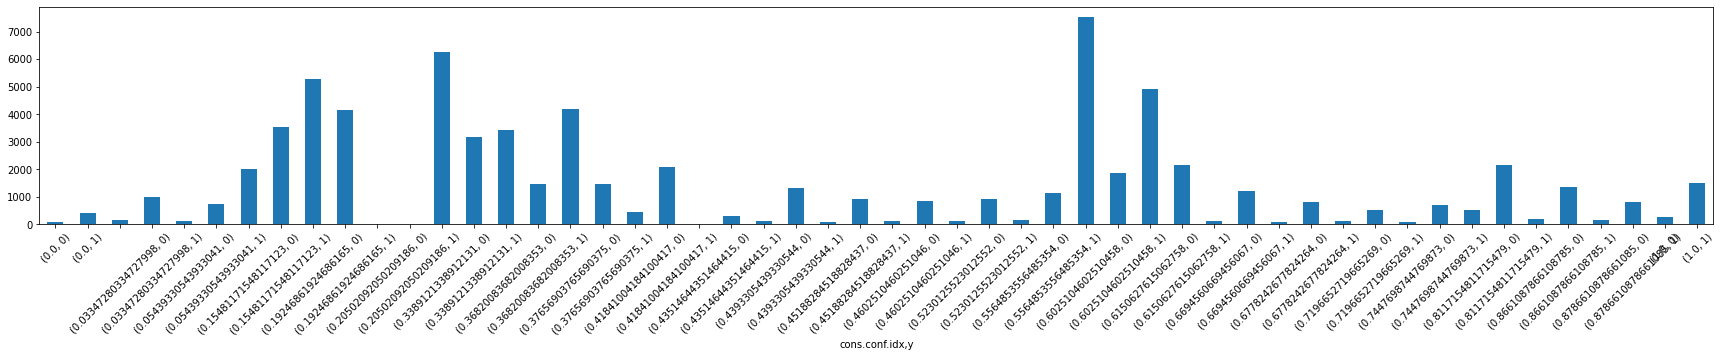

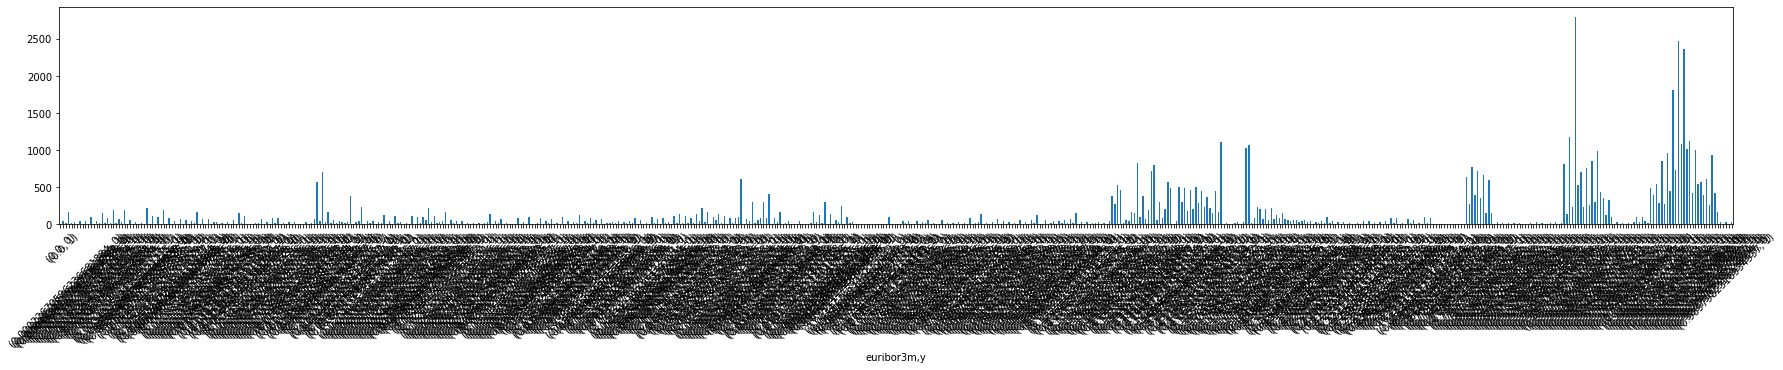

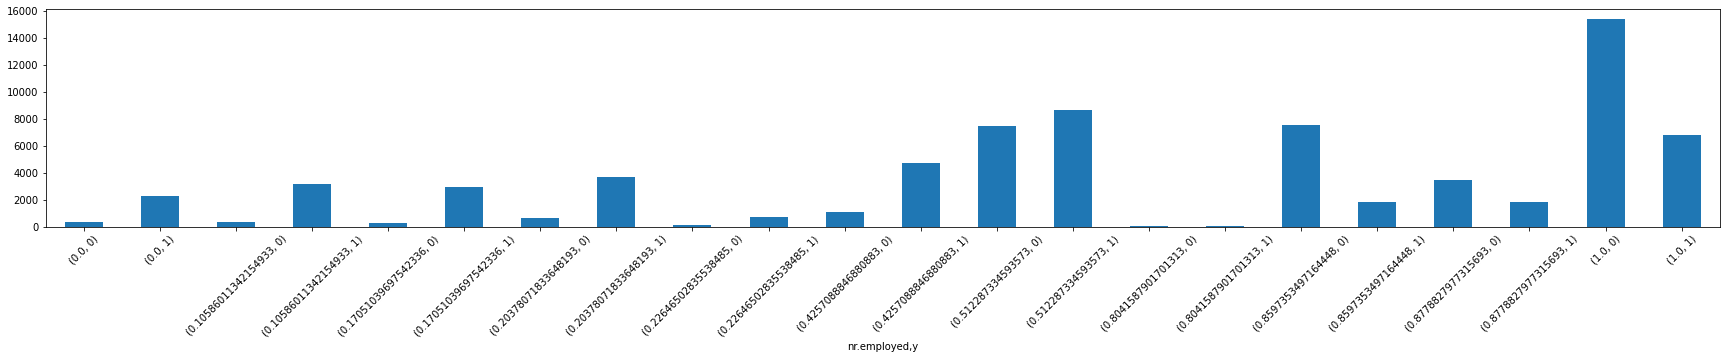

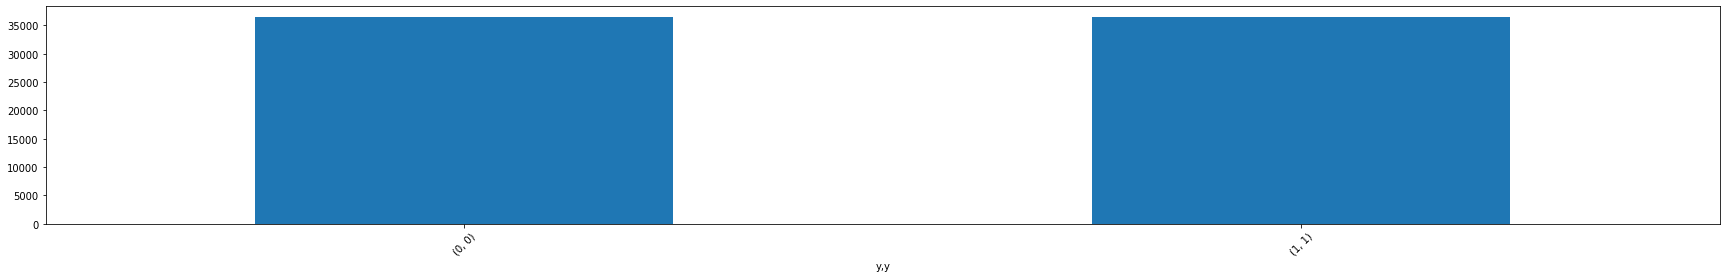

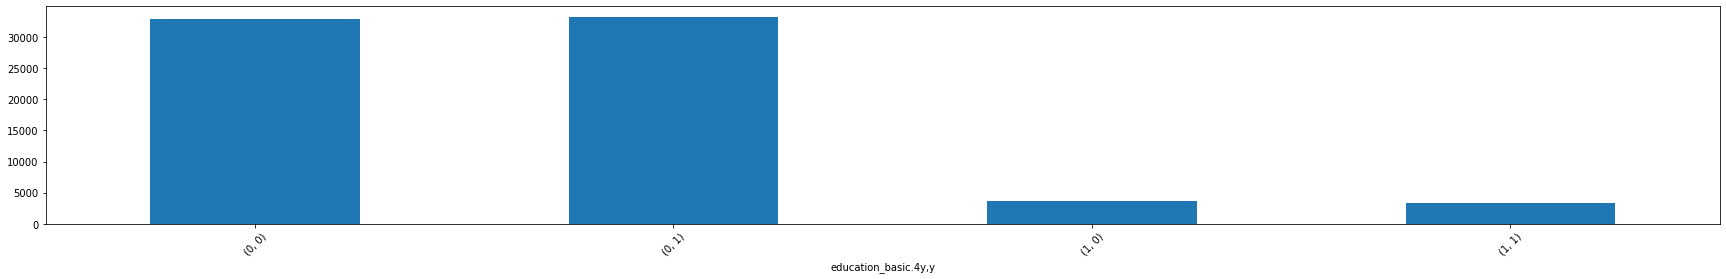

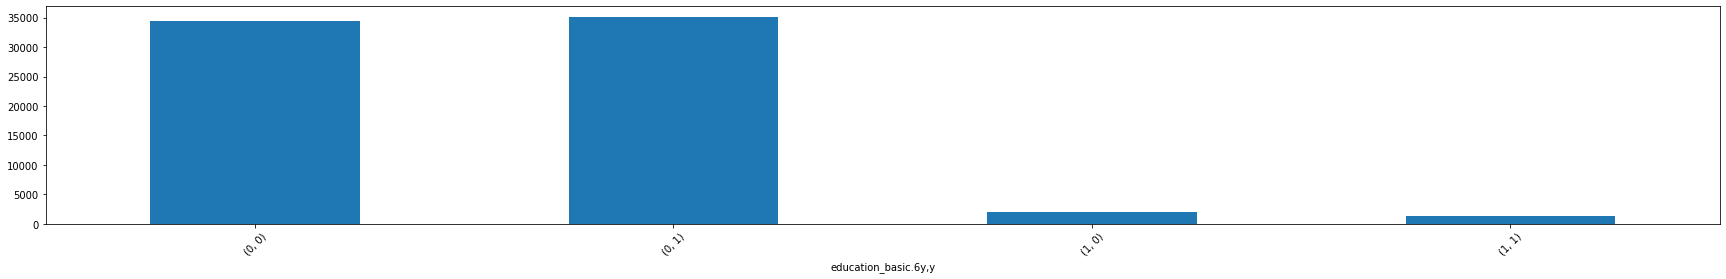

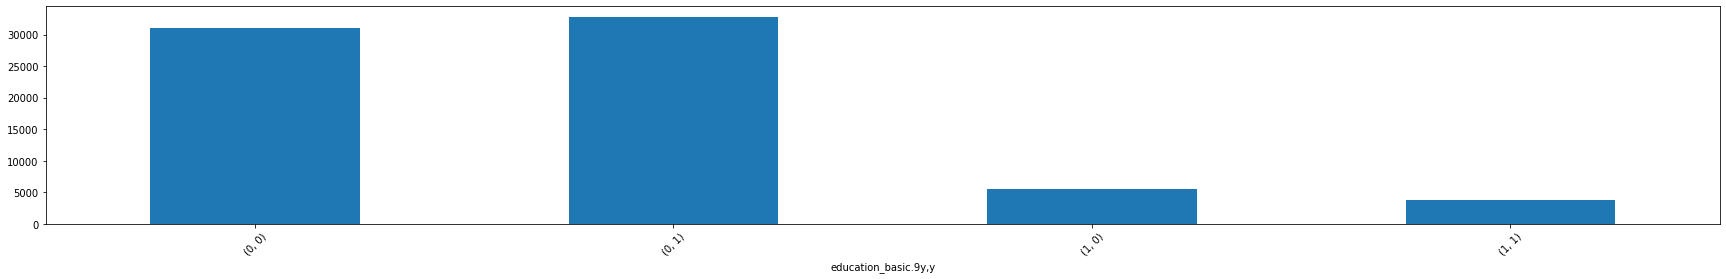

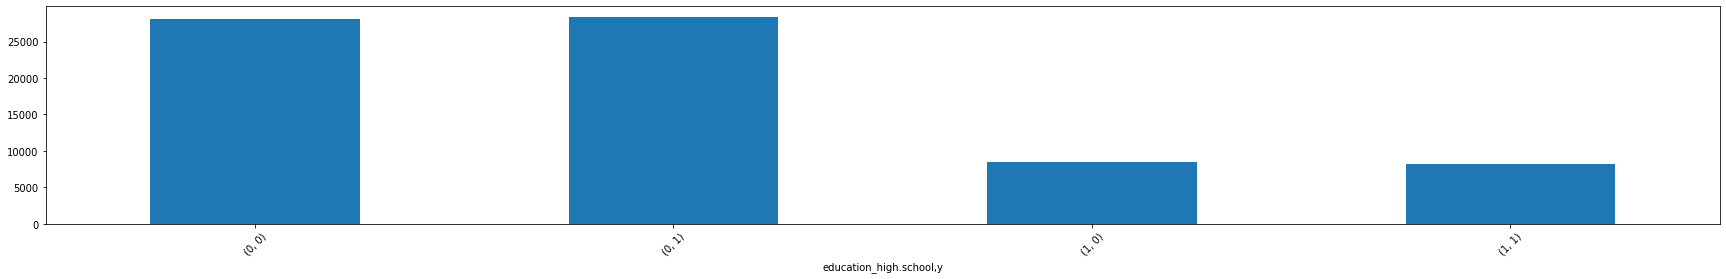

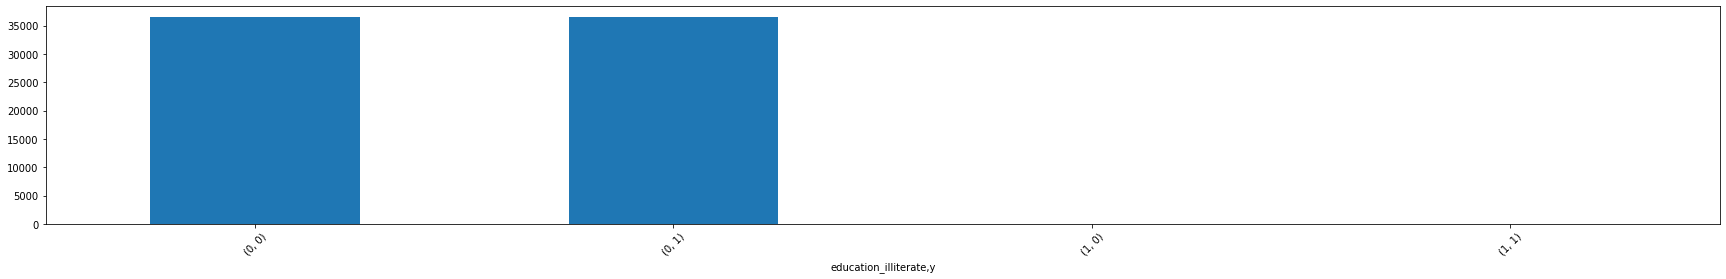

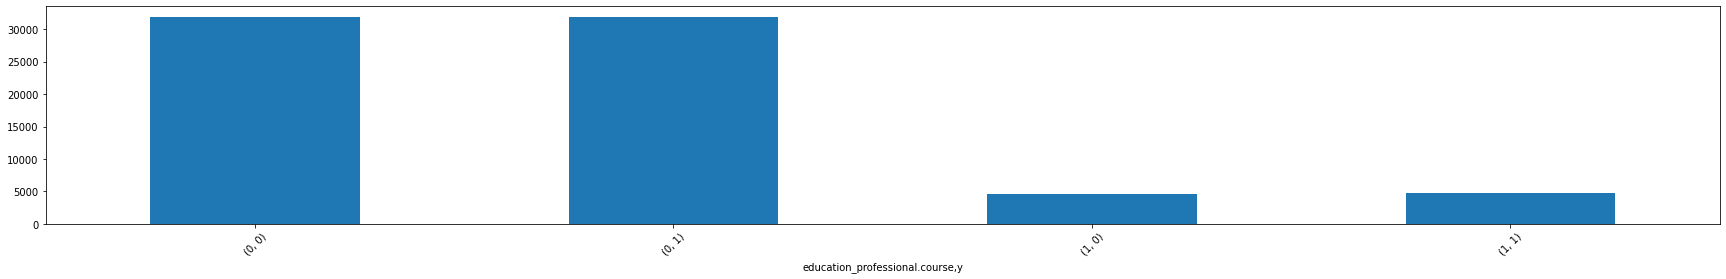

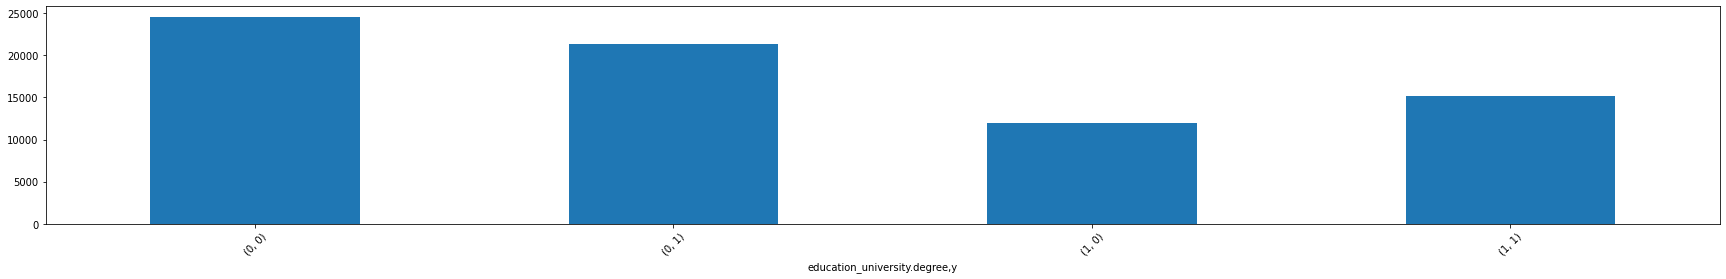

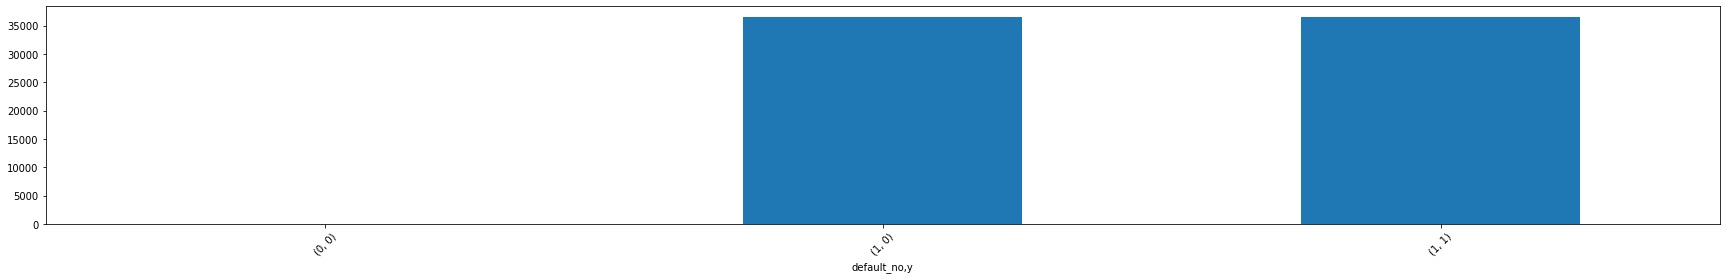

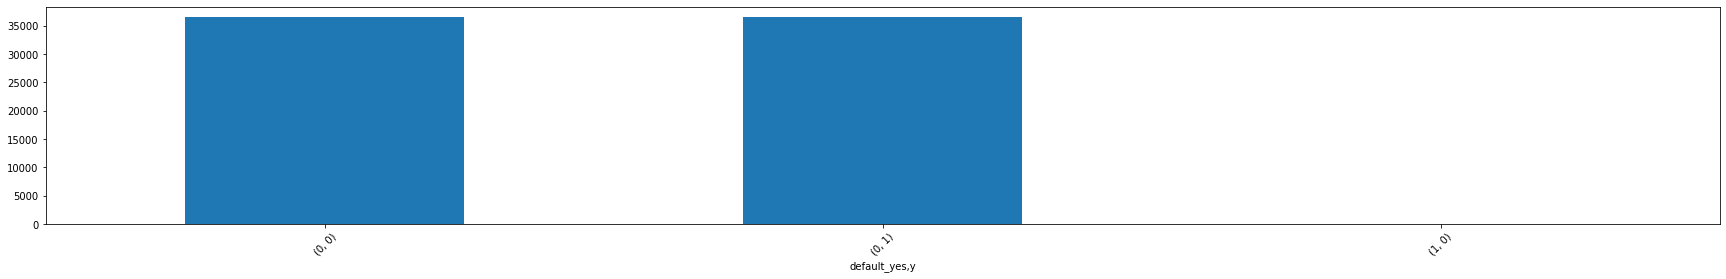

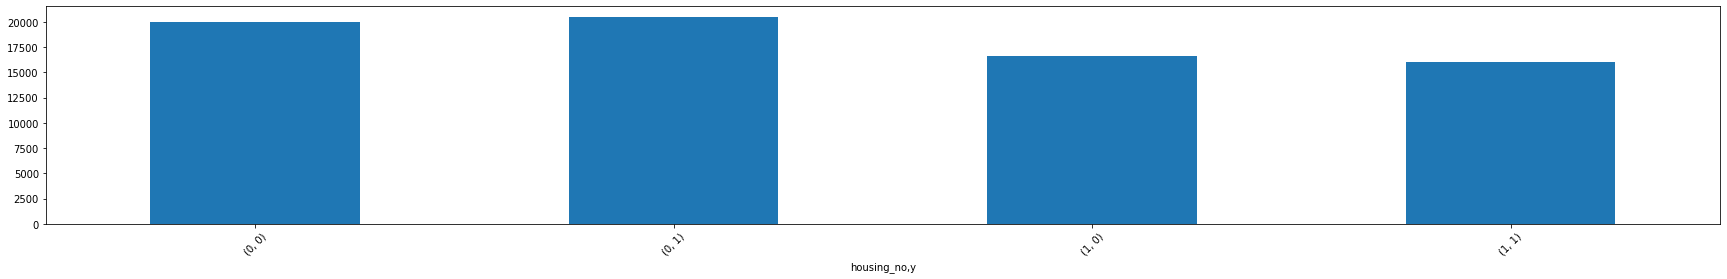

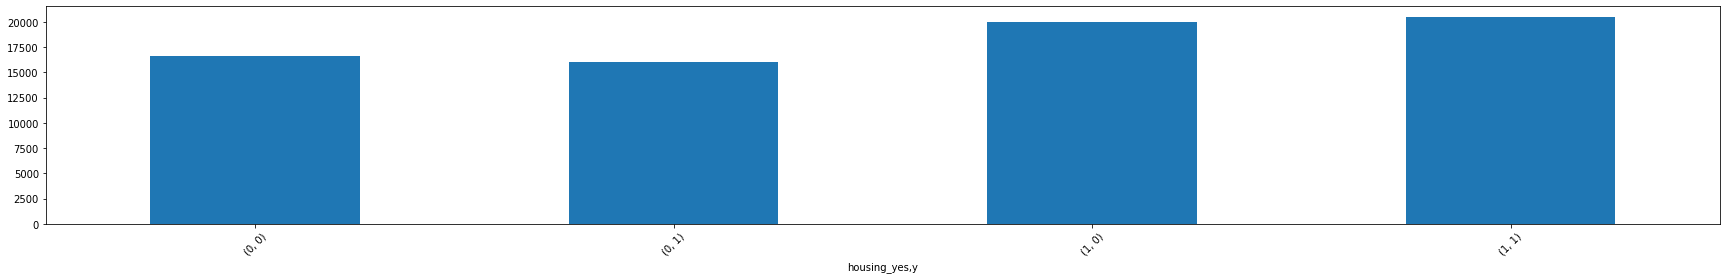

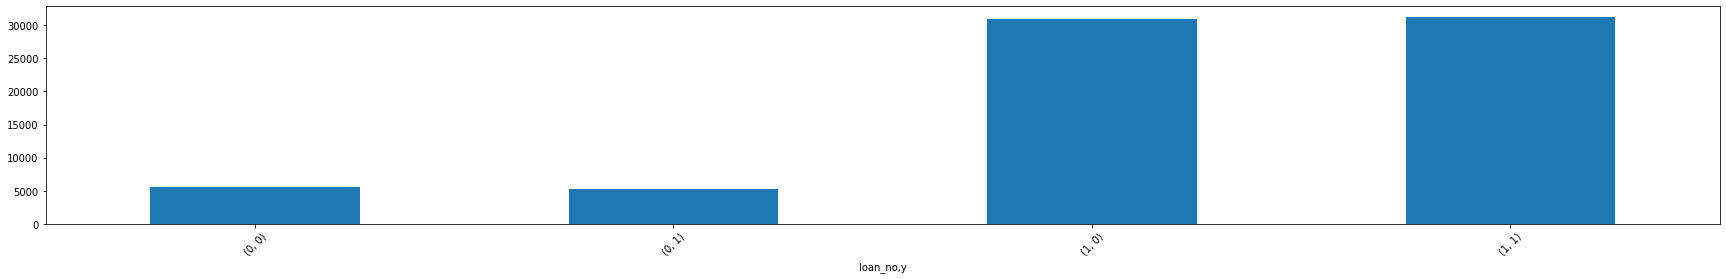

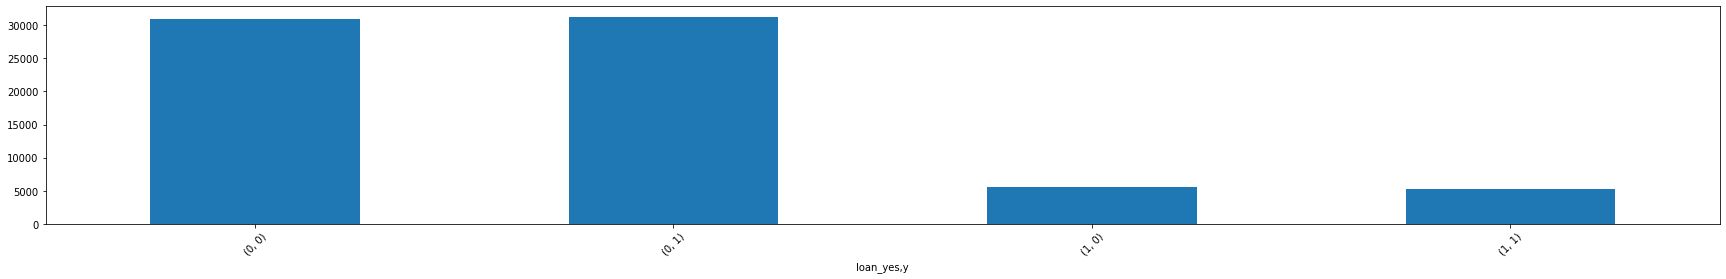

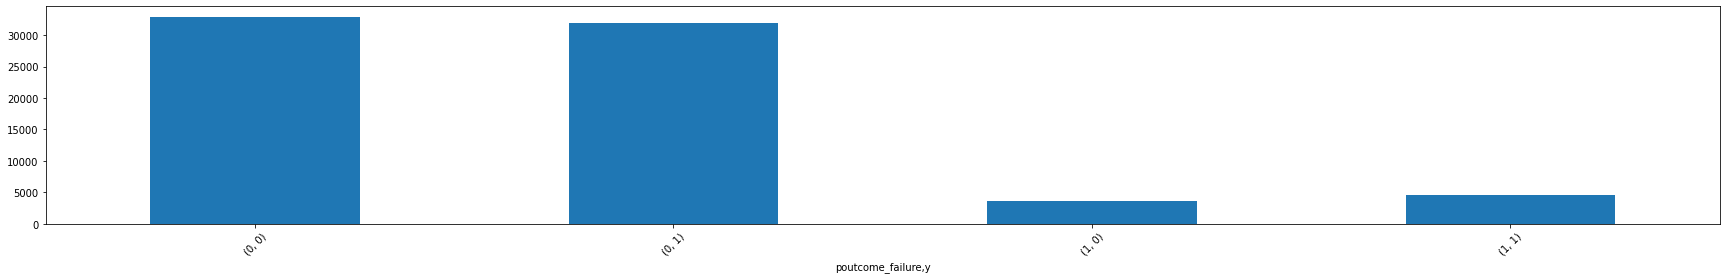

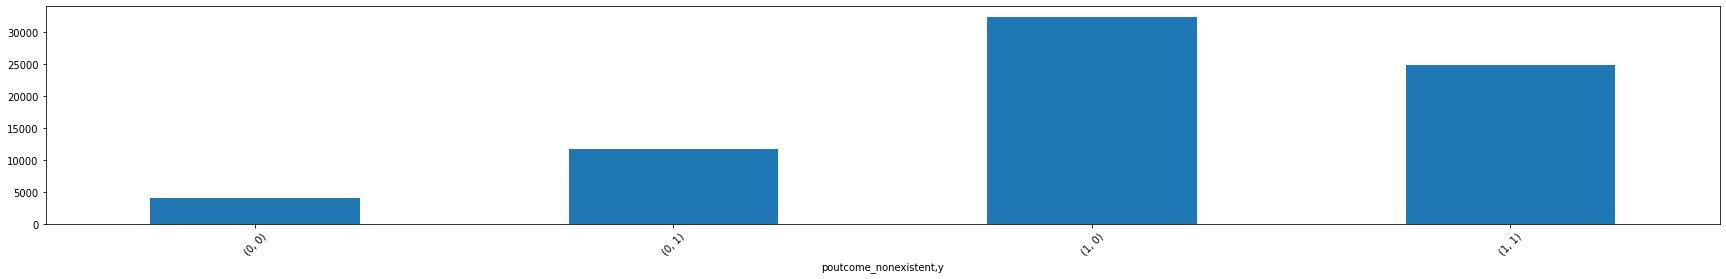

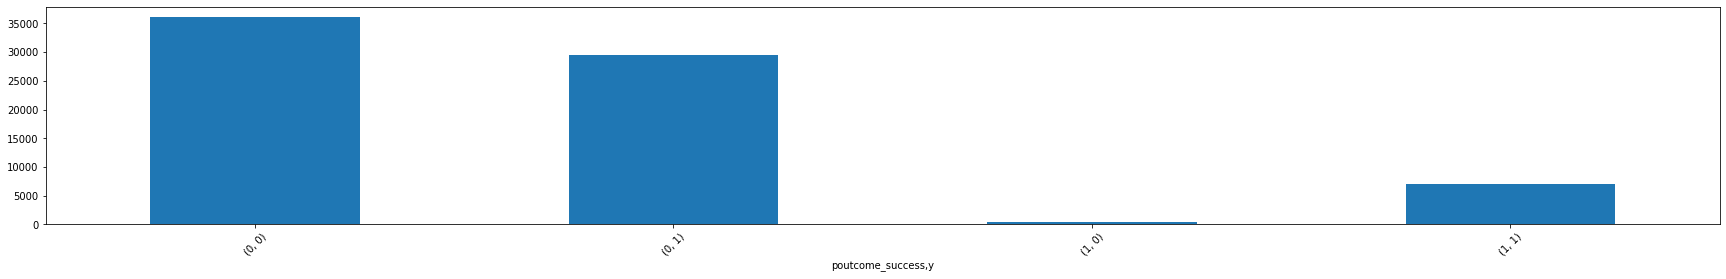

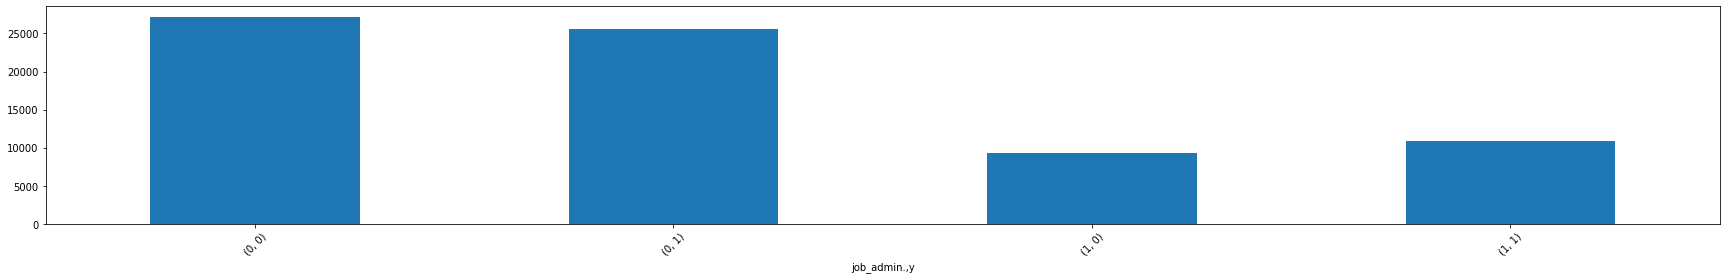

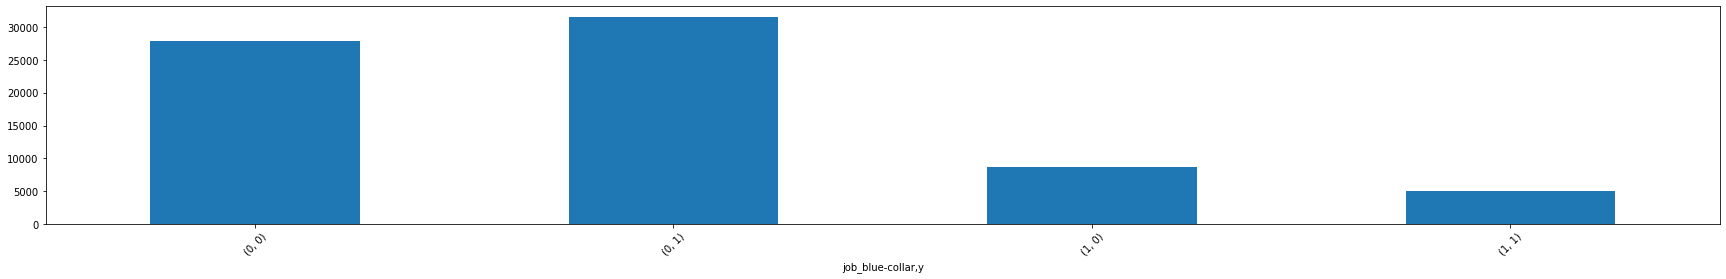

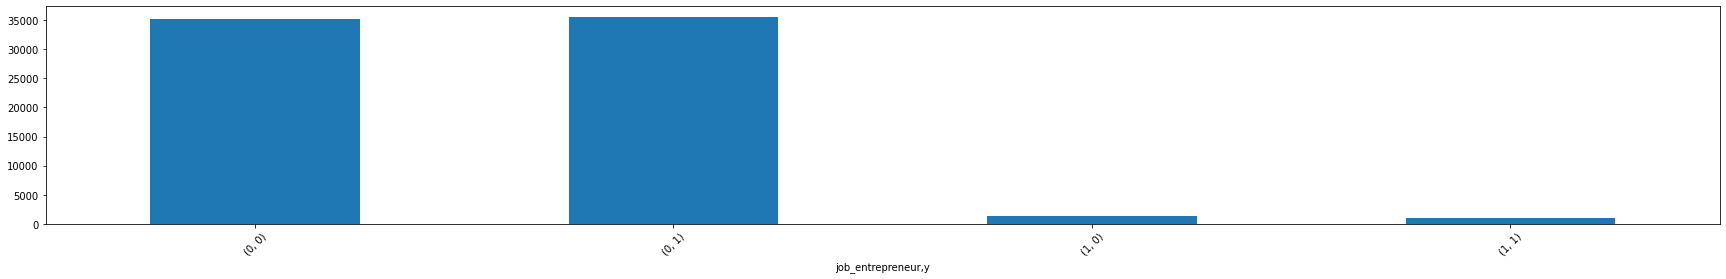

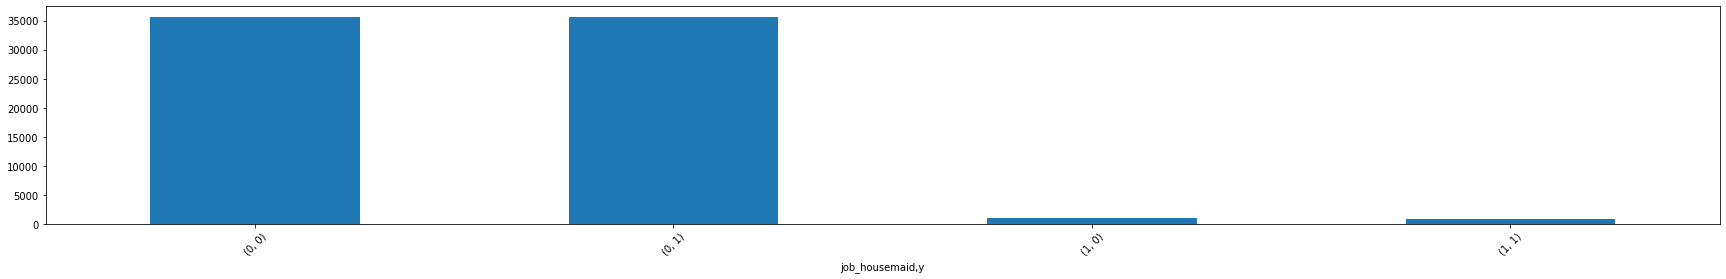

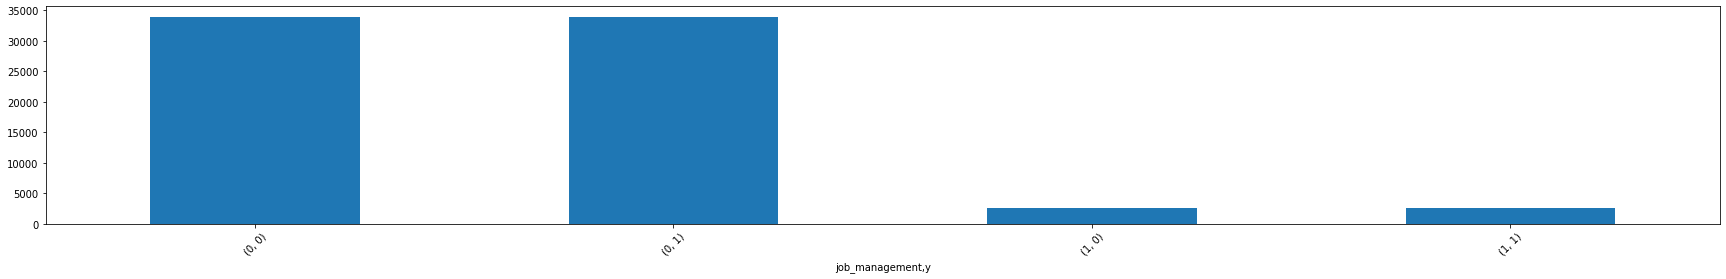

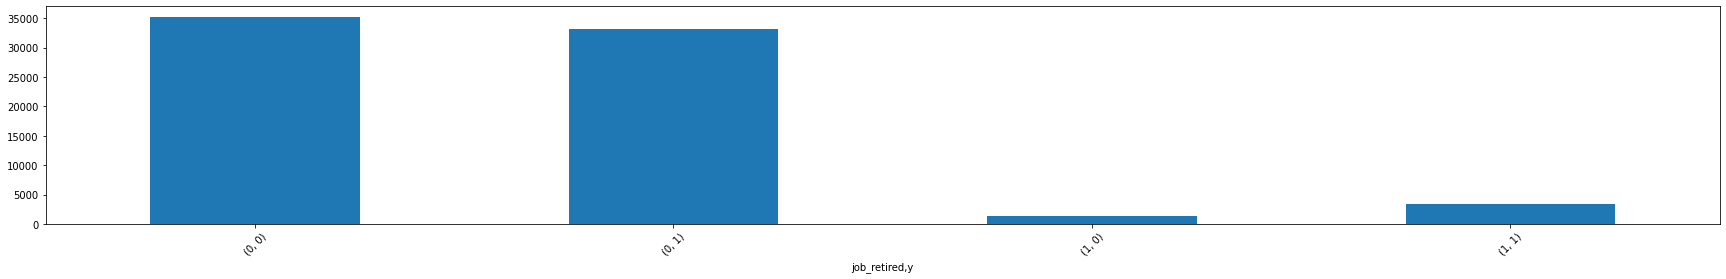

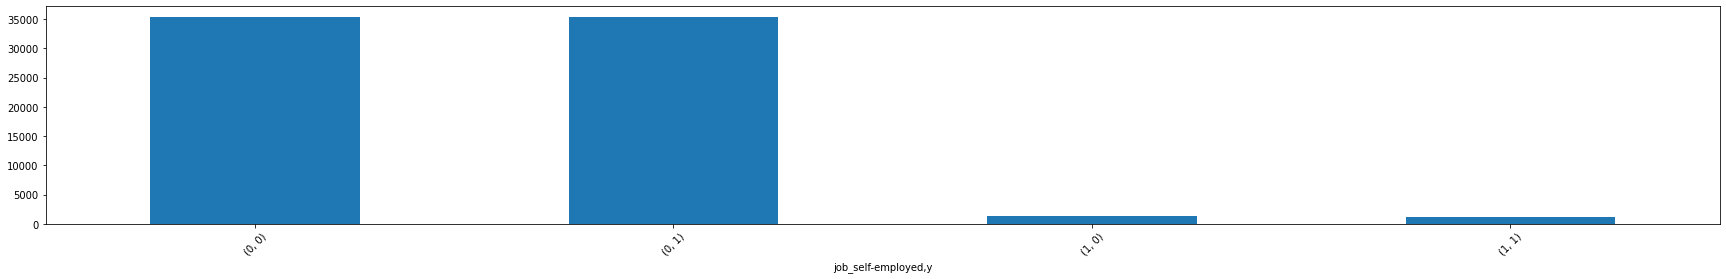

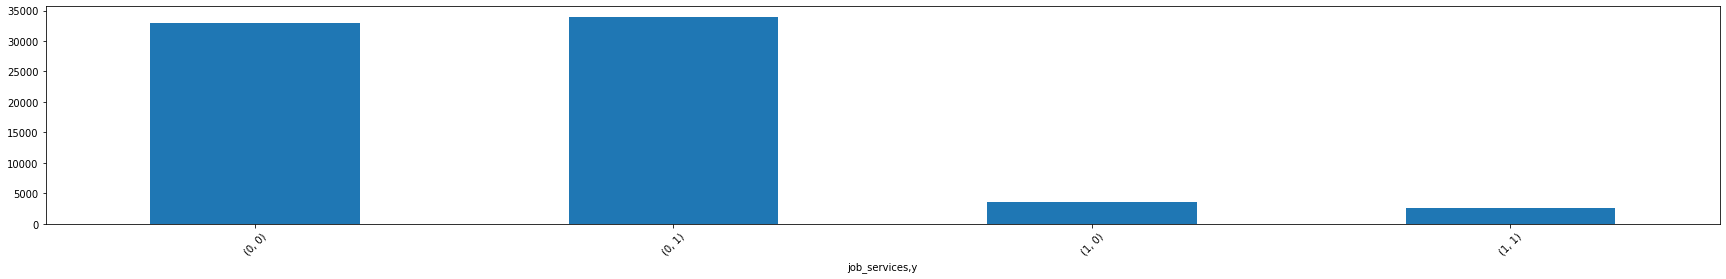

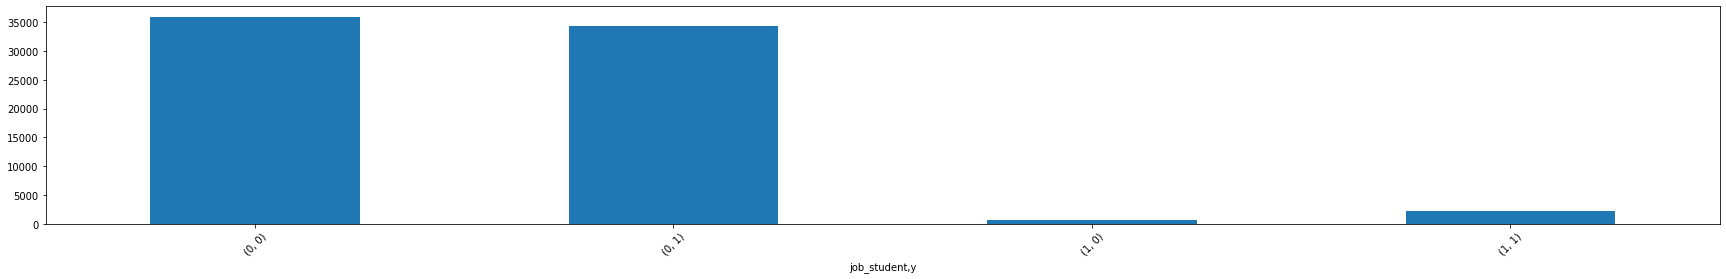

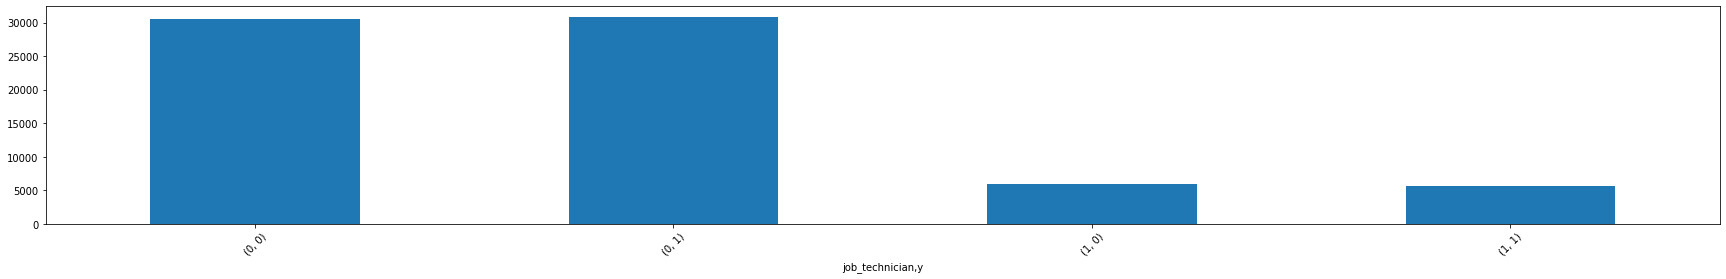

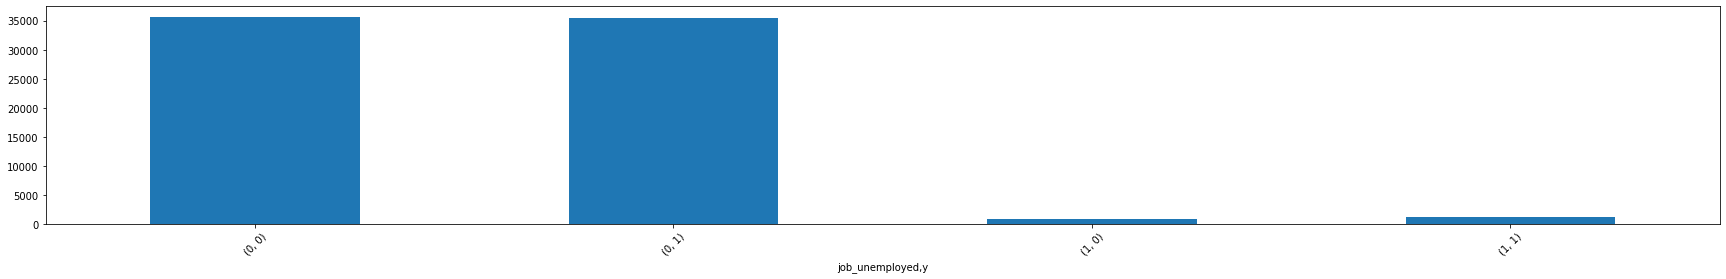

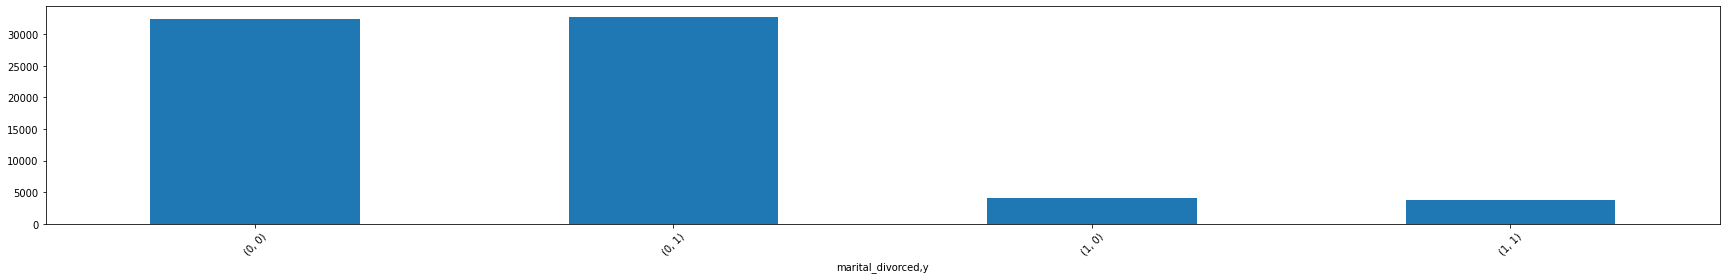

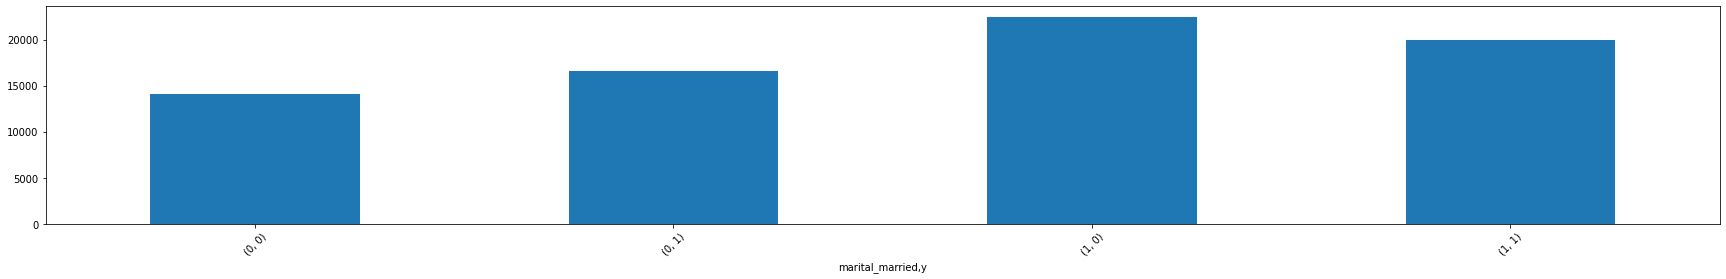

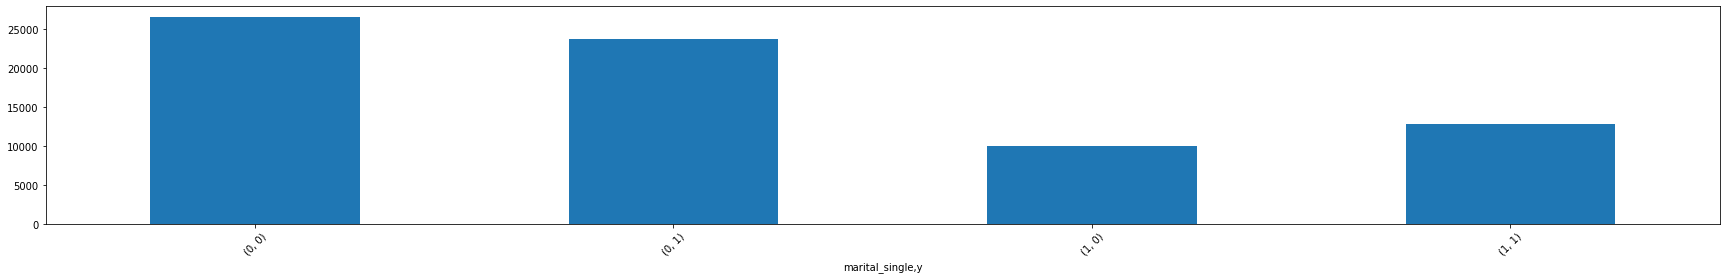

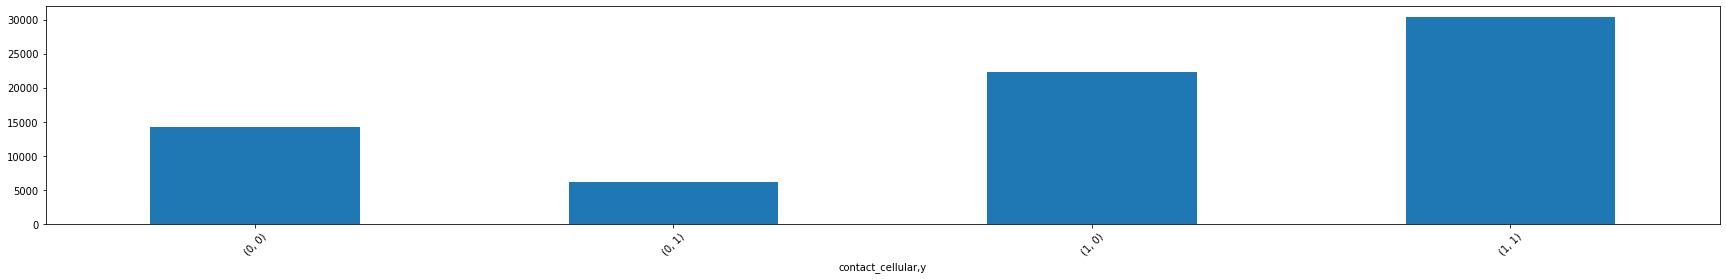

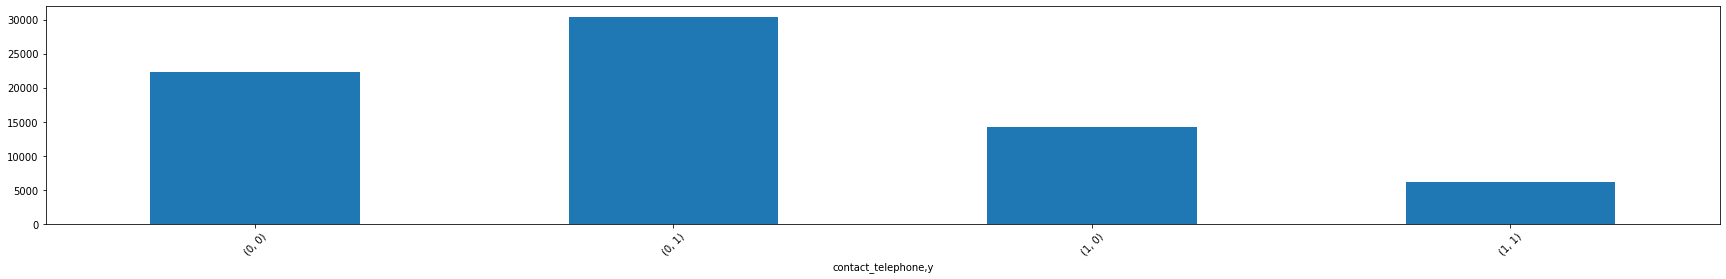

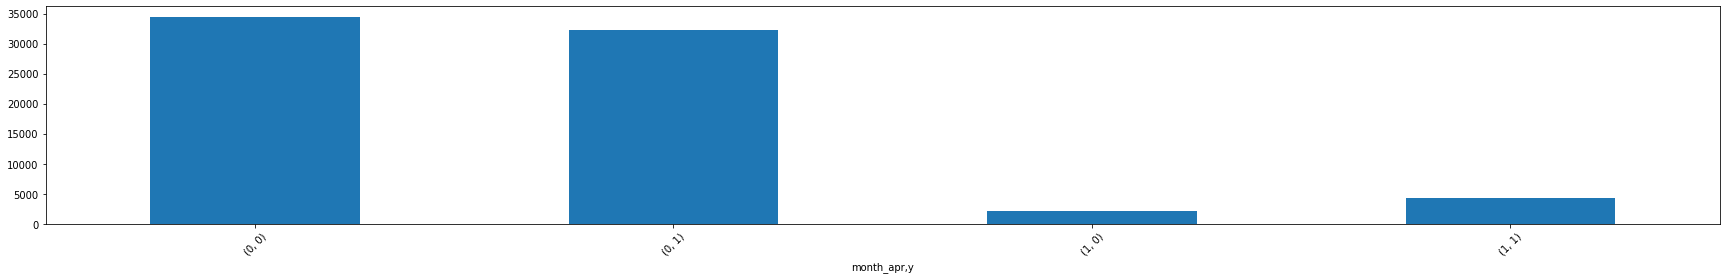

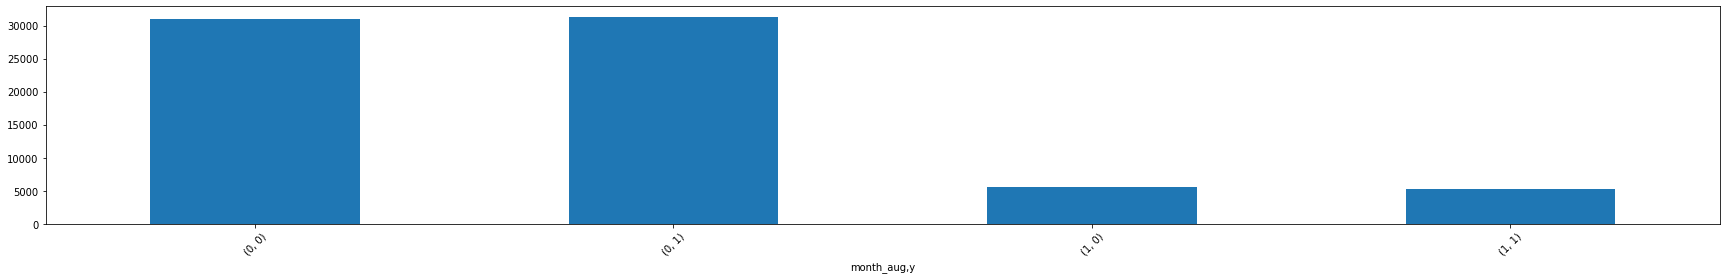

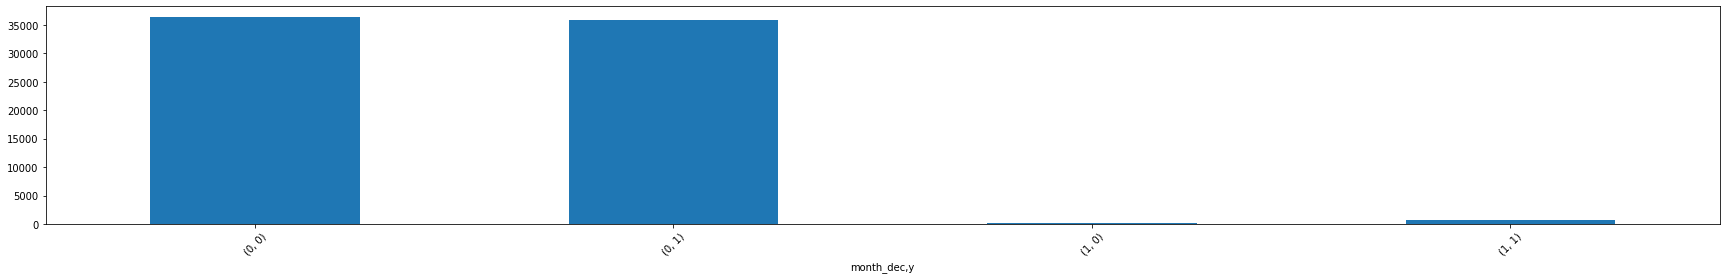

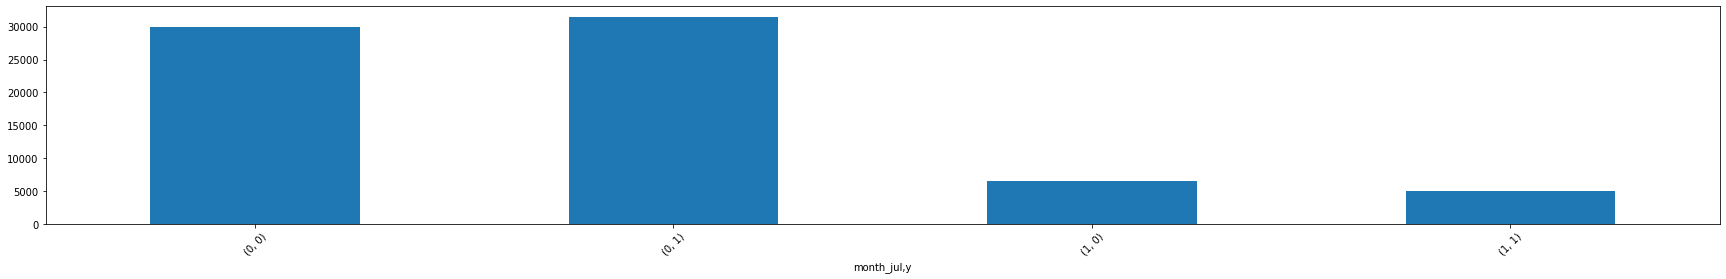

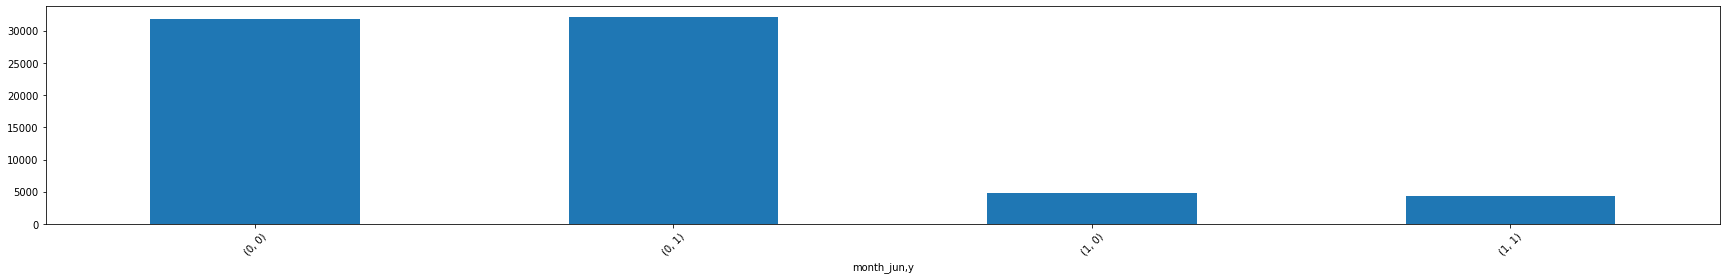

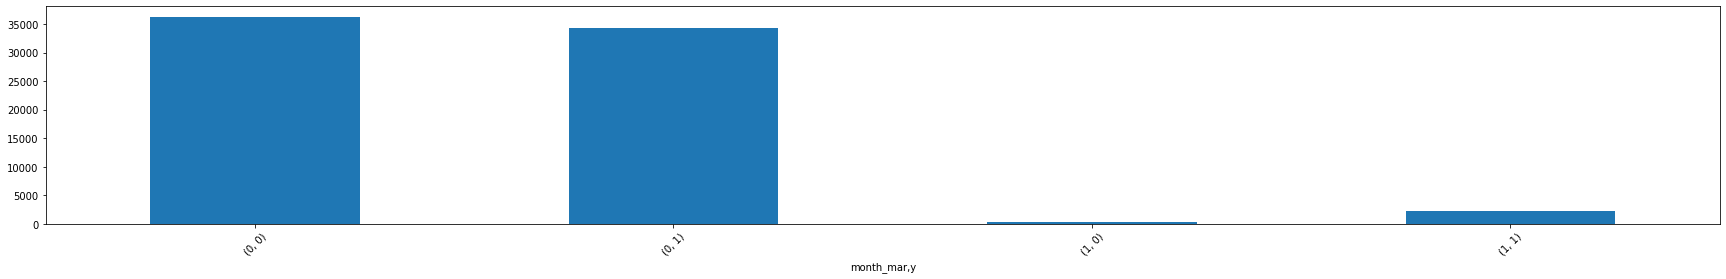

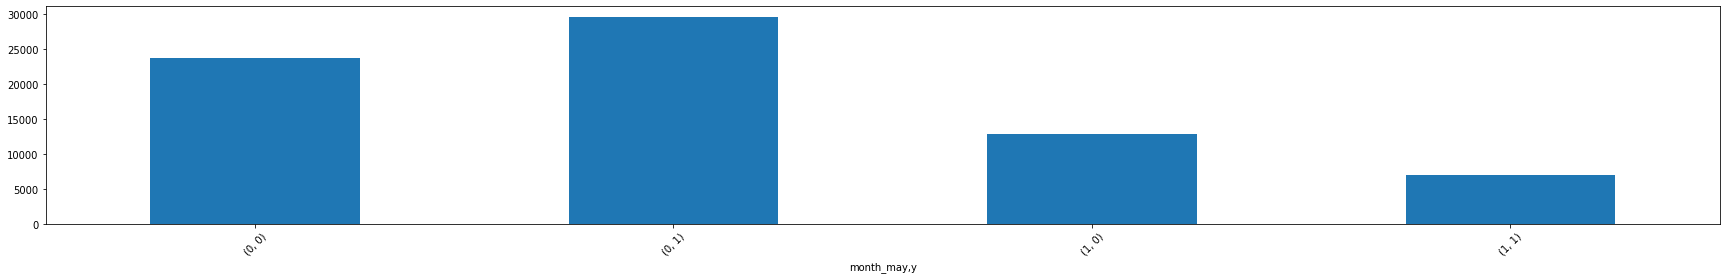

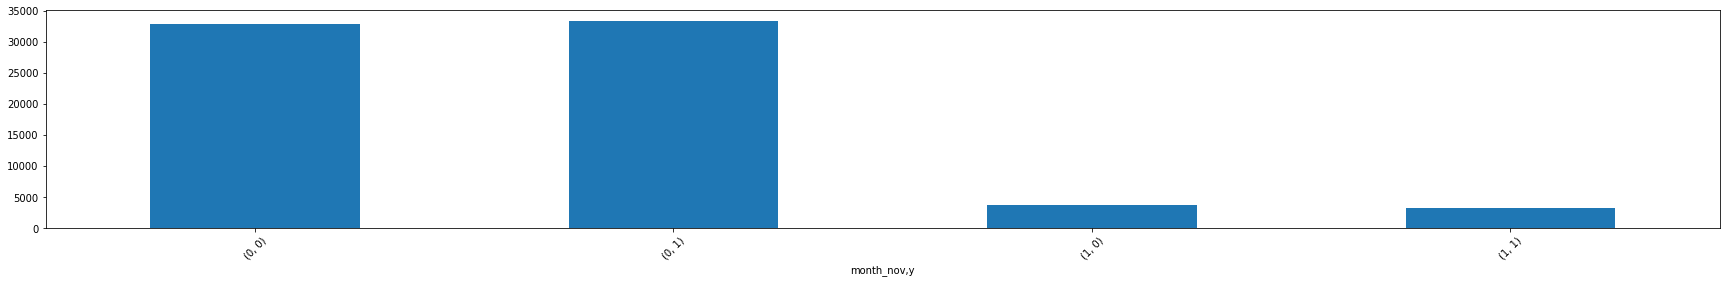

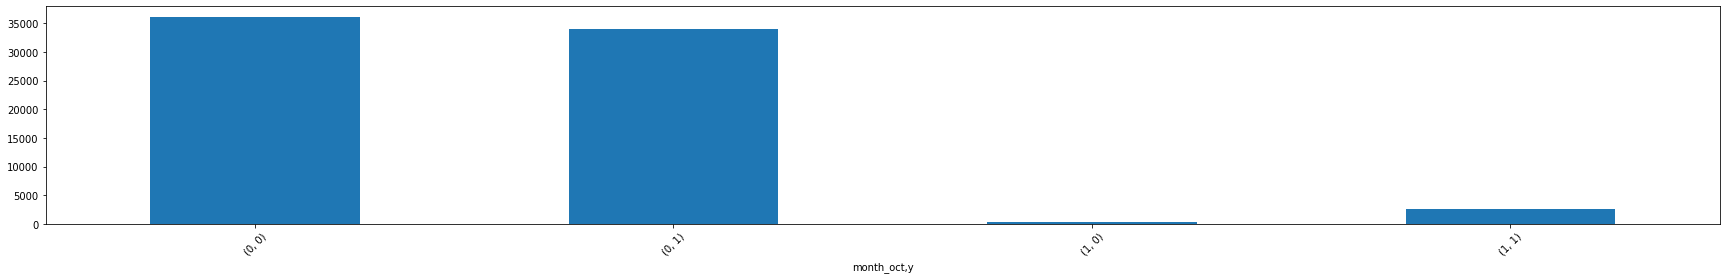

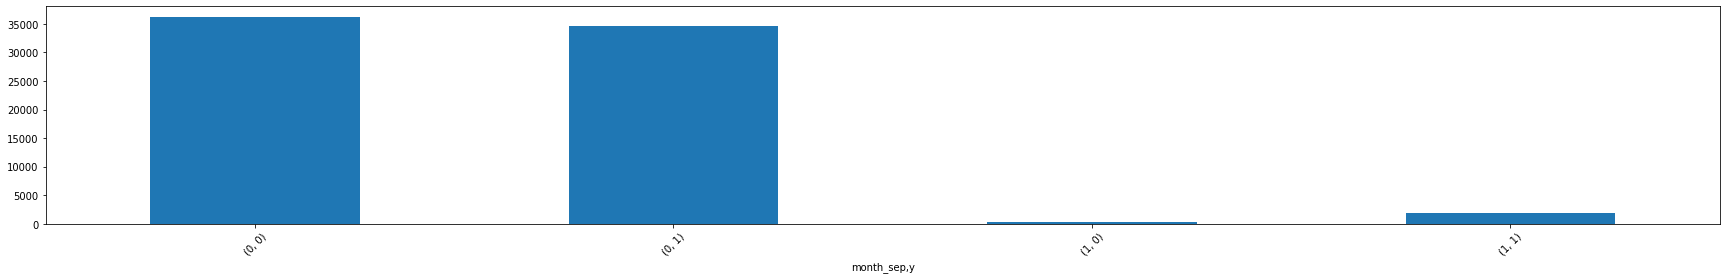

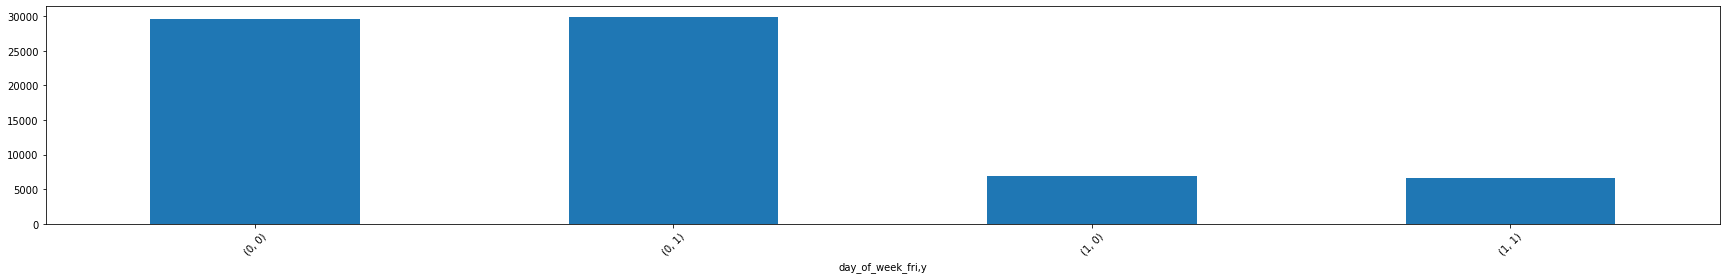

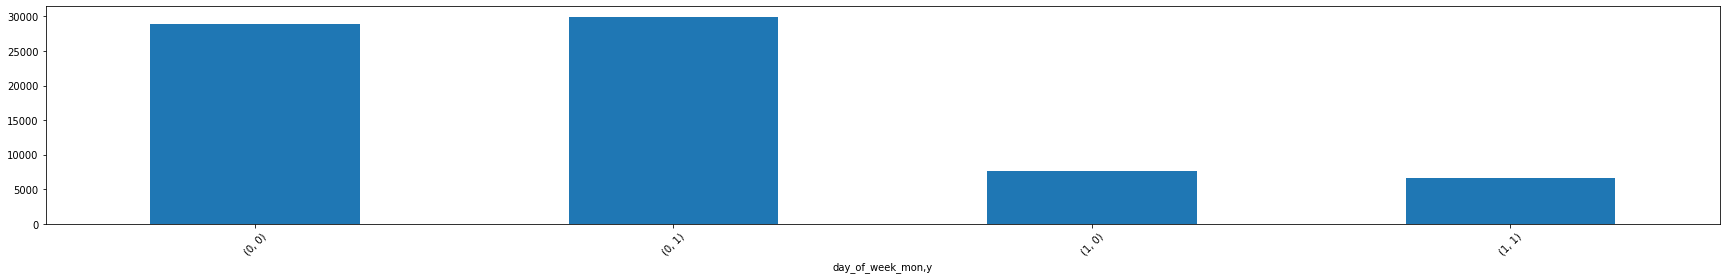

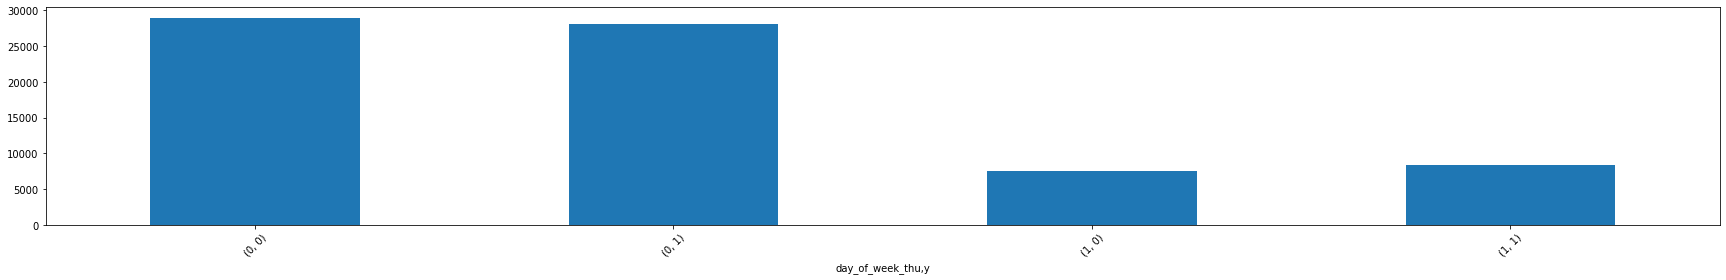

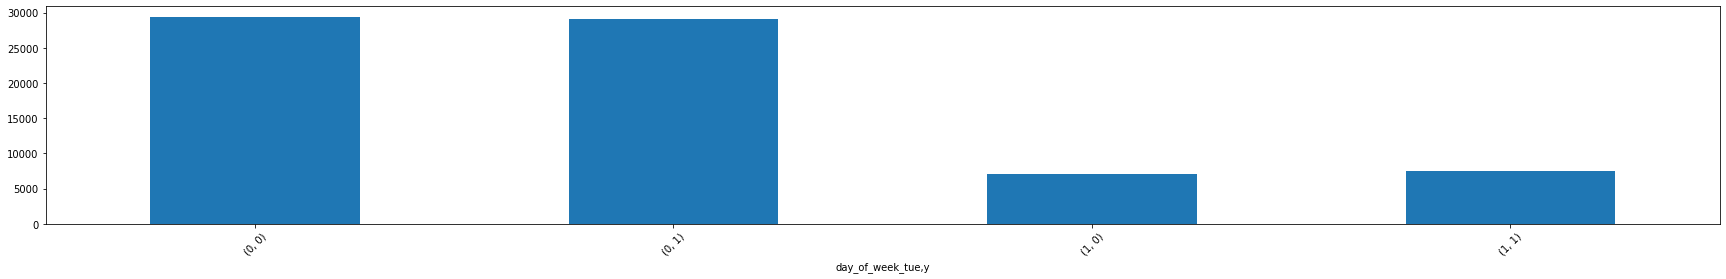

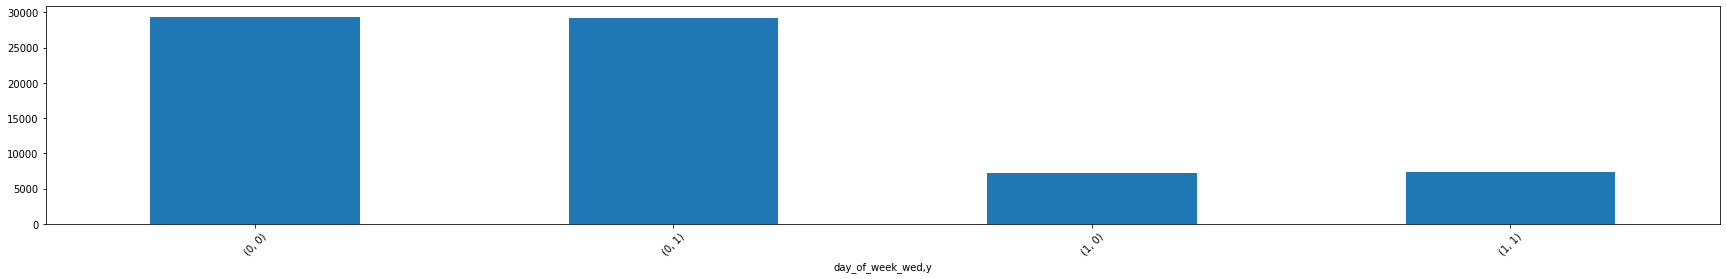

In [ ]:
newListAttrNames = upSampleDF.columns.to_list()
print(len(newListAttrNames))
print(newListAttrNames)
for i in newListAttrNames:
  plt.figure(figsize=(30,4))
  p = upSampleDF.groupby([i, 'y']).size()
  p.plot.bar()
  plt.xticks(rotation=45)

## 5.2 Vẽ biểu đồ theo phân lớp sau cân bằng (downsample)

57
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

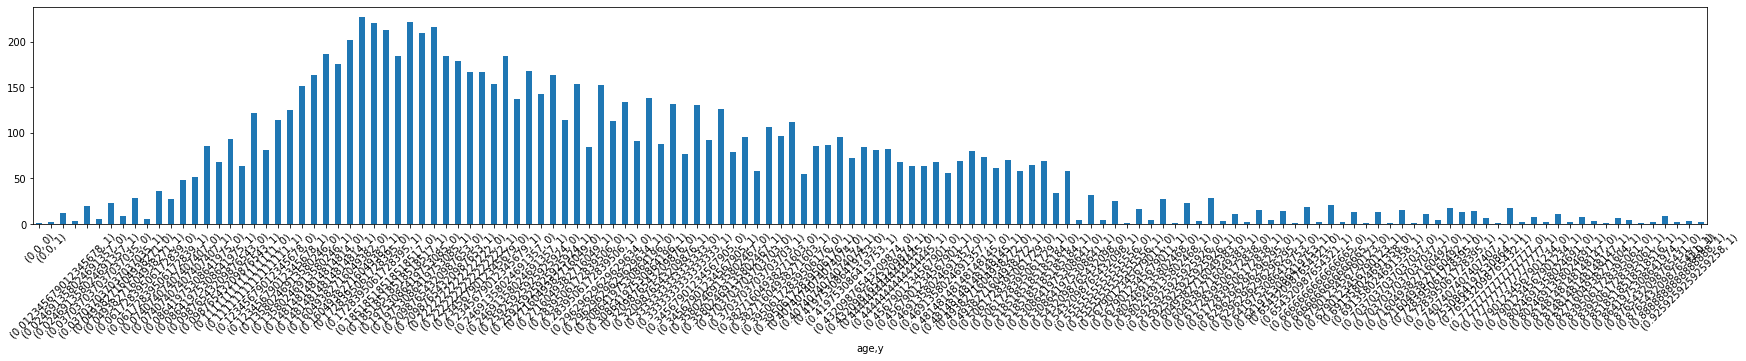

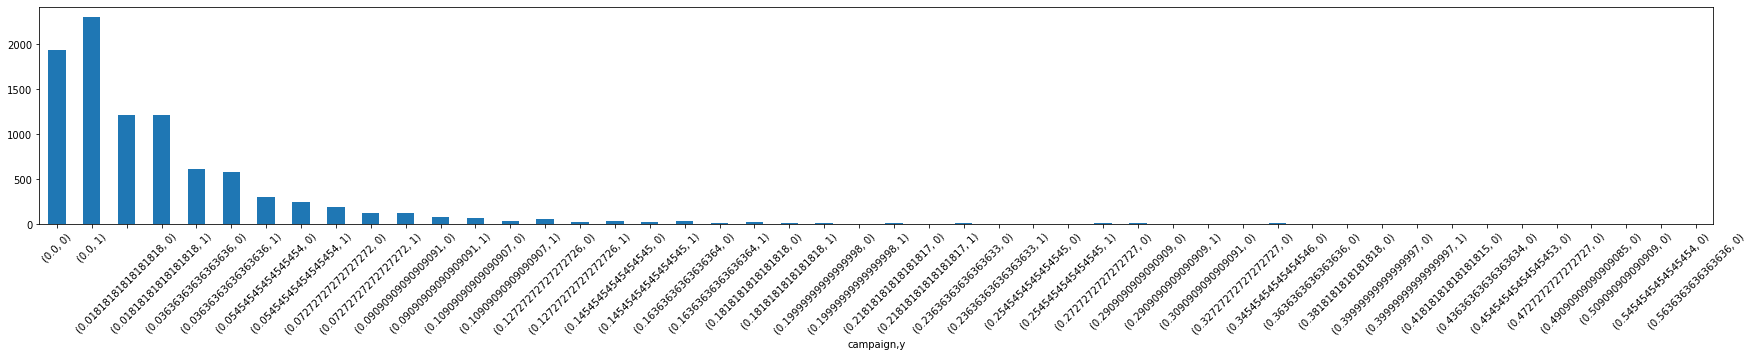

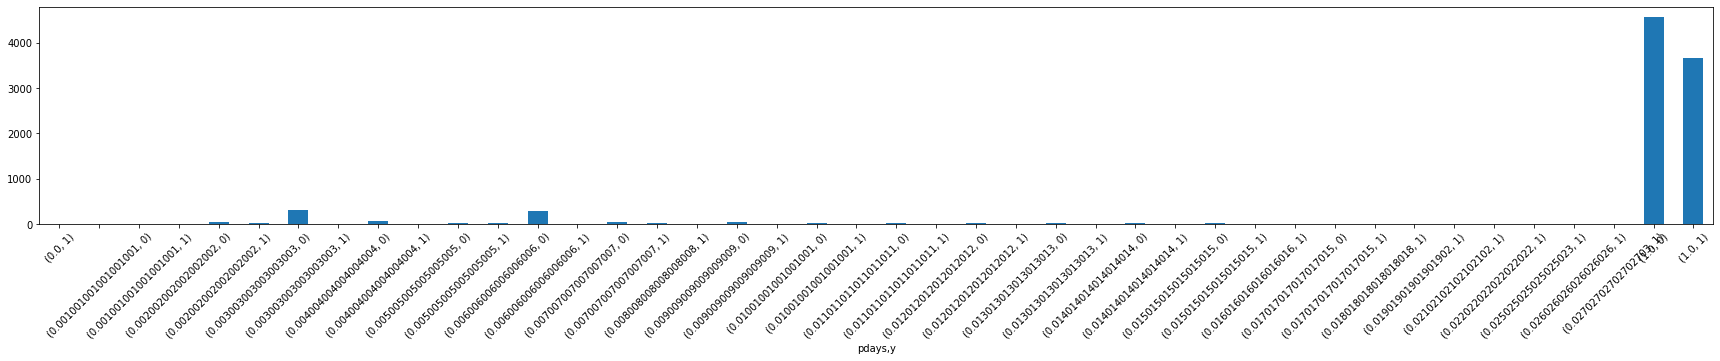

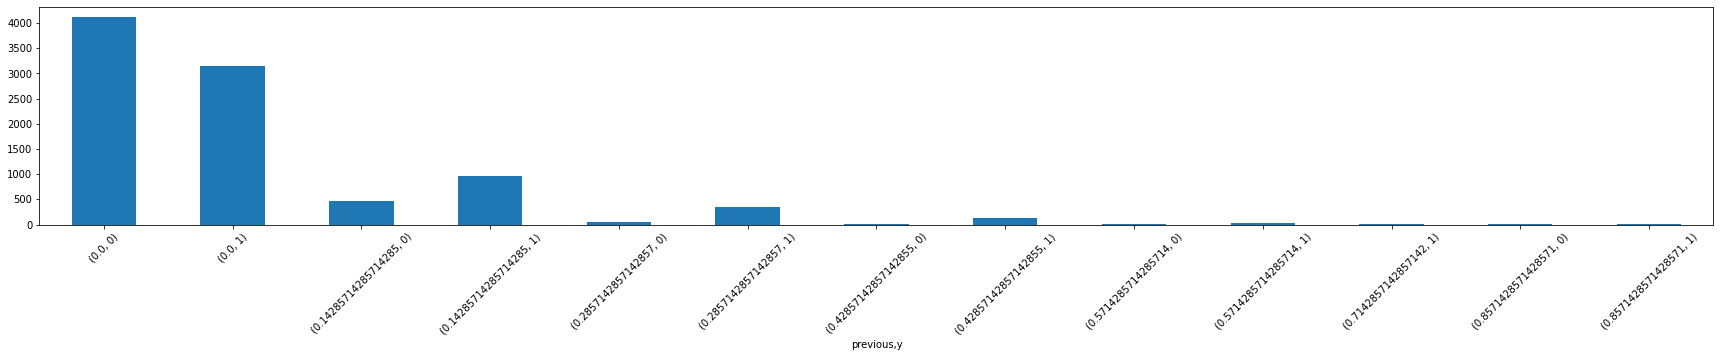

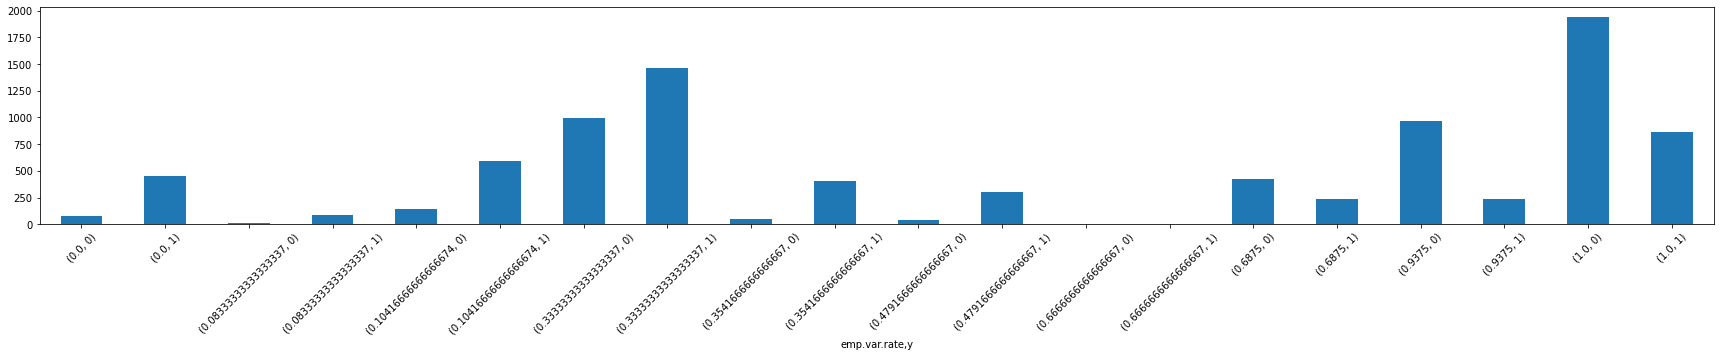

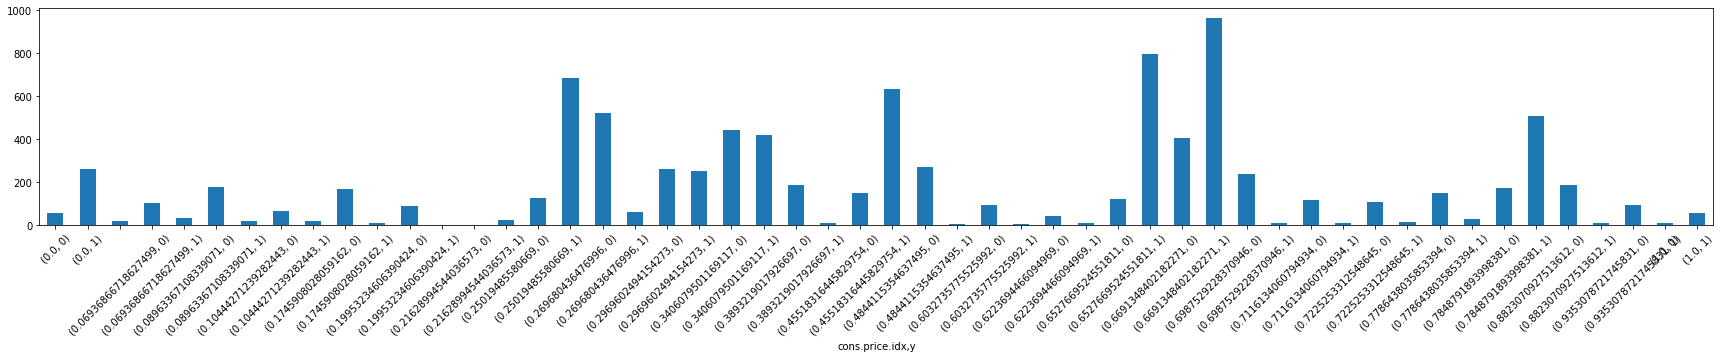

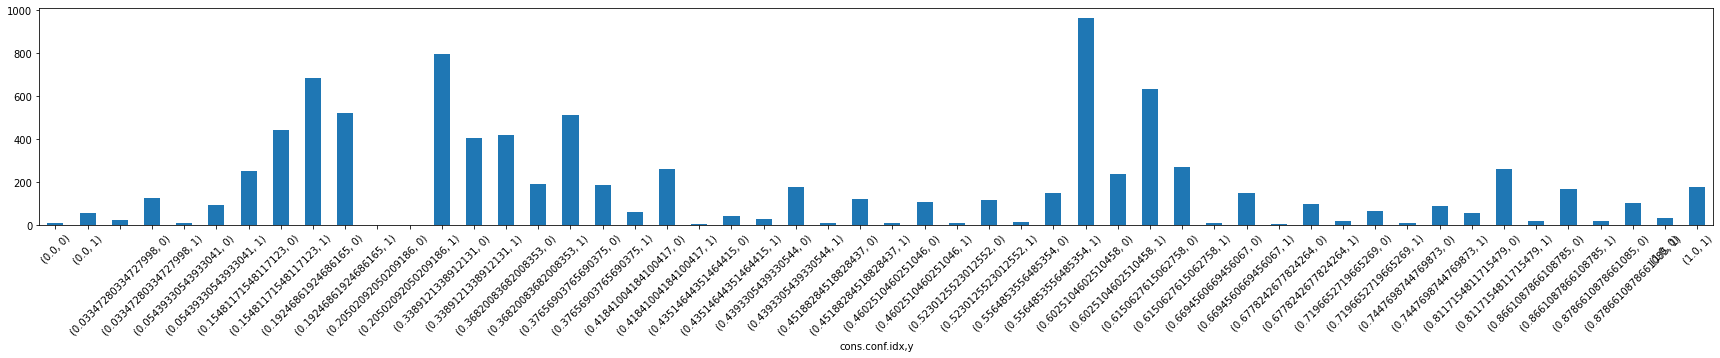

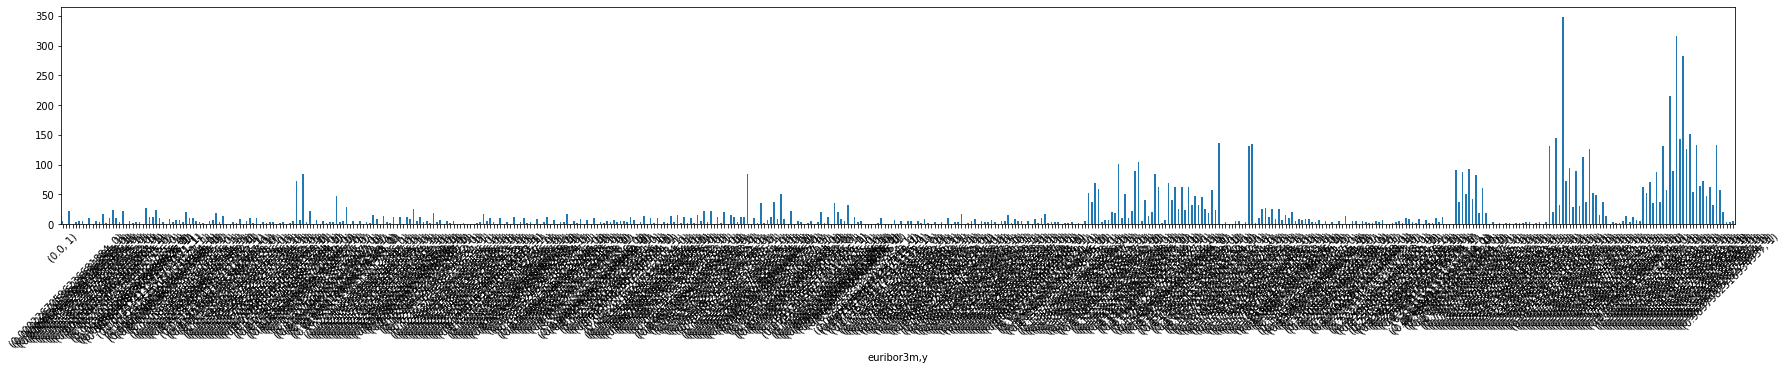

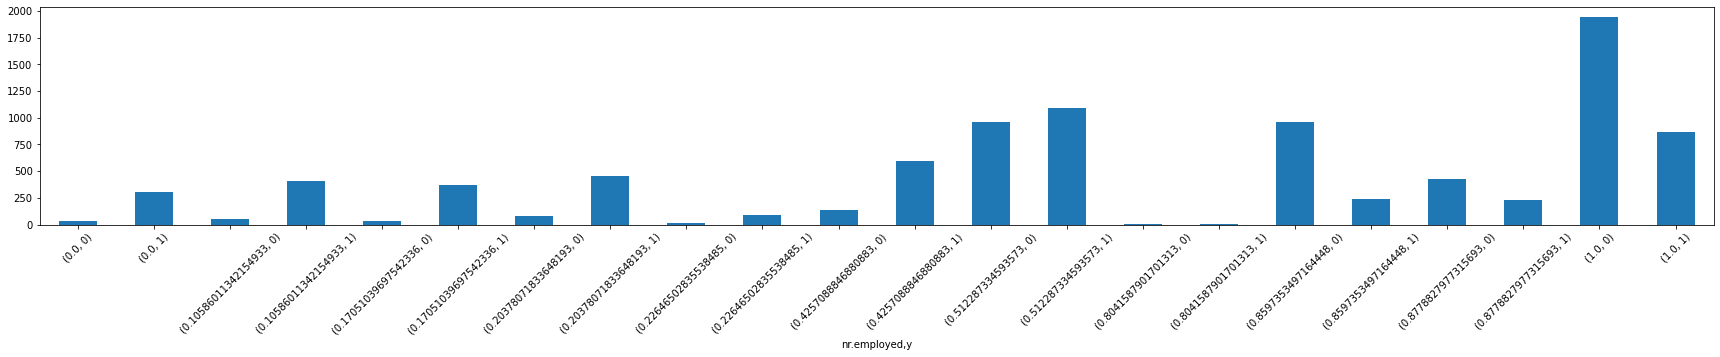

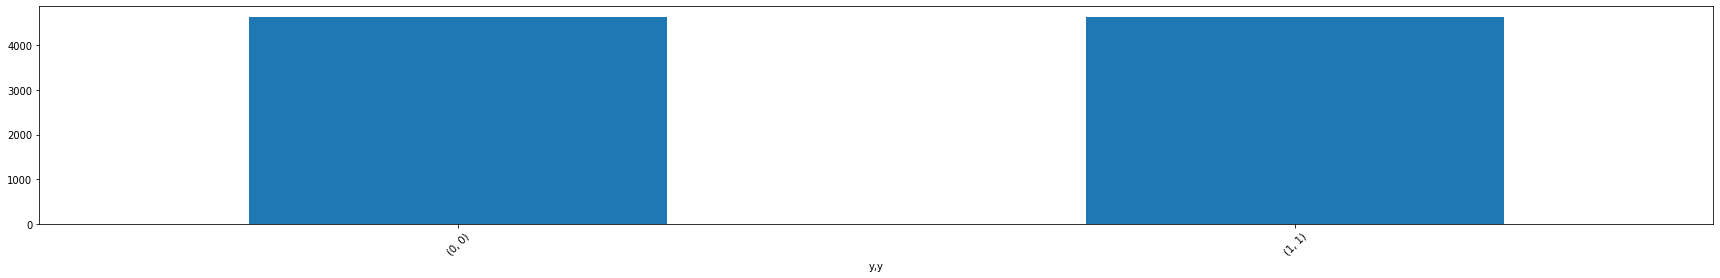

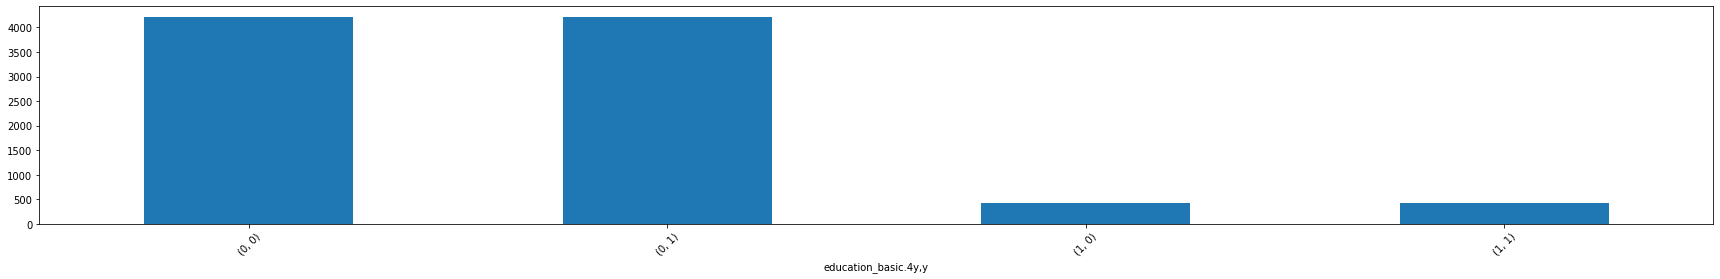

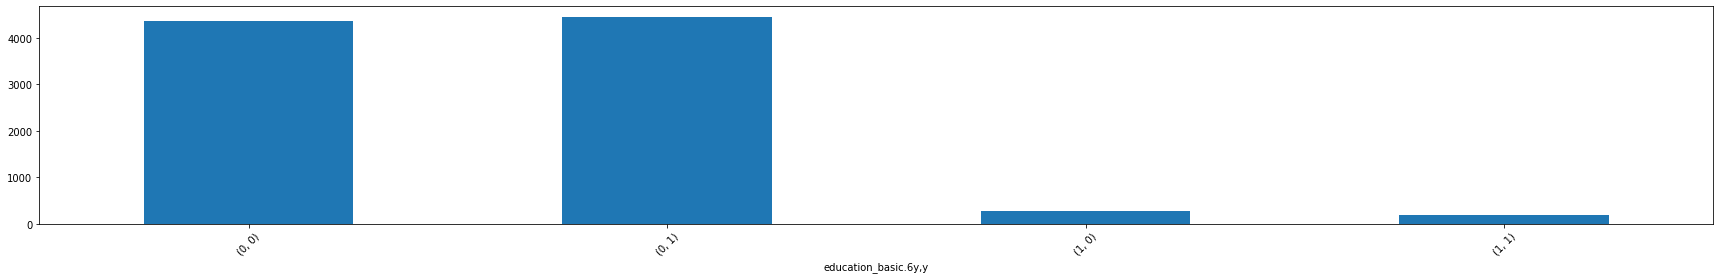

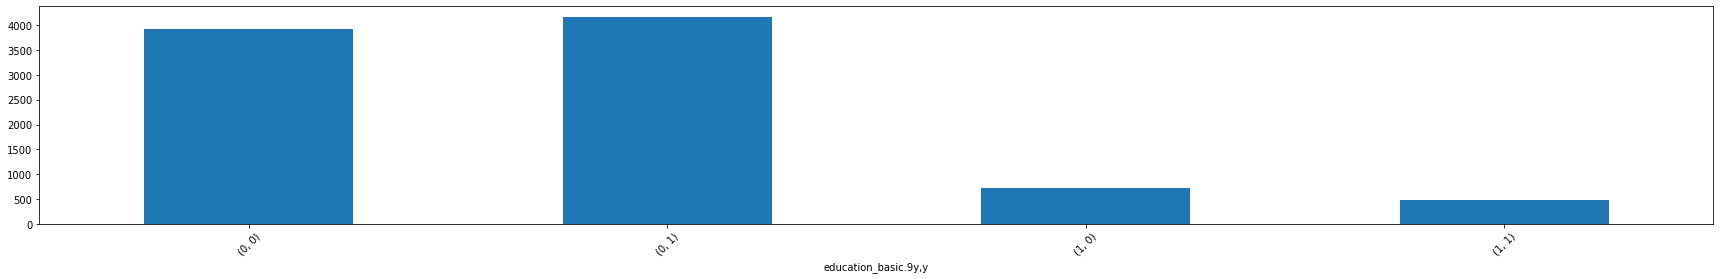

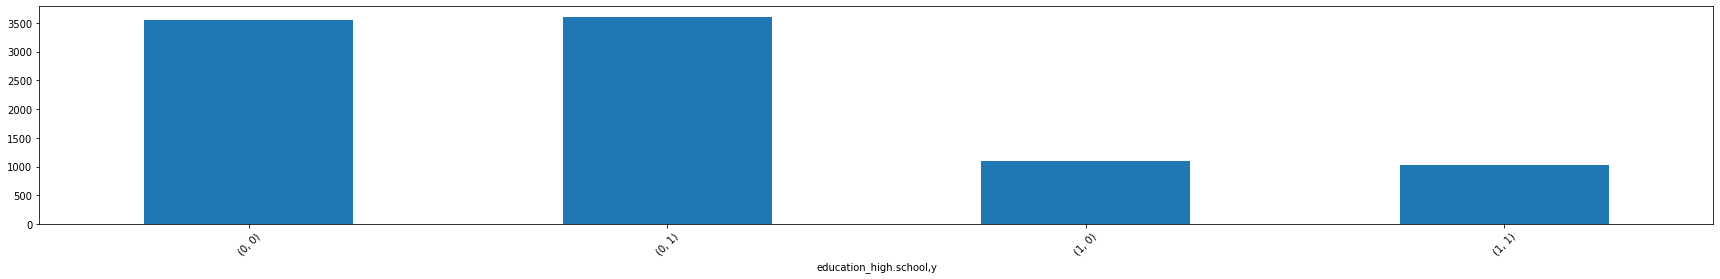

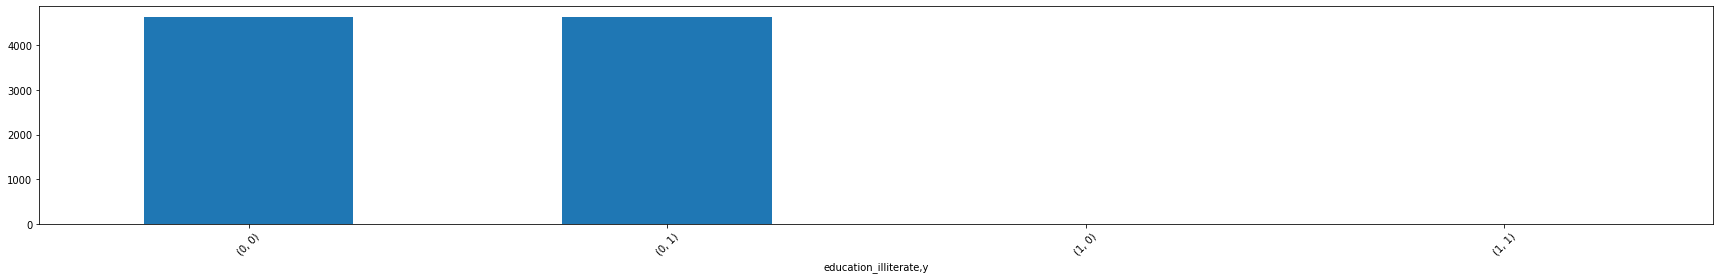

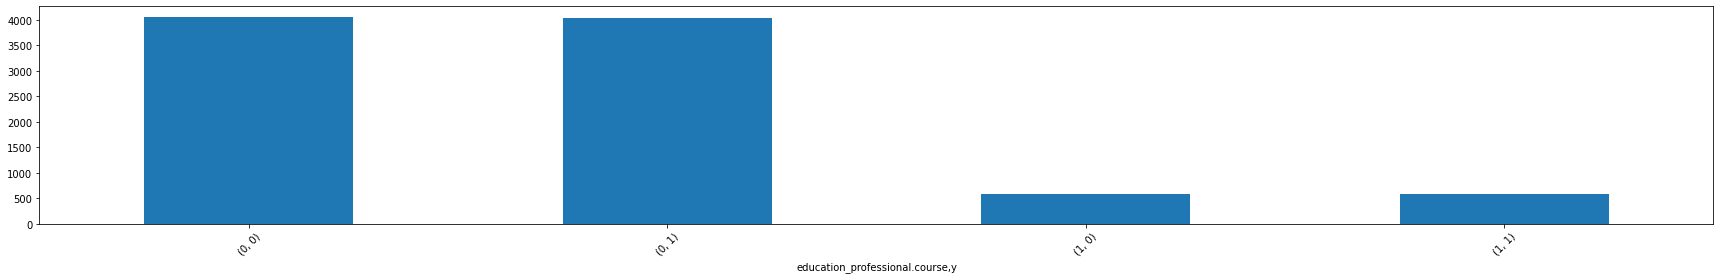

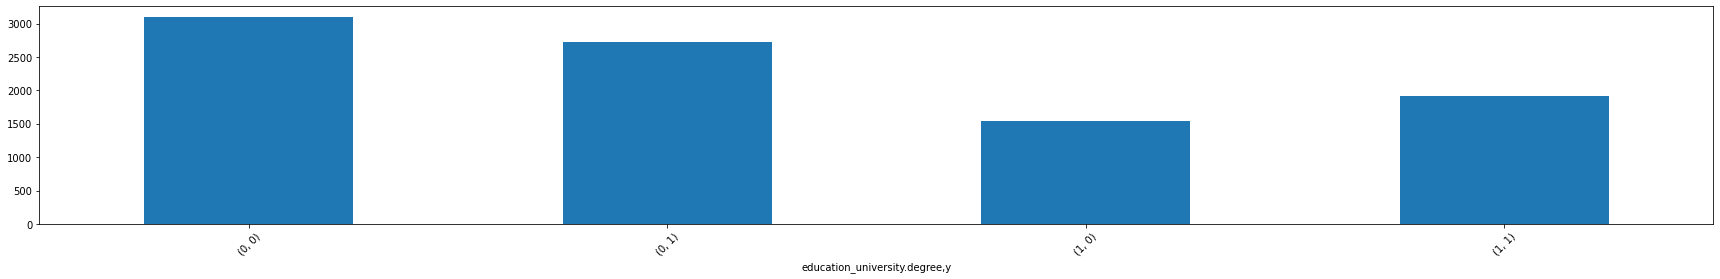

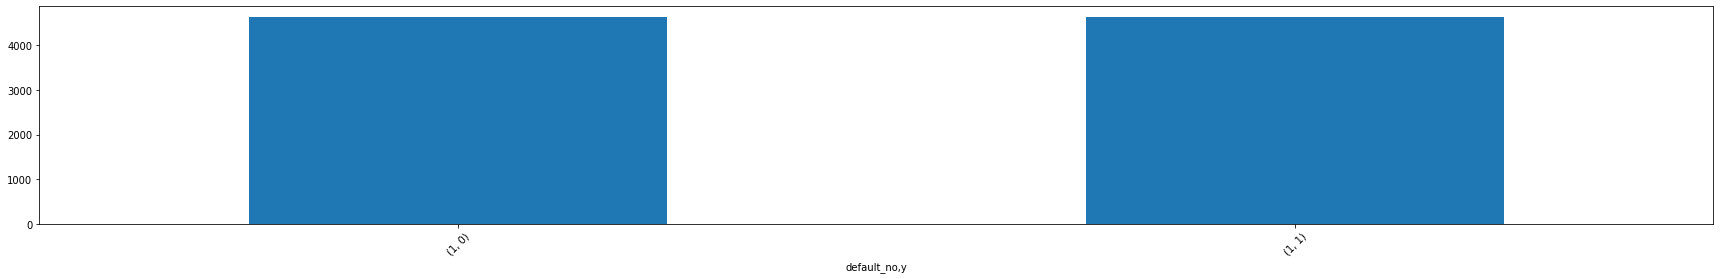

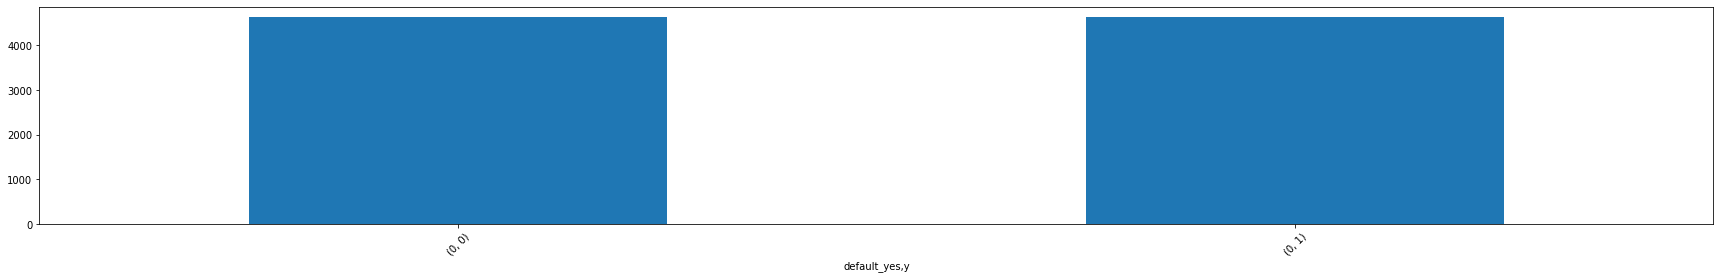

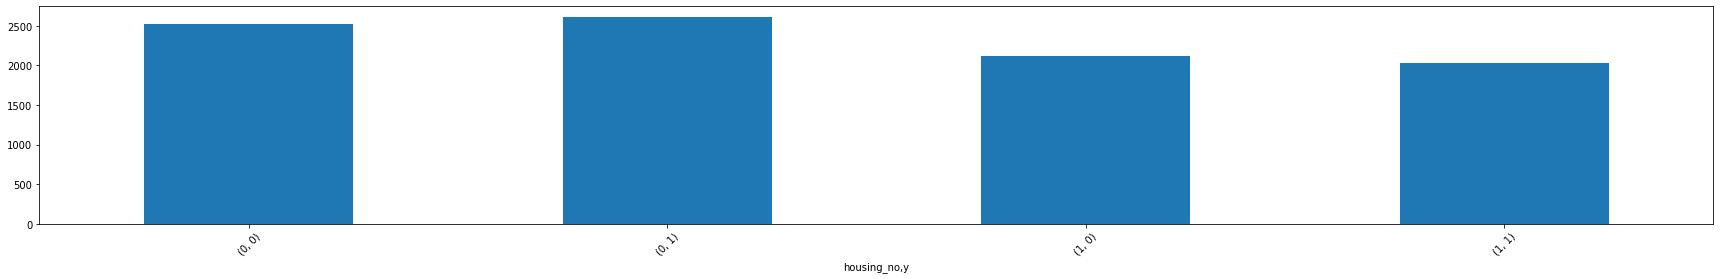

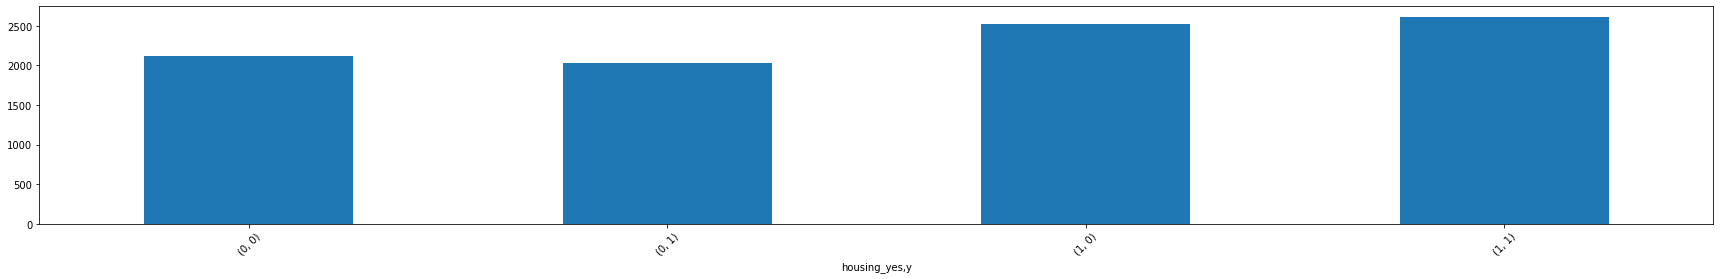

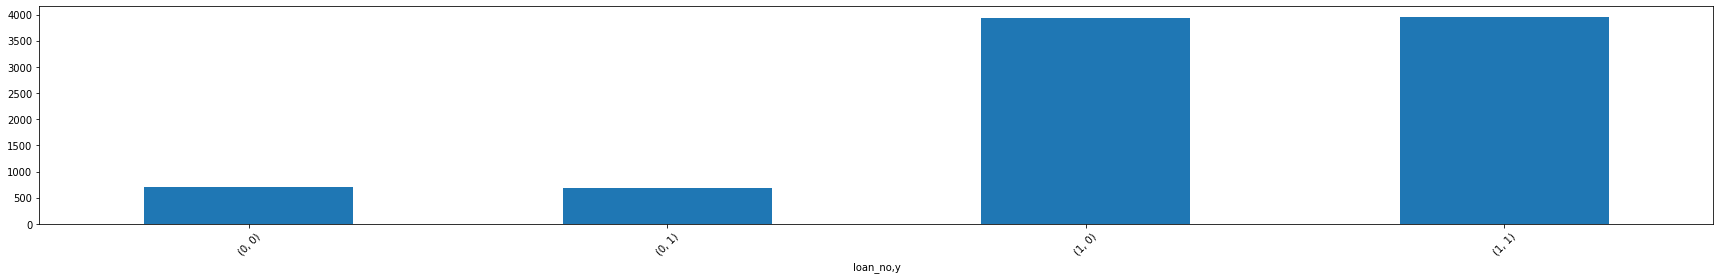

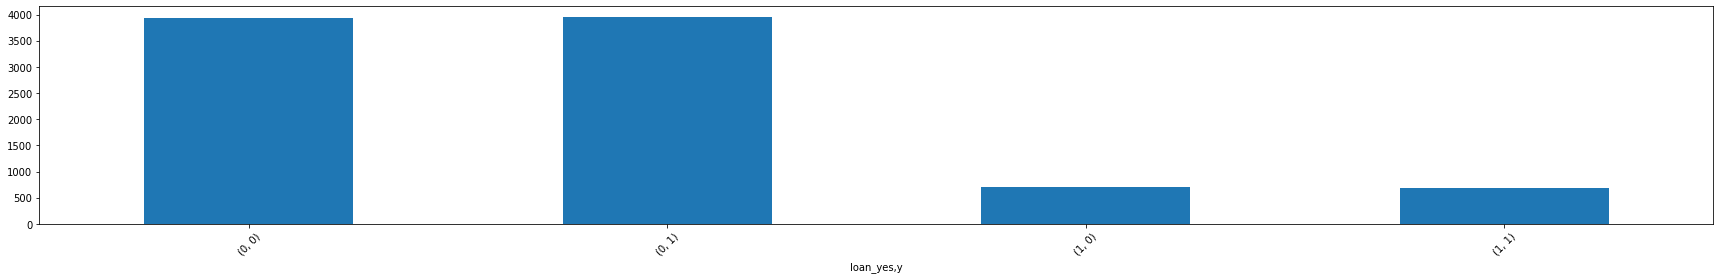

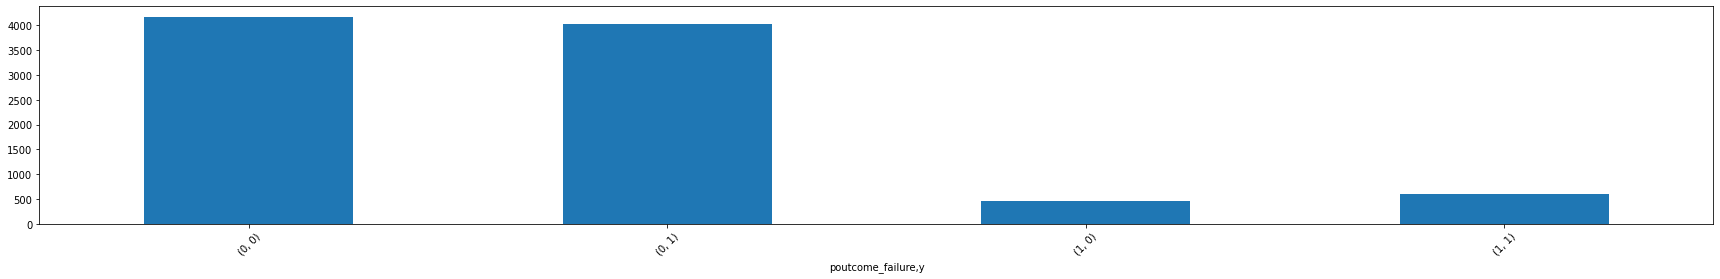

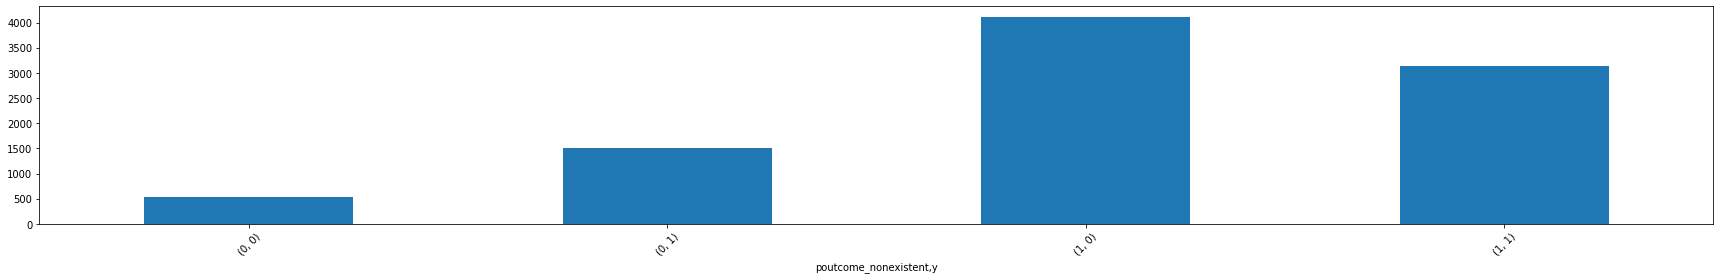

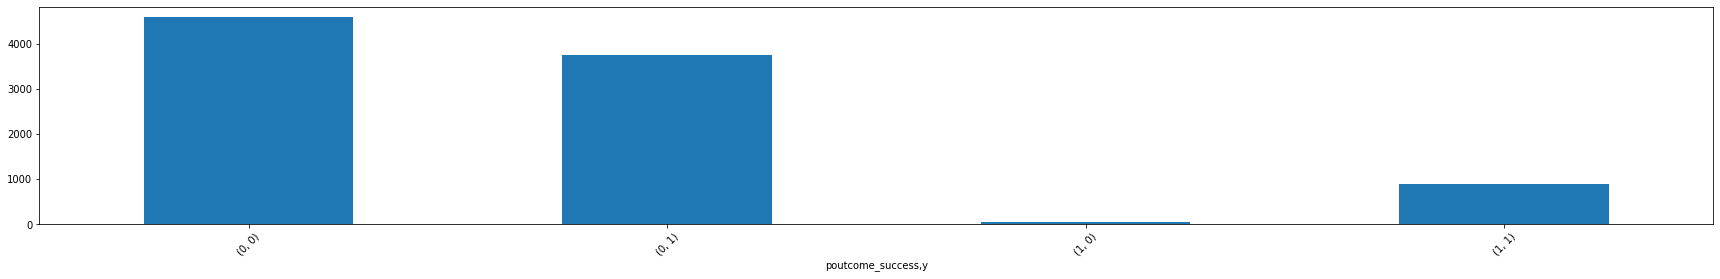

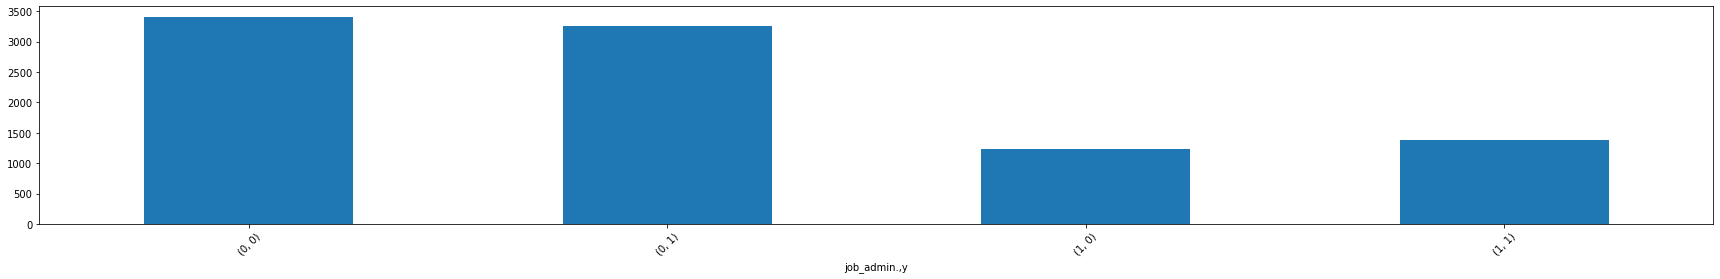

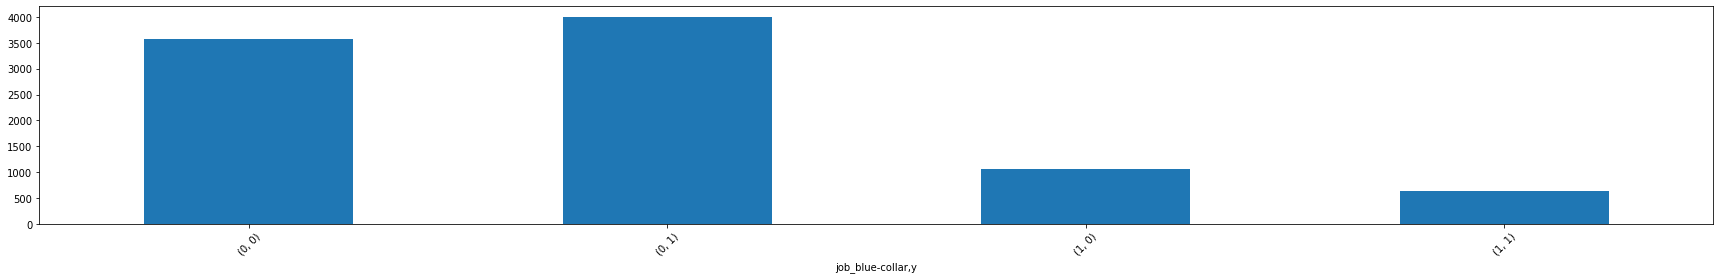

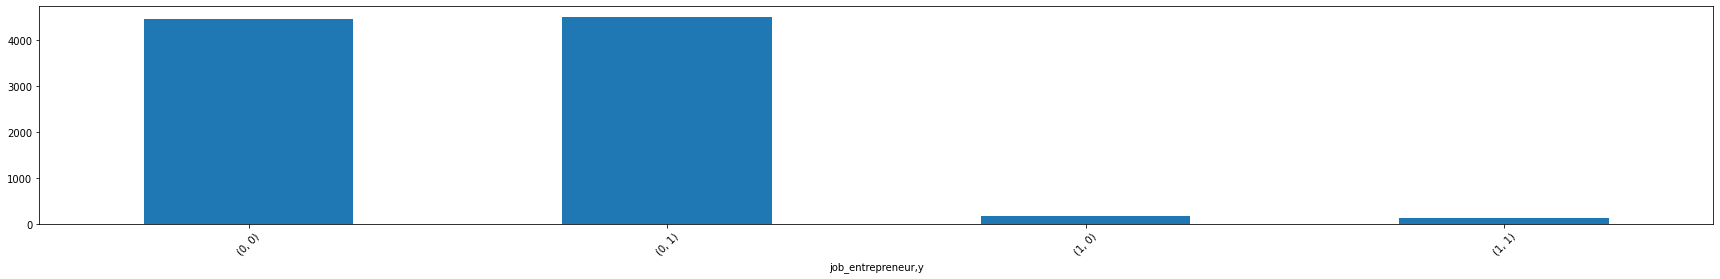

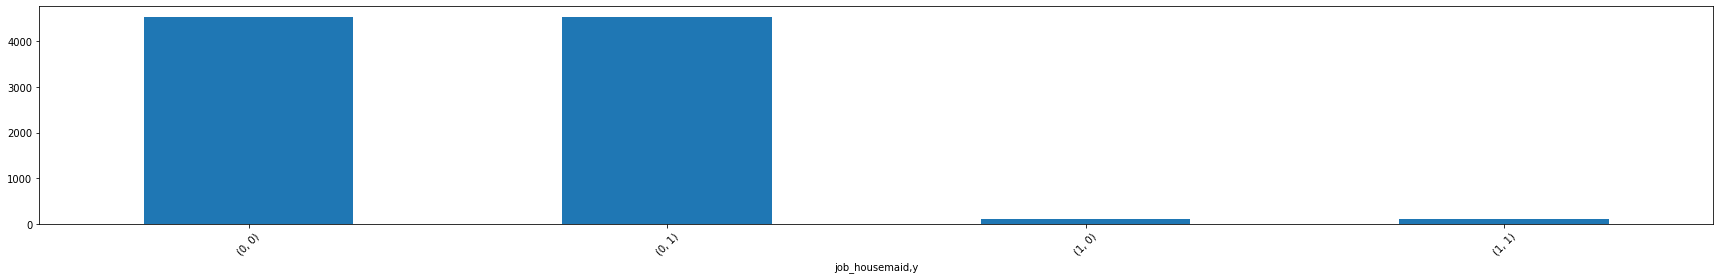

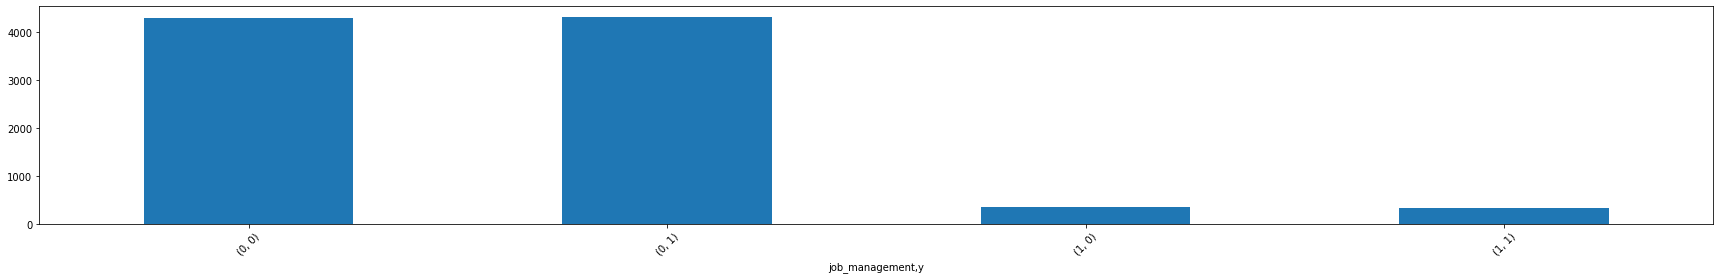

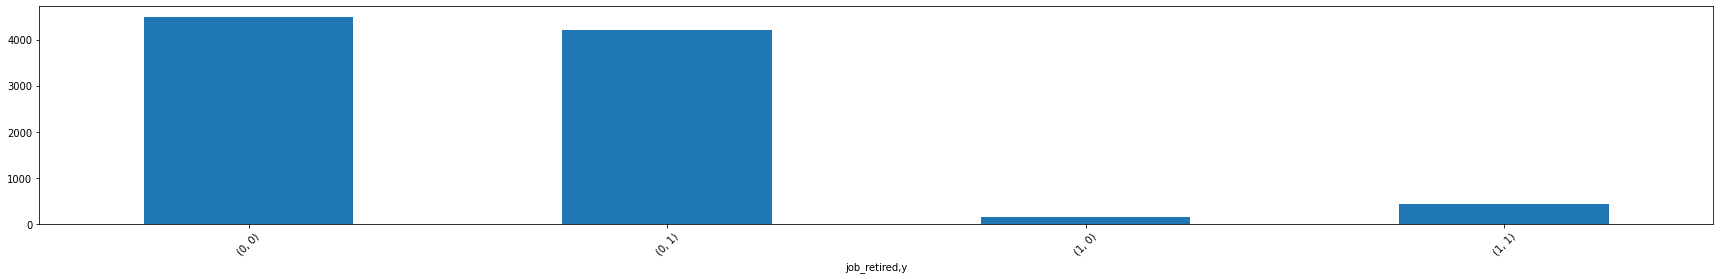

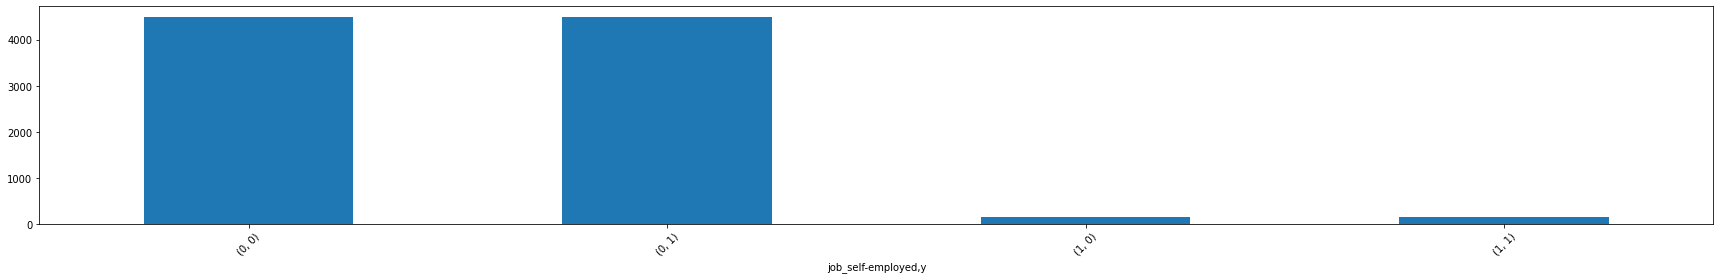

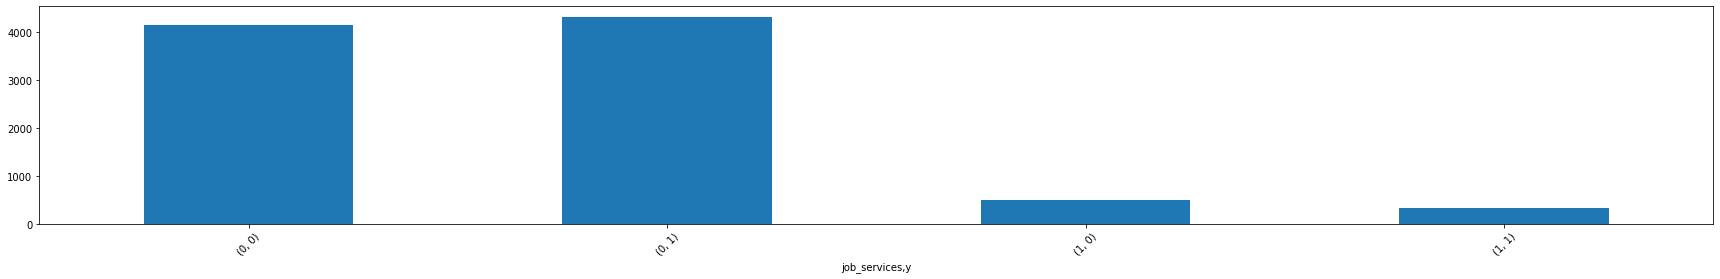

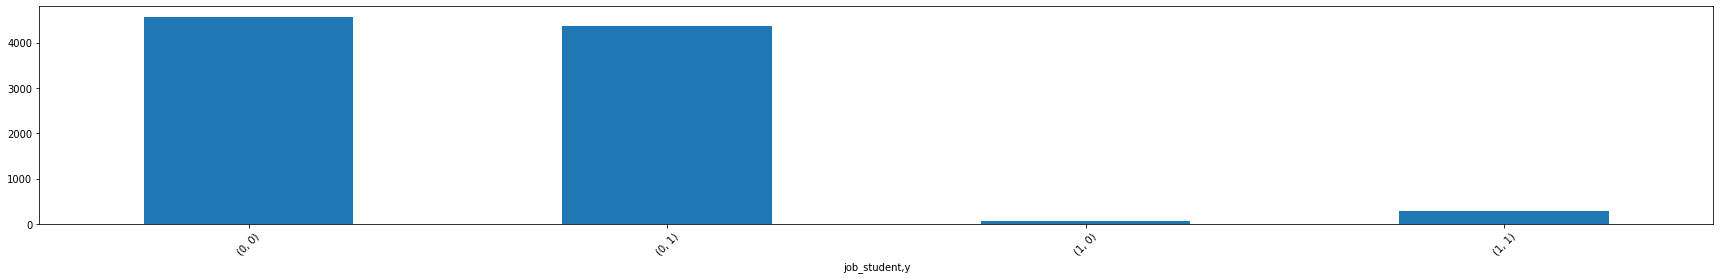

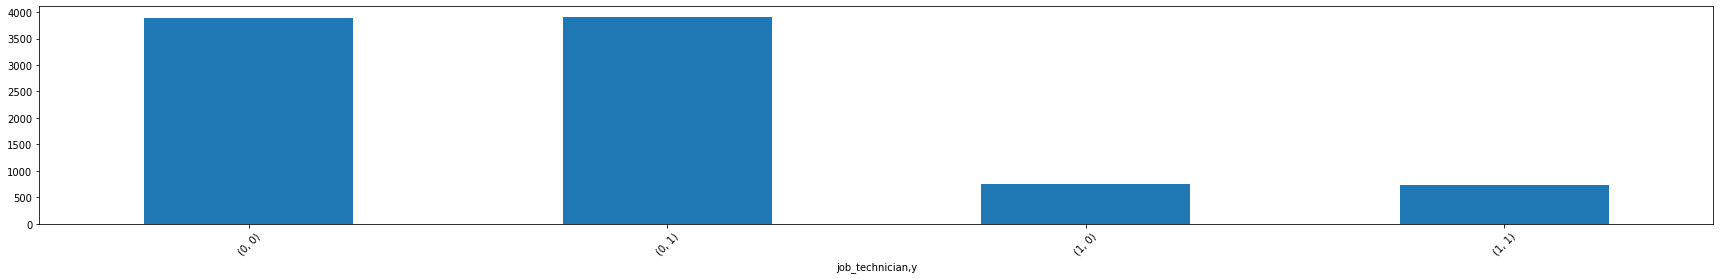

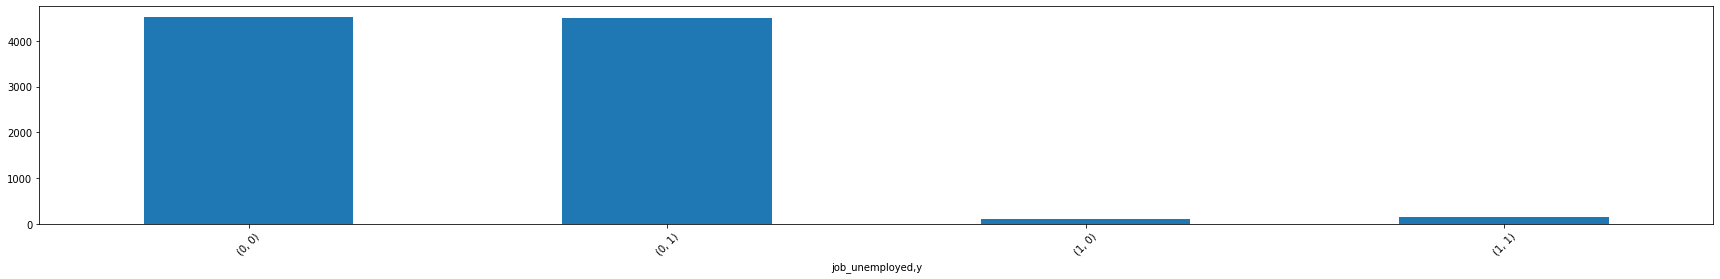

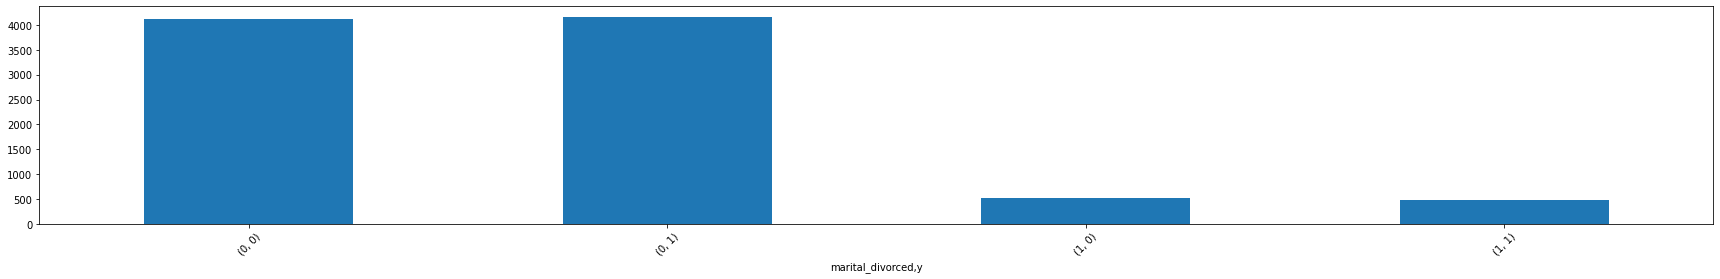

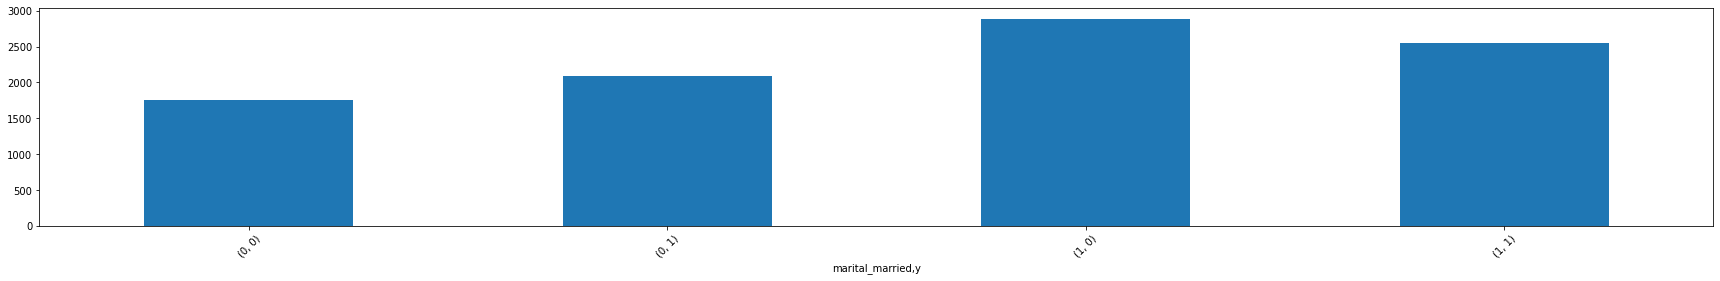

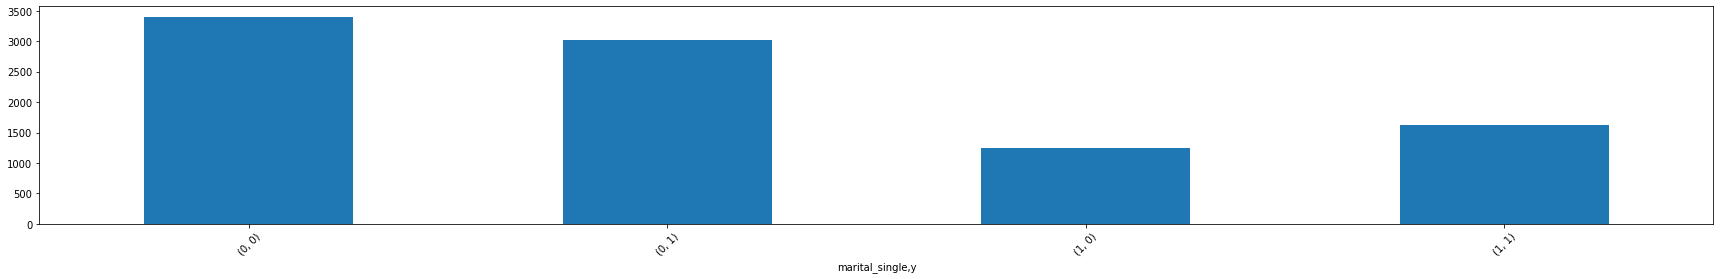

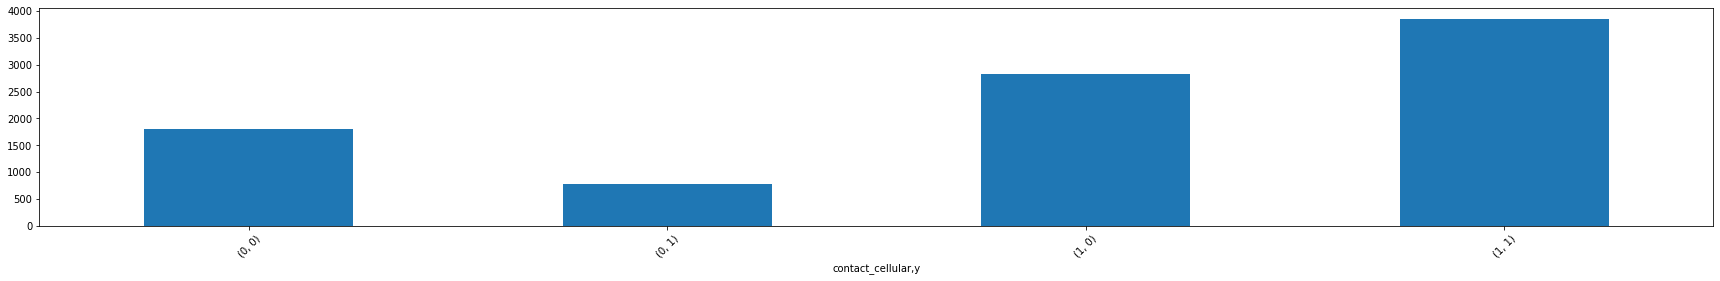

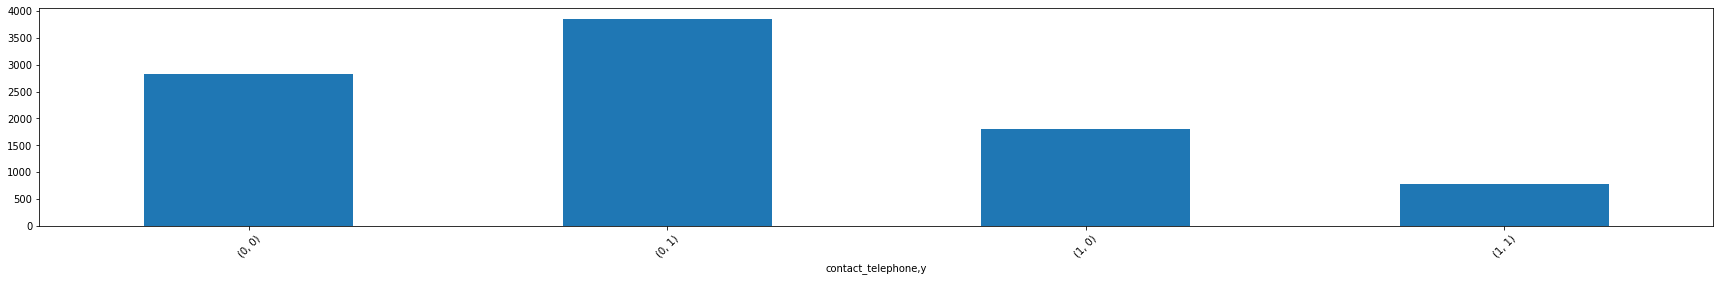

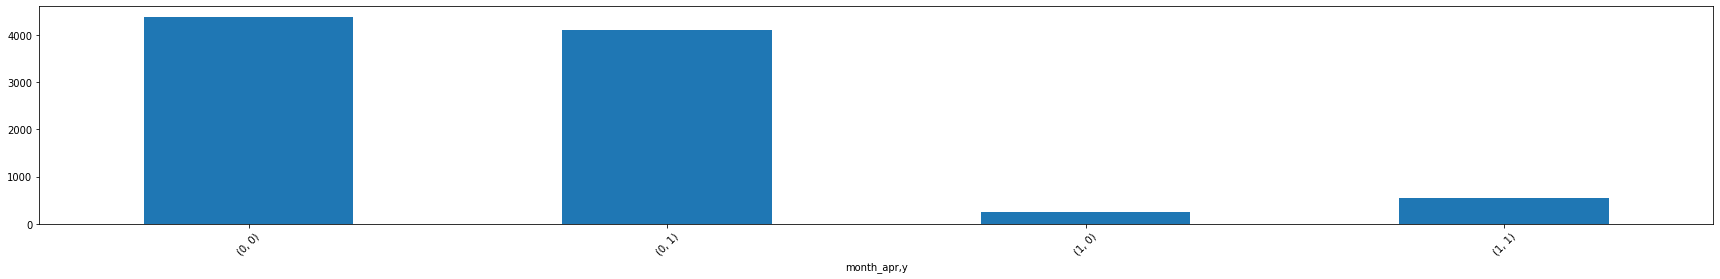

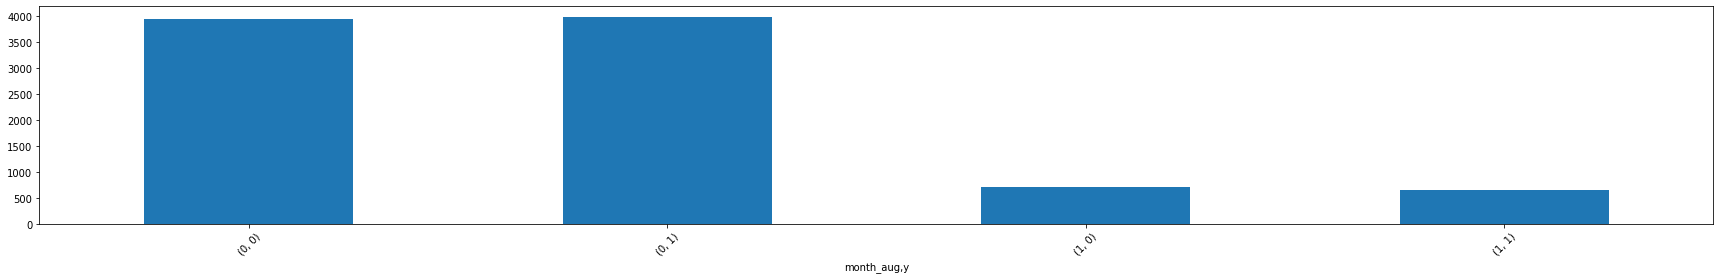

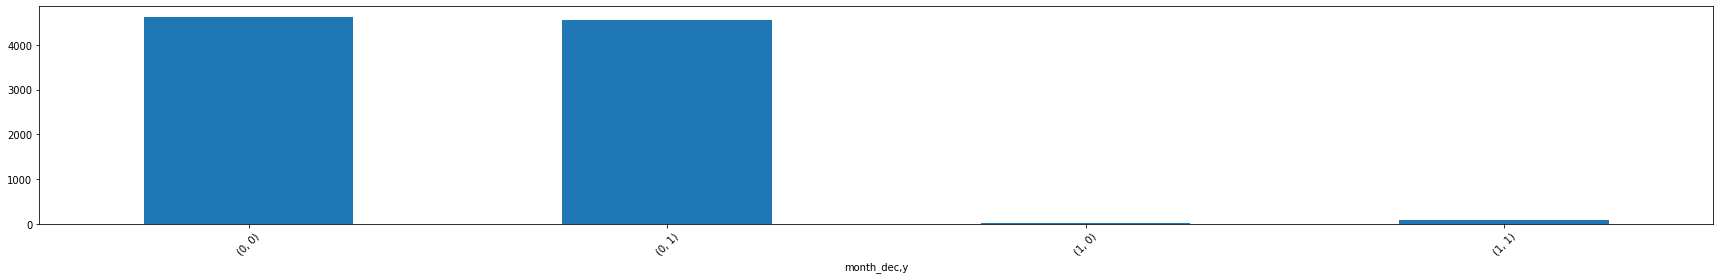

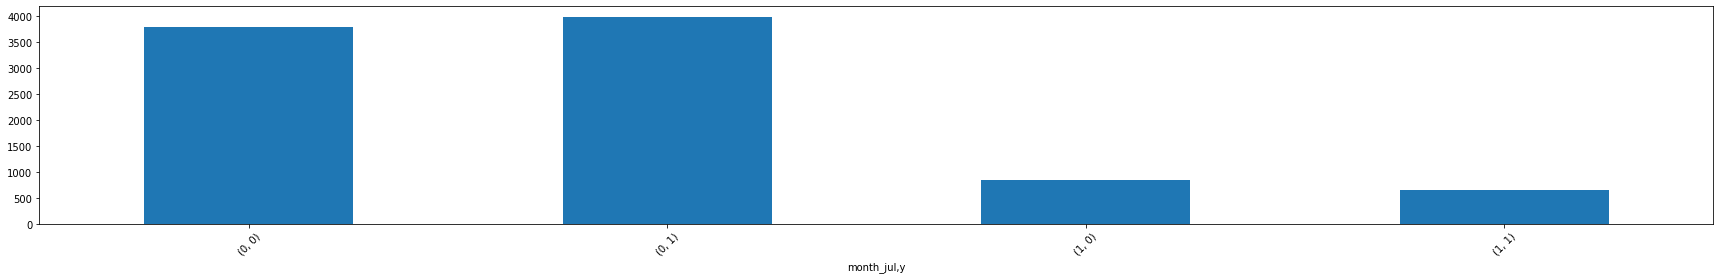

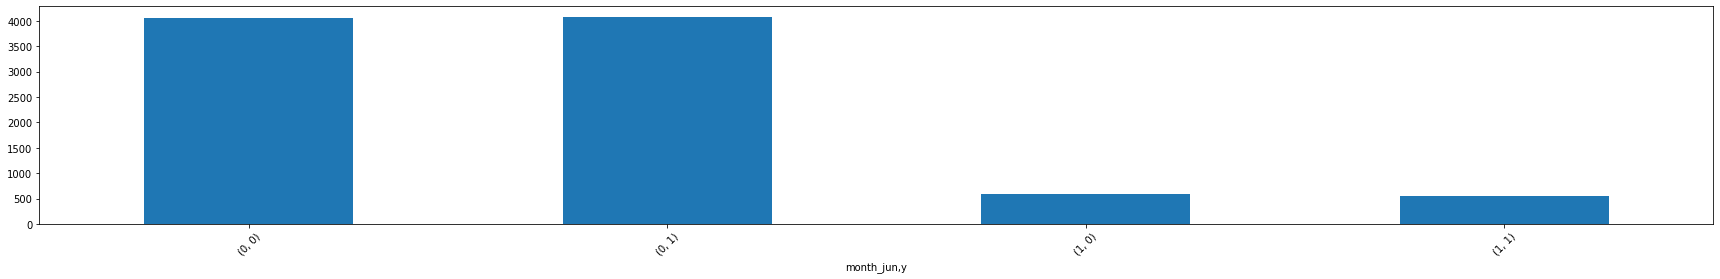

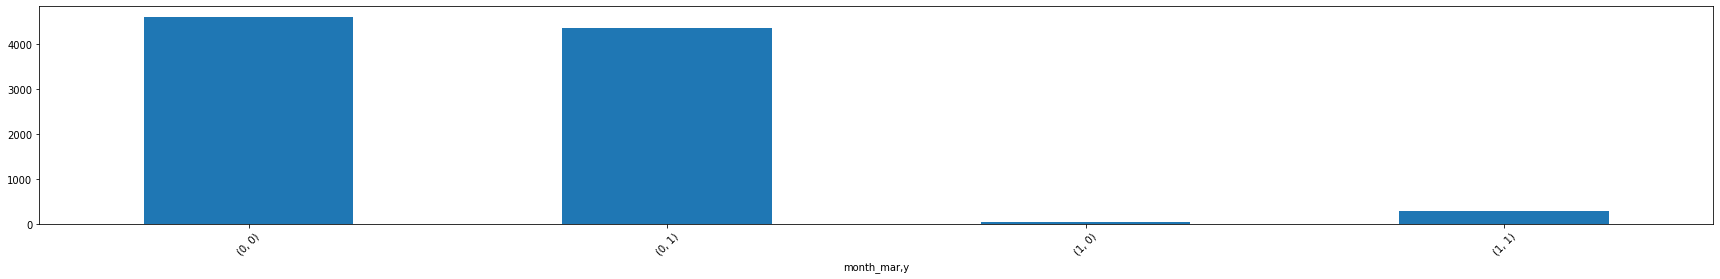

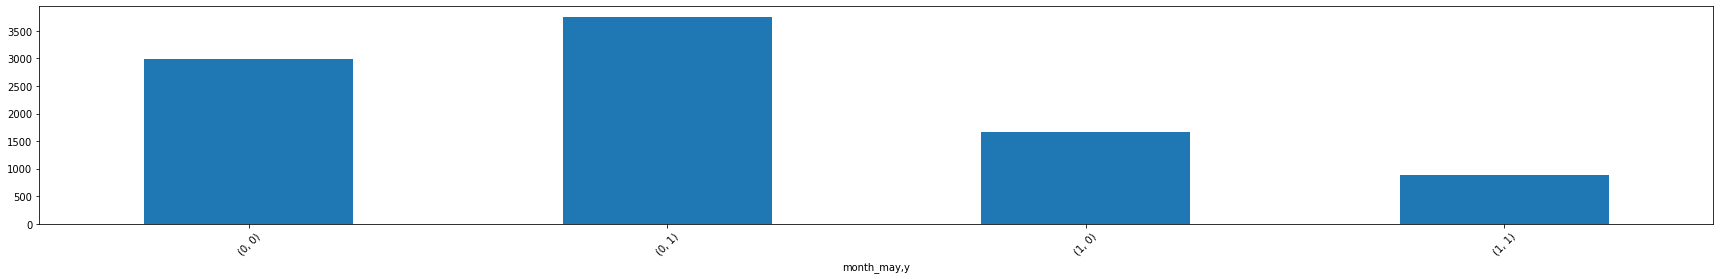

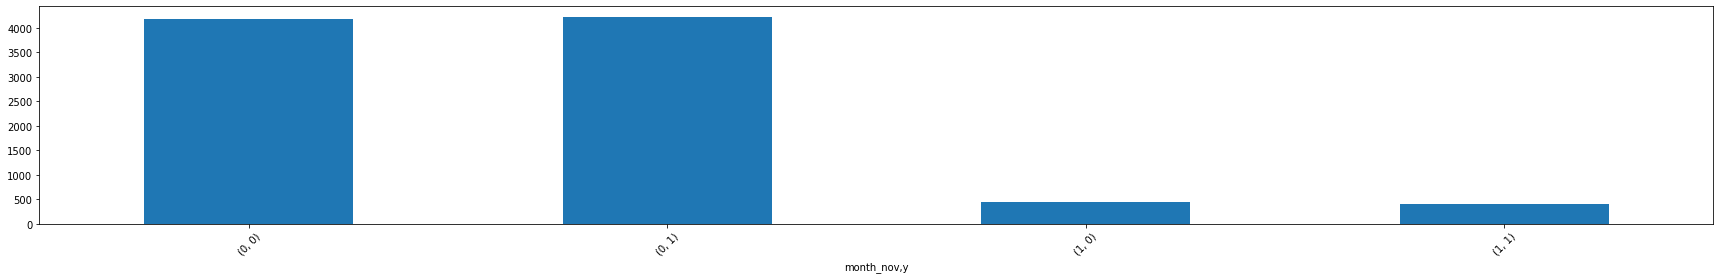

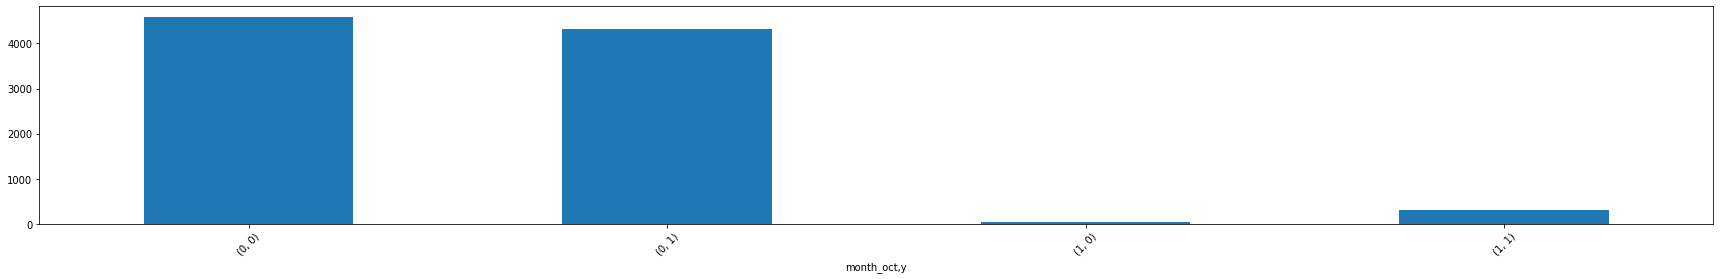

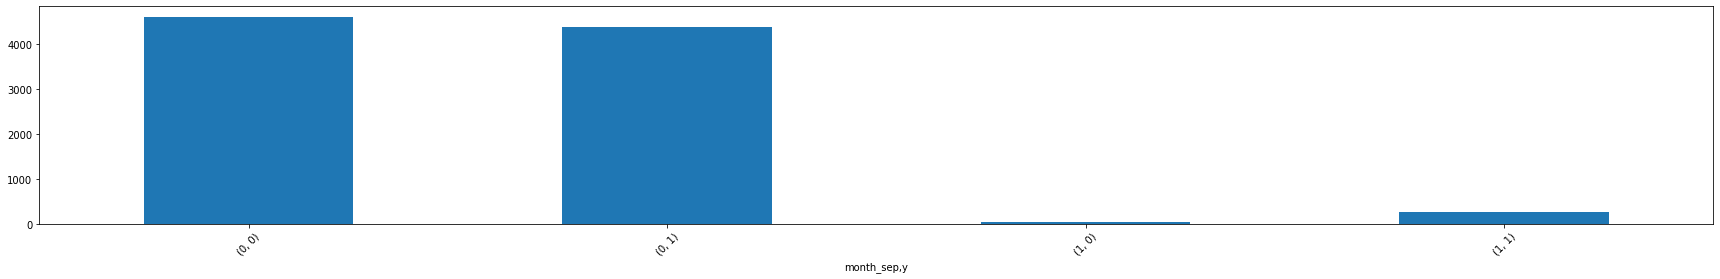

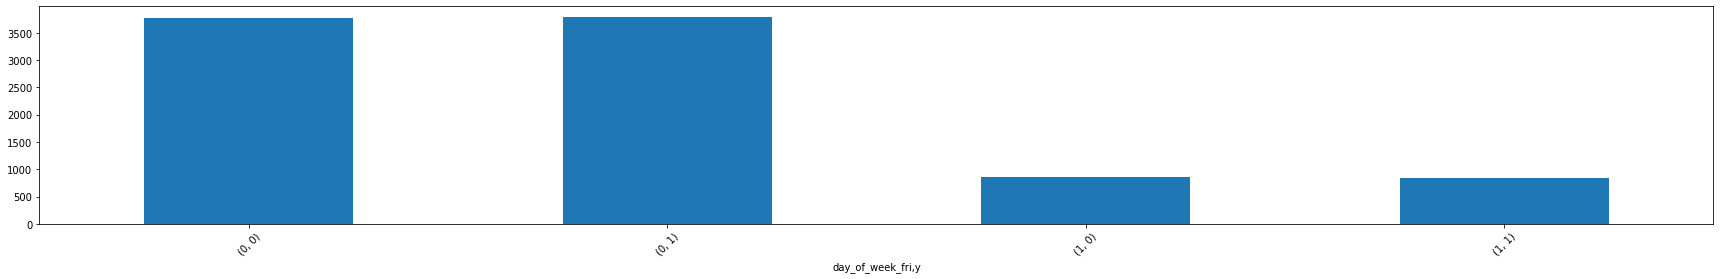

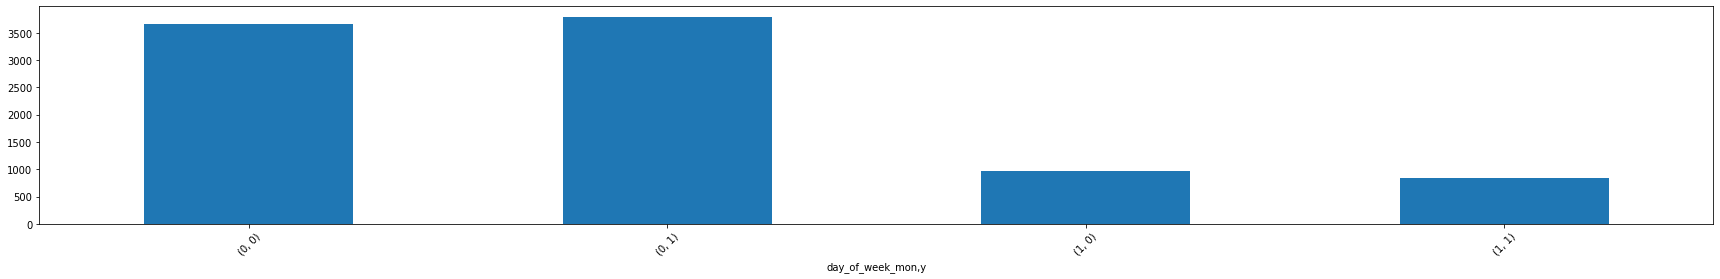

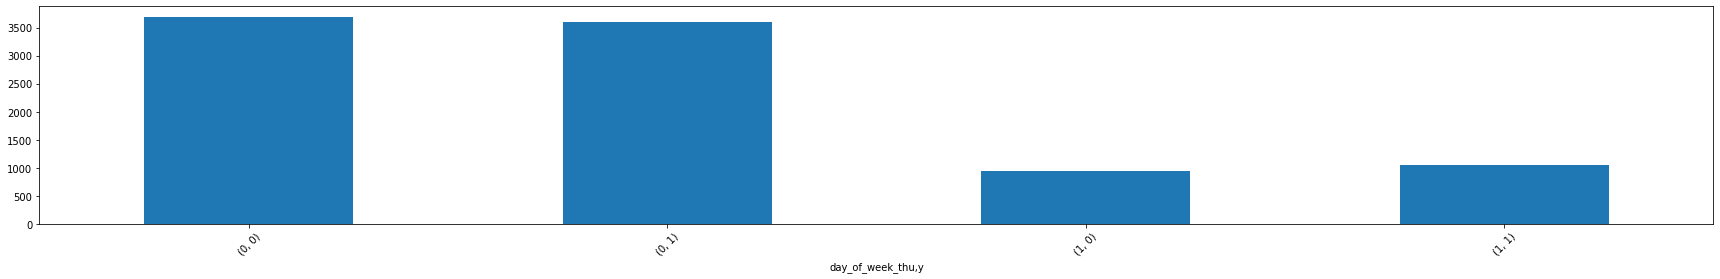

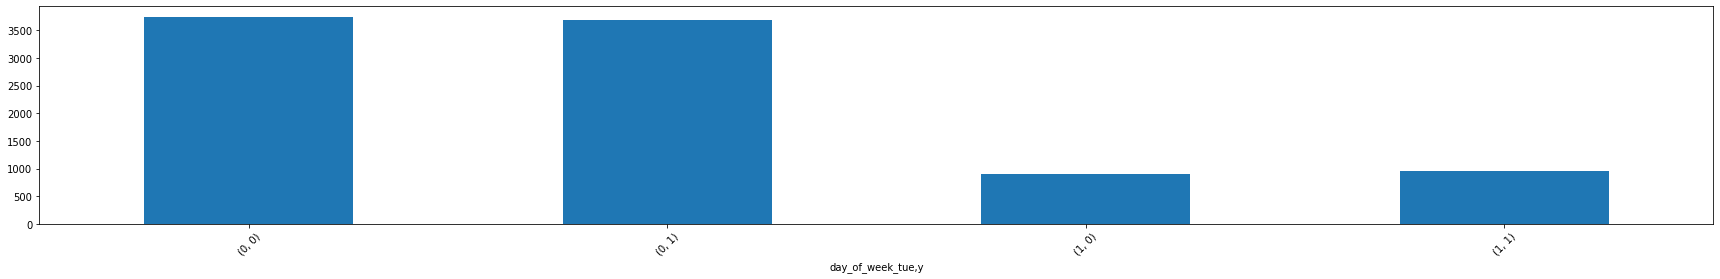

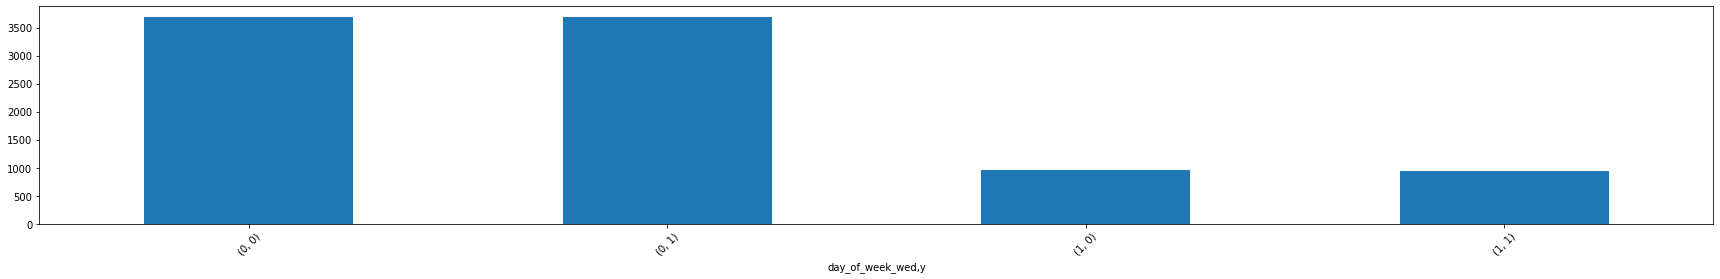

In [ ]:
newListAttrNames = downSampleDF.columns.to_list()
print(len(newListAttrNames))
print(newListAttrNames)
for i in newListAttrNames:
  plt.figure(figsize=(30,4))
  p = downSampleDF.groupby([i, 'y']).size()
  p.plot.bar()
  plt.xticks(rotation=45)

# 6. Chia bộ dữ liệu thành tập huấn luyện

## 6.1 Chia DataFrame thành Train, Test, Validation

### 6.1.1 Dataframe upsample

In [ ]:
upDF = pd.read_csv('/content/drive/My Drive/Machine_Learning/Data/upsample_bank-additional-full.csv');
trainUpDF, testUpDF = train_test_split(upDF, test_size=0.1, random_state=42)
trainUpDF, validationUpDF = train_test_split(trainUpDF, test_size=0.1, random_state=42)
print('data shape: ', upDF.shape)
print('train shape: ', trainUpDF.shape)
print('validation shape: ', validationUpDF.shape)
print('test shap: ', testUpDF.shape)

data shape:  (73096, 57)
train shape:  (59207, 57)
validation shape:  (6579, 57)
test shap:  (7310, 57)


### 6.1.2 Dataframe downsample

In [ ]:
downDF = pd.read_csv('/content/drive/My Drive/Machine_Learning/Data/downsample_bank-additional-full.csv');
trainDownDF, testDownDF = train_test_split(downDF, test_size=0.1, random_state=42)
trainDownDF, validationDownDF = train_test_split(trainDownDF, test_size=0.1, random_state=42)
print('data shape: ', downDF.shape)
print('train shape: ', trainDownDF.shape)
print('validation shape: ', validationDownDF.shape)
print('test shap: ', testDownDF.shape)

data shape:  (9280, 57)
train shape:  (7516, 57)
validation shape:  (836, 57)
test shap:  (928, 57)


## 6.2 Chia bộ dữ liệu thành FEATURES and LABELS để đưa vào các mô hình phân loại.

### 6.2.1 Dataframe upsample

In [ ]:
trainUpLabels = trainUpDF.y.values.flatten()
trainUpFeatures = trainUpDF.drop('y', axis=1).values

testUpLabels = testUpDF.y.values.flatten()
testUpFeatures = testUpDF.drop('y', axis=1).values

validationUpLabels = validationUpDF.y.values.flatten()
validationUpFeatures = validationUpDF.drop('y', axis=1).values

print(trainUpFeatures.shape)
print(trainUpLabels.shape)
print(testUpFeatures.shape)
print(testUpLabels)

(59207, 56)
(59207,)
(7310, 56)
[1 0 1 ... 0 1 0]


### 6.2.2 Dataframe downsample

In [ ]:
trainDownLabels = trainDownDF.y.values.flatten()
trainDownFeatures = trainDownDF.drop('y', axis=1).values

testDownLabels = testDownDF.y.values.flatten()
testDownFeatures = testDownDF.drop('y', axis=1).values

validationDownLabels = validationDownDF.y.values.flatten()
validationDownFeatures = validationDownDF.drop('y', axis=1).values

print(trainDownFeatures.shape)
print(trainDownLabels.shape)
print(testDownFeatures.shape)
print(testDownLabels)

(7516, 56)
(7516,)
(928, 56)
[0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 

# 7 Logistic Regression

## 7.1 DataFrame Upsample

In [ ]:
polyFeatures1 = PolynomialFeatures(degree=1)

In [ ]:
polyFeatures2 = PolynomialFeatures(degree=2)

In [ ]:
trainUpFeaturesPoly1 = polyFeatures1.fit_transform(trainUpFeatures)

In [ ]:
trainUpFeaturesPoly2 = polyFeatures2.fit_transform(trainUpFeatures)

In [ ]:
# linear Upfeatures
logisticR = LogisticRegression()

logisticR.fit(trainUpFeaturesPoly1, trainUpLabels)
validationUpPredict = logisticR.predict(polyFeatures1.fit_transform(validationUpFeatures))
testUpPredict = logisticR.predict(polyFeatures1.fit_transform(testUpFeatures))

# validation
acc1_val = metrics.accuracy_score(validationUpPredict, validationUpLabels)
print(' validation accuracy: ', acc1_val*100)
print(metrics.classification_report(validationUpPredict, validationUpLabels, target_names=['1', '0']))

#test
acc1_test = metrics.accuracy_score(testUpPredict, testUpLabels)
print(' test accuracy: ', acc1_test*100)
print(metrics.classification_report(testUpPredict, testUpLabels, target_names=['1', '0']))

 validation accuracy:  74.20580635354918
              precision    recall  f1-score   support

           1       0.86      0.69      0.77      4034
           0       0.63      0.82      0.71      2545

    accuracy                           0.74      6579
   macro avg       0.74      0.76      0.74      6579
weighted avg       0.77      0.74      0.75      6579

 test accuracy:  73.54309165526675
              precision    recall  f1-score   support

           1       0.85      0.69      0.76      4449
           0       0.63      0.80      0.70      2861

    accuracy                           0.74      7310
   macro avg       0.74      0.75      0.73      7310
weighted avg       0.76      0.74      0.74      7310



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# degree 2 features
logisticR = LogisticRegression()

logisticR.fit(trainUpFeaturesPoly2, trainUpLabels)
validationUpPredict = logisticR.predict(polyFeatures2.fit_transform(validationUpFeatures))
testUpPredict = logisticR.predict(polyFeatures2.fit_transform(testUpFeatures))

# validation
acc2_val = metrics.accuracy_score(validationUpPredict, validationUpLabels)
print(' validation accuracy: ', acc2_val*100)
print(metrics.classification_report(validationUpPredict, validationUpLabels, target_names=['1', '0']))

#test
acc2_test = metrics.accuracy_score(testUpPredict, testUpLabels)
print(' test accuracy: ', acc2_test*100)
print(metrics.classification_report(testUpPredict, testUpLabels, target_names=['1', '0']))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 validation accuracy:  75.04179966560267
              precision    recall  f1-score   support

           1       0.85      0.70      0.77      3929
           0       0.65      0.82      0.73      2650

    accuracy                           0.75      6579
   macro avg       0.75      0.76      0.75      6579
weighted avg       0.77      0.75      0.75      6579

 test accuracy:  74.55540355677155
              precision    recall  f1-score   support

           1       0.84      0.70      0.77      4367
           0       0.65      0.81      0.72      2943

    accuracy                           0.75      7310
   macro avg       0.75      0.76      0.74      7310
weighted avg       0.77      0.75      0.75      7310



## 7.2 DataFrame Downsample

In [ ]:
polyFeatures1 = PolynomialFeatures(degree=1)

In [ ]:
polyFeatures2 = PolynomialFeatures(degree=2)

In [ ]:
trainDownFeaturesPoly1 = polyFeatures1.fit_transform(trainDownFeatures)

In [ ]:
trainDownFeaturesPoly2 = polyFeatures2.fit_transform(trainDownFeatures)

In [ ]:
# linear Downfeatures
logisticR = LogisticRegression()

logisticR.fit(trainDownFeaturesPoly1, trainDownLabels)
validationDownPredict = logisticR.predict(polyFeatures1.fit_transform(validationDownFeatures))
testDownPredict = logisticR.predict(polyFeatures1.fit_transform(testDownFeatures))

# validation
acc1_val = metrics.accuracy_score(validationDownPredict, validationDownLabels)
print(' validation accuracy: ', acc1_val*100)
print(metrics.classification_report(validationDownPredict, validationDownLabels, target_names=['1', '0']))

#test
acc1_test = metrics.accuracy_score(testDownPredict, testDownLabels)
print(' test accuracy: ', acc1_test*100)
print(metrics.classification_report(testDownPredict, testDownLabels, target_names=['1', '0']))

 validation accuracy:  73.68421052631578
              precision    recall  f1-score   support

           1       0.83      0.70      0.76       498
           0       0.64      0.79      0.71       338

    accuracy                           0.74       836
   macro avg       0.74      0.75      0.73       836
weighted avg       0.75      0.74      0.74       836

 test accuracy:  73.70689655172413
              precision    recall  f1-score   support

           1       0.85      0.69      0.76       566
           0       0.63      0.81      0.71       362

    accuracy                           0.74       928
   macro avg       0.74      0.75      0.73       928
weighted avg       0.76      0.74      0.74       928



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# degree 2 Downfeatures
logisticR = LogisticRegression()

logisticR.fit(trainDownFeaturesPoly2, trainDownLabels)
validationDownPredict = logisticR.predict(polyFeatures2.fit_transform(validationDownFeatures))
testDownPredict = logisticR.predict(polyFeatures2.fit_transform(testDownFeatures))

# validation
acc2_val = metrics.accuracy_score(validationDownPredict, validationDownLabels)
print(' validation accuracy: ', acc2_val*100)
print(metrics.classification_report(validationDownPredict, validationDownLabels, target_names=['1', '0']))

#test
acc2_test = metrics.accuracy_score(testDownPredict, testDownLabels)
print(' test accuracy: ', acc2_test*100)
print(metrics.classification_report(testDownPredict, testDownLabels, target_names=['1', '0']))


 validation accuracy:  73.68421052631578
              precision    recall  f1-score   support

           1       0.81      0.71      0.76       484
           0       0.66      0.78      0.71       352

    accuracy                           0.74       836
   macro avg       0.74      0.74      0.74       836
weighted avg       0.75      0.74      0.74       836

 test accuracy:  72.73706896551724
              precision    recall  f1-score   support

           1       0.83      0.69      0.75       559
           0       0.62      0.79      0.70       369

    accuracy                           0.73       928
   macro avg       0.73      0.74      0.72       928
weighted avg       0.75      0.73      0.73       928



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 8 k-Nearest Neighbor

## 8.1 Dataframe Upsample

In [ ]:
import time

k = round(upDF.shape[0]**0.5)
if k % 2 == 0: k += 1
k_range = [k]
for i in range(2, 10, 2): #2->8
  x = round(k/i)
  if x % 2 == 0:
    x += 1
  k_range.append(x)
k_range = sorted(k_range)

for k in k_range:
  start_time = time.time()
  print(k)
  kNNModel = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  kNNModel.fit(trainUpFeatures, trainUpLabels)

  kNNPredVal = kNNModel.predict(validationUpFeatures)
  kNNPredTest = kNNModel.predict(testUpFeatures)

  accVal = metrics.accuracy_score(kNNPredVal, validationUpLabels)
  print(' validation accuracy: ', accVal*100)
  print(metrics.classification_report(validationUpLabels, kNNPredVal, target_names=['1', '0']))

  accTest = metrics.accuracy_score(kNNPredTest, testUpLabels)
  print(' test accuracy: ', accTest*100)
  print(metrics.classification_report(testUpLabels, kNNPredTest, target_names=['1', '0']))
  print("--- %s seconds ---" % (time.time() - start_time))

35
 validation accuracy:  75.0265997872017
              precision    recall  f1-score   support

           1       0.73      0.78      0.75      3237
           0       0.77      0.72      0.75      3342

    accuracy                           0.75      6579
   macro avg       0.75      0.75      0.75      6579
weighted avg       0.75      0.75      0.75      6579

 test accuracy:  75.56771545827633
              precision    recall  f1-score   support

           1       0.74      0.78      0.76      3643
           0       0.77      0.73      0.75      3667

    accuracy                           0.76      7310
   macro avg       0.76      0.76      0.76      7310
weighted avg       0.76      0.76      0.76      7310

--- 62.378682136535645 seconds ---
45
 validation accuracy:  74.40340477276182
              precision    recall  f1-score   support

           1       0.72      0.79      0.75      3237
           0       0.78      0.70      0.73      3342

    accuracy             

## 8.2 DataFrame Downsample

In [ ]:
for k in k_range:
  start_time = time.time()
  print(k)
  kNNModel = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  kNNModel.fit(trainDownFeatures, trainDownLabels)

  kNNPredVal = kNNModel.predict(validationDownFeatures)
  kNNPredTest = kNNModel.predict(testDownFeatures)

  accVal = metrics.accuracy_score(kNNPredVal, validationDownLabels)
  print(' validation accuracy: ', accVal*100)
  print(metrics.classification_report(validationDownLabels, kNNPredVal, target_names=['1', '0']))

  accTest = metrics.accuracy_score(kNNPredTest, testDownLabels)
  print(' test accuracy: ', accTest*100)
  print(metrics.classification_report(testDownLabels, kNNPredTest, target_names=['1', '0']))
  print("--- %s seconds ---" % (time.time() - start_time))

35
 validation accuracy:  73.92344497607655
              precision    recall  f1-score   support

           1       0.70      0.83      0.76       420
           0       0.79      0.65      0.71       416

    accuracy                           0.74       836
   macro avg       0.75      0.74      0.74       836
weighted avg       0.75      0.74      0.74       836

 test accuracy:  72.73706896551724
              precision    recall  f1-score   support

           1       0.68      0.84      0.75       462
           0       0.80      0.61      0.69       466

    accuracy                           0.73       928
   macro avg       0.74      0.73      0.72       928
weighted avg       0.74      0.73      0.72       928

--- 1.3694519996643066 seconds ---
45
 validation accuracy:  74.28229665071771
              precision    recall  f1-score   support

           1       0.70      0.84      0.77       420
           0       0.80      0.64      0.71       416

    accuracy            

In [ ]:
k = round((data.shape[0])**0.5)
accScoreKNN = 0.0
print('k = ', k)
kNNModel = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
kNNModel.fit(trainFeatures, trainLabels)
kNNPrediction = kNNModel.predict(testFeatures)
accScoreKNN = metrics.accuracy_score(kNNPrediction, testLabels)
print('accuracy: {}'.format(accScoreKNN * 100))
print(metrics.classification_report(testLabels, kNNPrediction, target_names=['1','0']))

k =  270
accuracy: 73.87824897400822
              precision    recall  f1-score   support

           1       0.70      0.85      0.77      7354
           0       0.80      0.63      0.71      7266

    accuracy                           0.74     14620
   macro avg       0.75      0.74      0.74     14620
weighted avg       0.75      0.74      0.74     14620



In [ ]:
k = round((data.shape[0])**0.5)
accScoreKNN = 0.0
print('k = ', k)
kNNModel = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
kNNModel.fit(trainFeatures, trainLabels)
kNNPrediction = kNNModel.predict(testFeatures)
accScoreKNN = metrics.accuracy_score(kNNPrediction, testLabels)
print('accuracy: {}'.format(accScoreKNN * 100))
print(metrics.classification_report(testLabels, kNNPrediction, target_names=['1','0']))

k =  270
accuracy: 53.62517099863201
              precision    recall  f1-score   support

           1       0.87      0.09      0.17      7354
           0       0.52      0.99      0.68      7266

    accuracy                           0.54     14620
   macro avg       0.69      0.54      0.42     14620
weighted avg       0.69      0.54      0.42     14620



In [ ]:
k = round((data.shape[0])**0.5)
accScoreKNN = 0.0
print('k = ', k)
kNNModel = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
kNNModel.fit(trainFeatures, trainLabels)
kNNPrediction = kNNModel.predict(testFeatures)
accScoreKNN = metrics.accuracy_score(kNNPrediction, testLabels)
print('accuracy: {}'.format(accScoreKNN * 100))
print(metrics.classification_report(testLabels, kNNPrediction, target_names=['1','0']))

k =  270
accuracy: 73.74829001367989
              precision    recall  f1-score   support

           1       0.69      0.85      0.77      7354
           0       0.81      0.62      0.70      7266

    accuracy                           0.74     14620
   macro avg       0.75      0.74      0.73     14620
weighted avg       0.75      0.74      0.73     14620



# 9. Naive Bayes

## 9.1 Multinominal Naive Bayes

### 9.1.1 Dataframe Upsample

In [ ]:
MNBModel = MultinomialNB()
MNBModel.fit(trainUpFeatures, trainUpLabels)

MNBPredictionVal = MNBModel.predict(validationUpFeatures)
MNBPredictionTest = MNBModel.predict(testUpFeatures)

acc_val = metrics.accuracy_score(MNBPredictionVal, validationUpLabels)
acc_test = metrics.accuracy_score(MNBPredictionTest, testUpLabels)

print(' validation accuracy: {}'.format(acc_val * 100))
print(metrics.classification_report(validationUpLabels, MNBPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(acc_test * 100))
print(metrics.classification_report(testUpLabels, MNBPredictionTest, target_names=['1','0']))

 validation accuracy: 71.9562243502052
              precision    recall  f1-score   support

           1       0.68      0.81      0.74      3237
           0       0.77      0.64      0.70      3342

    accuracy                           0.72      6579
   macro avg       0.73      0.72      0.72      6579
weighted avg       0.73      0.72      0.72      6579

 test accuracy: 71.51846785225719
              precision    recall  f1-score   support

           1       0.68      0.80      0.74      3643
           0       0.76      0.64      0.69      3667

    accuracy                           0.72      7310
   macro avg       0.72      0.72      0.71      7310
weighted avg       0.72      0.72      0.71      7310



### 9.1.2 Dataframe Downsample

In [ ]:
MNBModel = MultinomialNB()
MNBModel.fit(trainDownFeatures, trainDownLabels)

MNBPredictionVal = MNBModel.predict(validationDownFeatures)
MNBPredictionTest = MNBModel.predict(testDownFeatures)

acc_val = metrics.accuracy_score(MNBPredictionVal, validationDownLabels)
acc_test = metrics.accuracy_score(MNBPredictionTest, testDownLabels)

print(' validation accuracy: {}'.format(acc_val * 100))
print(metrics.classification_report(validationDownLabels, MNBPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(acc_test * 100))
print(metrics.classification_report(testDownLabels, MNBPredictionTest, target_names=['1','0']))

 validation accuracy: 72.48803827751196
              precision    recall  f1-score   support

           1       0.70      0.79      0.74       420
           0       0.75      0.66      0.71       416

    accuracy                           0.72       836
   macro avg       0.73      0.72      0.72       836
weighted avg       0.73      0.72      0.72       836

 test accuracy: 70.6896551724138
              precision    recall  f1-score   support

           1       0.67      0.79      0.73       462
           0       0.75      0.62      0.68       466

    accuracy                           0.71       928
   macro avg       0.71      0.71      0.70       928
weighted avg       0.71      0.71      0.70       928



## 9.2 Complement Naive Bayes

### 9.2.1 Dataframe Upsample

In [ ]:
CNBModel = ComplementNB()
CNBModel.fit(trainUpFeatures, trainUpLabels)

CNBPredictionVal = CNBModel.predict(validationUpFeatures)
CNBPredictionTest = CNBModel.predict(testUpFeatures)

acc_val = metrics.accuracy_score(CNBPredictionVal, validationUpLabels)
acc_test = metrics.accuracy_score(CNBPredictionTest, testUpLabels)

print(' validation accuracy: {}'.format(acc_val * 100))
print(metrics.classification_report(validationUpLabels, CNBPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(acc_test * 100))
print(metrics.classification_report(testUpLabels, CNBPredictionTest, target_names=['1','0']))

 validation accuracy: 72.01702386380909
              precision    recall  f1-score   support

           1       0.68      0.81      0.74      3237
           0       0.77      0.64      0.70      3342

    accuracy                           0.72      6579
   macro avg       0.73      0.72      0.72      6579
weighted avg       0.73      0.72      0.72      6579

 test accuracy: 71.54582763337893
              precision    recall  f1-score   support

           1       0.68      0.80      0.74      3643
           0       0.76      0.64      0.69      3667

    accuracy                           0.72      7310
   macro avg       0.72      0.72      0.71      7310
weighted avg       0.72      0.72      0.71      7310



### 9.2.2 DataFrame Downsample

In [ ]:
CNBModel = ComplementNB()
CNBModel.fit(trainDownFeatures, trainDownLabels)

CNBPredictionVal = CNBModel.predict(validationDownFeatures)
CNBPredictionTest = CNBModel.predict(testDownFeatures)

acc_val = metrics.accuracy_score(CNBPredictionVal, validationDownLabels)
acc_test = metrics.accuracy_score(CNBPredictionTest, testDownLabels)

print(' validation accuracy: {}'.format(acc_val * 100))
print(metrics.classification_report(validationDownLabels, CNBPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(acc_test * 100))
print(metrics.classification_report(testDownLabels, CNBPredictionTest, target_names=['1','0']))

 validation accuracy: 72.48803827751196
              precision    recall  f1-score   support

           1       0.70      0.79      0.74       420
           0       0.75      0.66      0.71       416

    accuracy                           0.72       836
   macro avg       0.73      0.72      0.72       836
weighted avg       0.73      0.72      0.72       836

 test accuracy: 70.6896551724138
              precision    recall  f1-score   support

           1       0.67      0.79      0.73       462
           0       0.75      0.62      0.68       466

    accuracy                           0.71       928
   macro avg       0.71      0.71      0.70       928
weighted avg       0.71      0.71      0.70       928



## 9.3 Bernoulli Naive Bayes

### 9.3.1 DataFrame Upsample

In [ ]:
BNBModel = BernoulliNB()
BNBModel.fit(trainUpFeatures, trainUpLabels)

BNBPredictionVal = BNBModel.predict(validationUpFeatures)
BNBPredictionTest = BNBModel.predict(testUpFeatures)

acc_val = metrics.accuracy_score(BNBPredictionVal, validationUpLabels)
acc_test = metrics.accuracy_score(BNBPredictionTest, testUpLabels)

print(' validation accuracy: {}'.format(acc_val * 100))
print(metrics.classification_report(validationUpLabels, BNBPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(acc_test * 100))
print(metrics.classification_report(testUpLabels, BNBPredictionTest, target_names=['1','0']))

 validation accuracy: 68.23225414196686
              precision    recall  f1-score   support

           1       0.65      0.76      0.70      3237
           0       0.72      0.61      0.66      3342

    accuracy                           0.68      6579
   macro avg       0.69      0.68      0.68      6579
weighted avg       0.69      0.68      0.68      6579

 test accuracy: 67.64705882352942
              precision    recall  f1-score   support

           1       0.65      0.75      0.70      3643
           0       0.71      0.61      0.65      3667

    accuracy                           0.68      7310
   macro avg       0.68      0.68      0.67      7310
weighted avg       0.68      0.68      0.67      7310



### 9.3.2 DataFrame Downsample

In [ ]:
BNBModel = BernoulliNB()
BNBModel.fit(trainDownFeatures, trainDownLabels)

BNBPredictionVal = BNBModel.predict(validationDownFeatures)
BNBPredictionTest = BNBModel.predict(testDownFeatures)

acc_val = metrics.accuracy_score(BNBPredictionVal, validationDownLabels)
acc_test = metrics.accuracy_score(BNBPredictionTest, testDownLabels)

print(' validation accuracy: {}'.format(acc_val * 100))
print(metrics.classification_report(validationDownLabels, BNBPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(acc_test * 100))
print(metrics.classification_report(testDownLabels, BNBPredictionTest, target_names=['1','0']))

 validation accuracy: 69.61722488038278
              precision    recall  f1-score   support

           1       0.67      0.77      0.72       420
           0       0.73      0.62      0.67       416

    accuracy                           0.70       836
   macro avg       0.70      0.70      0.69       836
weighted avg       0.70      0.70      0.69       836

 test accuracy: 67.02586206896551
              precision    recall  f1-score   support

           1       0.65      0.75      0.69       462
           0       0.70      0.59      0.64       466

    accuracy                           0.67       928
   macro avg       0.67      0.67      0.67       928
weighted avg       0.67      0.67      0.67       928



# 10. Support Vector Machine

## 10.1 DataFrame Upsample


### 10.1.1 Kernel = Linear

In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='linear', C=100.)
SVMModel.fit(trainUpFeatures, trainUpLabels)

SVMPredictionVal = SVMModel.predict(validationUpFeatures)
SVMPredictionTest = SVMModel.predict(testUpFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationUpLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testUpLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationUpLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testUpLabels, SVMPredictionTest, target_names=['1','0']))

KeyboardInterrupt: ignored

In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='poly', degree=2, gamma=0.1, C=100)
SVMModel.fit(trainDownFeatures, trainDownLabels)

SVMPredictionVal = SVMModel.predict(validationDownFeatures)
SVMPredictionTest = SVMModel.predict(testDownFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationDownLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testDownLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationDownLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testDownLabels, SVMPredictionTest, target_names=['1','0']))

In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='sigmoid', gamma=0.1, C=100.)
SVMModel.fit(trainDownFeatures, trainDownLabels)

SVMPredictionVal = SVMModel.predict(validationDownFeatures)
SVMPredictionTest = SVMModel.predict(testDownFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationDownLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testDownLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationDownLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testDownLabels, SVMPredictionTest, target_names=['1','0']))

In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='rbf', gamma=0.1, C=100.)
SVMModel.fit(trainDownFeatures, trainDownLabels)

SVMPredictionVal = SVMModel.predict(validationDownFeatures)
SVMPredictionTest = SVMModel.predict(testDownFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationDownLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testDownLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationDownLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testDownLabels, SVMPredictionTest, target_names=['1','0']))

## 10.2 DataFrame Downsample

In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='linear', C=100.)
SVMModel.fit(trainDownFeatures, trainDownLabels)

SVMPredictionVal = SVMModel.predict(validationDownFeatures)
SVMPredictionTest = SVMModel.predict(testDownFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationDownLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testDownLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationDownLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testDownLabels, SVMPredictionTest, target_names=['1','0']))

--- 254.338543176651 seconds ---
 validation accuracy: 72.36842105263158
              precision    recall  f1-score   support

           1       0.69      0.83      0.75       420
           0       0.78      0.62      0.69       416

    accuracy                           0.72       836
   macro avg       0.73      0.72      0.72       836
weighted avg       0.73      0.72      0.72       836

 test accuracy: 72.73706896551724
              precision    recall  f1-score   support

           1       0.68      0.86      0.76       462
           0       0.81      0.60      0.69       466

    accuracy                           0.73       928
   macro avg       0.74      0.73      0.72       928
weighted avg       0.74      0.73      0.72       928



In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='poly', degree=2, gamma=0.1, C=100)
SVMModel.fit(trainDownFeatures, trainDownLabels)

SVMPredictionVal = SVMModel.predict(validationDownFeatures)
SVMPredictionTest = SVMModel.predict(testDownFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationDownLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testDownLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationDownLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testDownLabels, SVMPredictionTest, target_names=['1','0']))

--- 49.91935753822327 seconds ---
 validation accuracy: 73.80382775119617
              precision    recall  f1-score   support

           1       0.69      0.87      0.77       420
           0       0.83      0.60      0.70       416

    accuracy                           0.74       836
   macro avg       0.76      0.74      0.73       836
weighted avg       0.76      0.74      0.73       836

 test accuracy: 73.8146551724138
              precision    recall  f1-score   support

           1       0.68      0.89      0.77       462
           0       0.85      0.58      0.69       466

    accuracy                           0.74       928
   macro avg       0.76      0.74      0.73       928
weighted avg       0.76      0.74      0.73       928



In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='poly', degree=3, gamma=0.1, C=100)
SVMModel.fit(trainDownFeatures, trainDownLabels)

SVMPredictionVal = SVMModel.predict(validationDownFeatures)
SVMPredictionTest = SVMModel.predict(testDownFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationDownLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testDownLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationDownLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testDownLabels, SVMPredictionTest, target_names=['1','0']))

--- 40.1037437915802 seconds ---
 validation accuracy: 67.82296650717703
              precision    recall  f1-score   support

           1       0.67      0.72      0.69       420
           0       0.69      0.63      0.66       416

    accuracy                           0.68       836
   macro avg       0.68      0.68      0.68       836
weighted avg       0.68      0.68      0.68       836

 test accuracy: 68.64224137931035
              precision    recall  f1-score   support

           1       0.67      0.74      0.70       462
           0       0.71      0.63      0.67       466

    accuracy                           0.69       928
   macro avg       0.69      0.69      0.69       928
weighted avg       0.69      0.69      0.69       928



In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='sigmoid', gamma=0.1, C=100.)
SVMModel.fit(trainDownFeatures, trainDownLabels)

SVMPredictionVal = SVMModel.predict(validationDownFeatures)
SVMPredictionTest = SVMModel.predict(testDownFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationDownLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testDownLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationDownLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testDownLabels, SVMPredictionTest, target_names=['1','0']))

--- 3.8250925540924072 seconds ---
 validation accuracy: 62.44019138755981
              precision    recall  f1-score   support

           1       0.63      0.63      0.63       420
           0       0.62      0.62      0.62       416

    accuracy                           0.62       836
   macro avg       0.62      0.62      0.62       836
weighted avg       0.62      0.62      0.62       836

 test accuracy: 60.23706896551724
              precision    recall  f1-score   support

           1       0.59      0.64      0.61       462
           0       0.61      0.57      0.59       466

    accuracy                           0.60       928
   macro avg       0.60      0.60      0.60       928
weighted avg       0.60      0.60      0.60       928



In [ ]:
import time
start_time = time.time()

SVMModel = svm.SVC(kernel='rbf', gamma=0.1, C=100.)
SVMModel.fit(trainDownFeatures, trainDownLabels)

SVMPredictionVal = SVMModel.predict(validationDownFeatures)
SVMPredictionTest = SVMModel.predict(testDownFeatures)

accScoreSVMVal = metrics.accuracy_score(SVMPredictionVal, validationDownLabels)
accScoreSVMTest = metrics.accuracy_score(SVMPredictionTest, testDownLabels)

print("--- %s seconds ---" % (time.time() - start_time))

print(' validation accuracy: {}'.format(accScoreSVMVal * 100))
print(metrics.classification_report(validationDownLabels, SVMPredictionVal, target_names=['1','0']))

print(' test accuracy: {}'.format(accScoreSVMTest * 100))
print(metrics.classification_report(testDownLabels, SVMPredictionTest, target_names=['1','0']))

--- 12.462427377700806 seconds ---
 validation accuracy: 67.34449760765551
              precision    recall  f1-score   support

           1       0.67      0.70      0.68       420
           0       0.68      0.65      0.66       416

    accuracy                           0.67       836
   macro avg       0.67      0.67      0.67       836
weighted avg       0.67      0.67      0.67       836

 test accuracy: 68.53448275862068
              precision    recall  f1-score   support

           1       0.67      0.73      0.70       462
           0       0.70      0.65      0.67       466

    accuracy                           0.69       928
   macro avg       0.69      0.69      0.68       928
weighted avg       0.69      0.69      0.68       928



# 11. Multi Perceptron

## 11.1 DataFrame Upsample relu sigmoid

### 11.1.1 non Dropout

In [ ]:
upDF = pd.read_csv('/content/drive/My Drive/Machine_Learning/Data/upsample_bank-additional-full.csv');
y = upDF['y'].values
X = upDF.drop('y', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_validation = keras.utils.to_categorical(y_validation, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(46780, 56)
(14620, 56)
(11696, 56)
(46780, 2)
(14620, 2)
(11696, 2)


In [ ]:
MPModel = Sequential()
MPModel.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
MPModel.add(Dense(2, activation='sigmoid'))
MPModel.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               28500     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = MPModel.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation))

Epoch 1/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.6003 - acc: 0.7159 - val_loss: 0.5536 - val_acc: 0.7275
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5434 - acc: 0.7341 - val_loss: 0.5368 - val_acc: 0.7369
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5345 - acc: 0.7414 - val_loss: 0.5333 - val_acc: 0.7367
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5314 - acc: 0.7434 - val_loss: 0.5301 - val_acc: 0.7441
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5283 - acc: 0.7456 - val_loss: 0.5278 - val_acc: 0.7454
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5252 - acc: 0.7469 - val_loss: 0.5262 - val_acc: 0.7464
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5222 - acc: 0.7497 - val_loss: 0.5237 - val_acc: 0.7497
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
# evaluate the model
train_acc = MPModel.evaluate(X_train, y_train)
val_acc = MPModel.evaluate(X_validation, y_validation)
test_acc = MPModel.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc)
print(val_acc)
print(test_acc)

457/457 [==============================] - 1s 2ms/step - loss: 0.3554 - acc: 0.8682
loss, accuracy
[0.18516944348812103, 0.9227234125137329]
[0.35403433442115784, 0.8702120184898376]
[0.35542386770248413, 0.8681942820549011]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


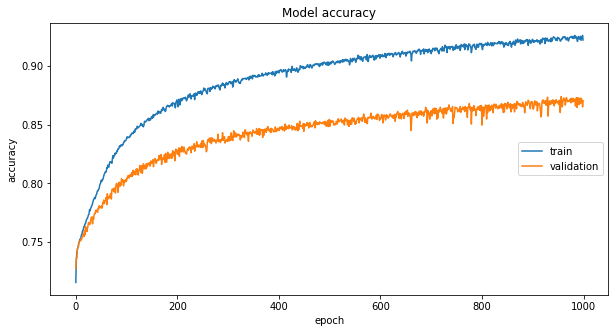

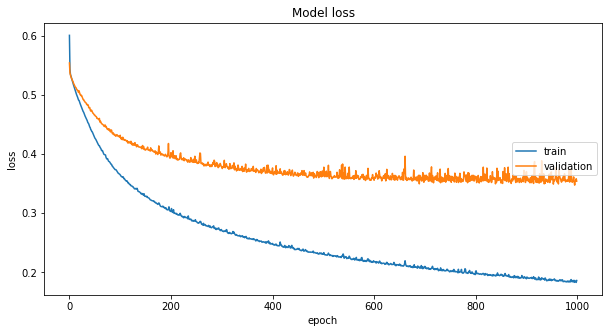

In [ ]:
print(history.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

### 11.1.2 Dropout = 0.5

In [ ]:
MPModel2 = Sequential()
MPModel2.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
MPModel2.add(Dropout(0.5))
MPModel2.add(Dense(2, activation='sigmoid'))
MPModel2.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               28500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = MPModel2.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation))

Epoch 1/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.6184 - acc: 0.6802 - val_loss: 0.5577 - val_acc: 0.7222
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5538 - acc: 0.7293 - val_loss: 0.5387 - val_acc: 0.7350
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5423 - acc: 0.7380 - val_loss: 0.5349 - val_acc: 0.7373
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5377 - acc: 0.7402 - val_loss: 0.5319 - val_acc: 0.7432
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5346 - acc: 0.7423 - val_loss: 0.5302 - val_acc: 0.7435
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5317 - acc: 0.7447 - val_loss: 0.5283 - val_acc: 0.7452
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5289 - acc: 0.7459 - val_loss: 0.5265 - val_acc: 0.7471
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
# evaluate the model
train_acc2 = MPModel2.evaluate(X_train, y_train)
val_acc2 = MPModel2.evaluate(X_validation, y_validation)
test_acc2 = MPModel2.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc2)
print(val_acc2)
print(test_acc2)

457/457 [==============================] - 1s 2ms/step - loss: 0.3925 - acc: 0.8285
loss, accuracy
[0.3155764639377594, 0.864814043045044]
[0.390667587518692, 0.8249828815460205]
[0.3924964368343353, 0.8285225629806519]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


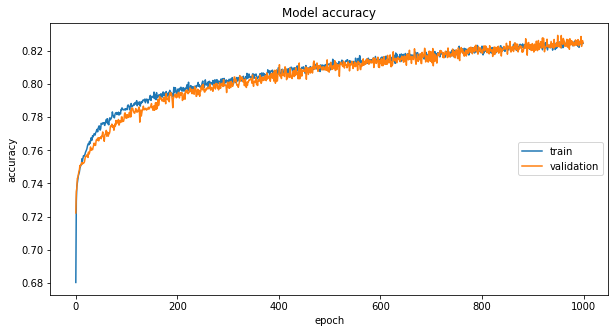

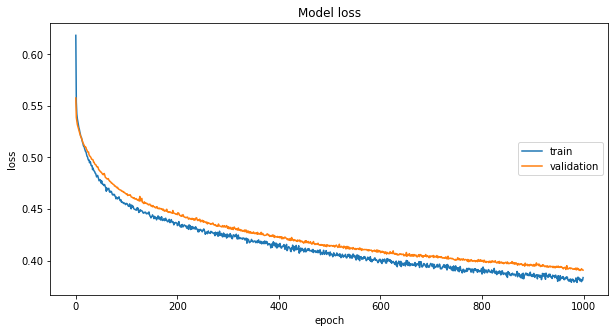

In [ ]:
print(history2.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

### 11.1.3 Early stopping Dropout 0.5

In [ ]:
MPModel3 = Sequential()
MPModel3.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
MPModel3.add(Dropout(0.5))
MPModel3.add(Dense(2, activation='sigmoid'))
MPModel3.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               28500     
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1)
history3 = MPModel3.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation), callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.6336 - acc: 0.6601 - val_loss: 0.5646 - val_acc: 0.7178
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5573 - acc: 0.7258 - val_loss: 0.5396 - val_acc: 0.7353
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5416 - acc: 0.7383 - val_loss: 0.5343 - val_acc: 0.7394
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5374 - acc: 0.7409 - val_loss: 0.5321 - val_acc: 0.7410
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5345 - acc: 0.7416 - val_loss: 0.5299 - val_acc: 0.7420
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5320 - acc: 0.7434 - val_loss: 0.5282 - val_acc: 0.7433
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5289 - acc: 0.7457 - val_loss: 0.5268 - val_acc: 0.7468
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
# evaluate the model
train_acc3 = MPModel3.evaluate(X_train, y_train)
val_acc3 = MPModel3.evaluate(X_validation, y_validation)
test_acc3 = MPModel3.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc3)
print(val_acc3)
print(test_acc3)

457/457 [==============================] - 1s 2ms/step - loss: 0.4927 - acc: 0.7681
loss, accuracy
[0.4661853015422821, 0.7829200625419617]
[0.4882676899433136, 0.770348846912384]
[0.4926969110965729, 0.7680574655532837]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


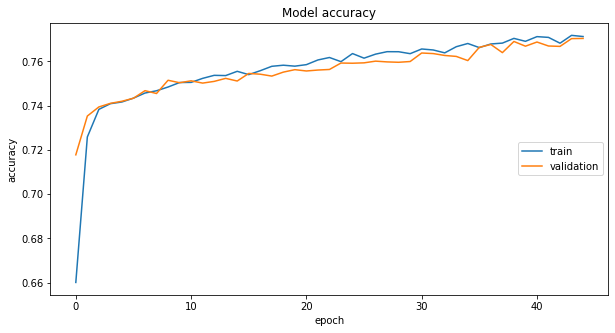

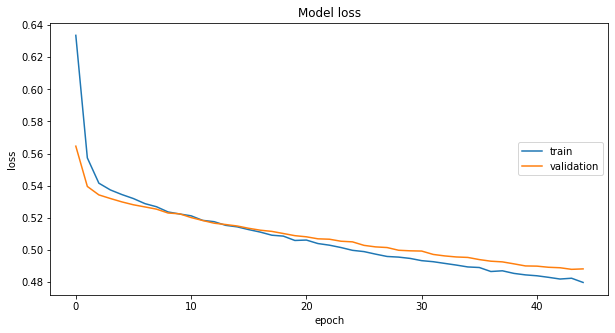

In [ ]:
print(history3.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

## 11.2 DataFrame Upsample relu softmax

### 11.2.1 non Dropout

In [ ]:
upDF = pd.read_csv('/content/drive/My Drive/Machine_Learning/Data/upsample_bank-additional-full.csv');
y = upDF['y'].values
X = upDF.drop('y', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_validation = keras.utils.to_categorical(y_validation, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(46780, 56)
(14620, 56)
(11696, 56)
(46780, 2)
(14620, 2)
(11696, 2)


In [ ]:
MPModel = Sequential()
MPModel.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
MPModel.add(Dense(2, activation='softmax'))
MPModel.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               28500     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = MPModel.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation))

Epoch 1/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.5752 - acc: 0.7142 - val_loss: 0.5401 - val_acc: 0.7354
Epoch 2/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.5359 - acc: 0.7413 - val_loss: 0.5317 - val_acc: 0.7420
Epoch 3/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.5295 - acc: 0.7440 - val_loss: 0.5307 - val_acc: 0.7433
Epoch 4/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5263 - acc: 0.7464 - val_loss: 0.5257 - val_acc: 0.7474
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5214 - acc: 0.7492 - val_loss: 0.5231 - val_acc: 0.7499
Epoch 6/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5176 - acc: 0.7507 - val_loss: 0.5194 - val_acc: 0.7510
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5138 - acc: 0.7521 - val_loss: 0.5171 - val_acc: 0.7536
Epoch 8/1000
24/24 [==============================] - 0s 6ms/step - loss: 0

In [ ]:
# evaluate the model
train_acc = MPModel.evaluate(X_train, y_train)
val_acc = MPModel.evaluate(X_validation, y_validation)
test_acc = MPModel.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc)
print(val_acc)
print(test_acc)

457/457 [==============================] - 1s 2ms/step - loss: 0.3723 - acc: 0.8771
loss, accuracy
[0.16514389216899872, 0.9303120970726013]
[0.3623916506767273, 0.8794459700584412]
[0.37234756350517273, 0.8770861625671387]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


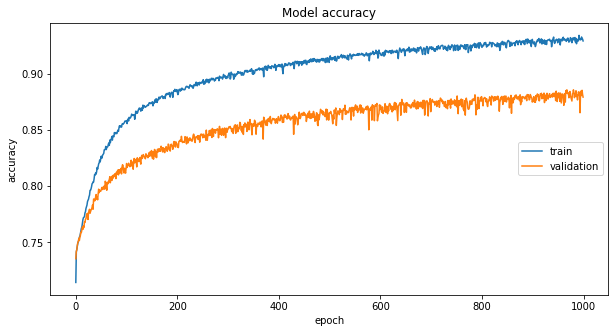

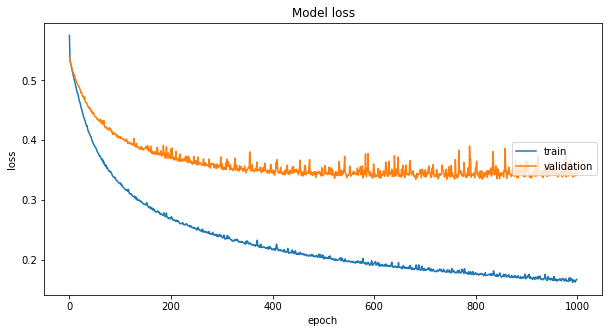

In [ ]:
print(history.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

### 11.2.2 Dropout = 0.5

In [ ]:
MPModel2 = Sequential()
MPModel2.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
MPModel2.add(Dropout(0.5))
MPModel2.add(Dense(2, activation='softmax'))
MPModel2.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               28500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = MPModel2.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation))

Epoch 1/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.6068 - acc: 0.6674 - val_loss: 0.5466 - val_acc: 0.7262
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5492 - acc: 0.7340 - val_loss: 0.5362 - val_acc: 0.7357
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5393 - acc: 0.7391 - val_loss: 0.5318 - val_acc: 0.7391
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5358 - acc: 0.7423 - val_loss: 0.5292 - val_acc: 0.7450
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5311 - acc: 0.7450 - val_loss: 0.5274 - val_acc: 0.7435
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5287 - acc: 0.7473 - val_loss: 0.5251 - val_acc: 0.7460
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5248 - acc: 0.7484 - val_loss: 0.5233 - val_acc: 0.7482
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
# evaluate the model
train_acc2 = MPModel2.evaluate(X_train, y_train)
val_acc2 = MPModel2.evaluate(X_validation, y_validation)
test_acc2 = MPModel2.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc2)
print(val_acc2)
print(test_acc2)

457/457 [==============================] - 1s 2ms/step - loss: 0.3682 - acc: 0.8396
loss, accuracy
[0.2821198105812073, 0.8794142603874207]
[0.36004993319511414, 0.8409712910652161]
[0.3682306706905365, 0.8396033048629761]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


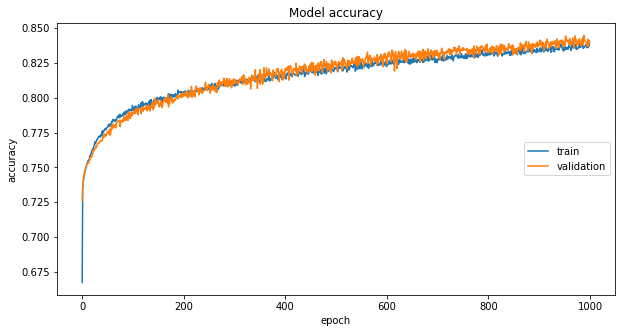

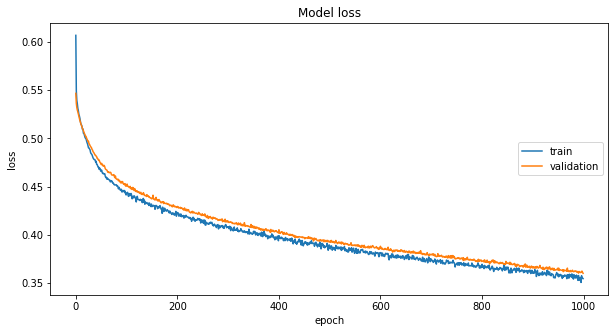

In [ ]:
print(history2.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

### 11.2.3 Early stopping Dropout 0.5

In [ ]:
MPModel3 = Sequential()
MPModel3.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
MPModel3.add(Dropout(0.5))
MPModel3.add(Dense(2, activation='softmax'))
MPModel3.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               28500     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1)
history3 = MPModel3.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation), callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.5965 - acc: 0.6838 - val_loss: 0.5429 - val_acc: 0.7314
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5467 - acc: 0.7336 - val_loss: 0.5339 - val_acc: 0.7378
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5383 - acc: 0.7395 - val_loss: 0.5312 - val_acc: 0.7391
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5342 - acc: 0.7424 - val_loss: 0.5304 - val_acc: 0.7409
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5308 - acc: 0.7425 - val_loss: 0.5257 - val_acc: 0.7463
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5273 - acc: 0.7458 - val_loss: 0.5239 - val_acc: 0.7473
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5238 - acc: 0.7490 - val_loss: 0.5216 - val_acc: 0.7505
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
# evaluate the model
train_acc3 = MPModel3.evaluate(X_train, y_train)
val_acc3 = MPModel3.evaluate(X_validation, y_validation)
test_acc3 = MPModel3.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc3)
print(val_acc3)
print(test_acc3)

457/457 [==============================] - 1s 2ms/step - loss: 0.5058 - acc: 0.7614
loss, accuracy
[0.48500436544418335, 0.7728943824768066]
[0.5013138651847839, 0.7647913694381714]
[0.505809485912323, 0.7614226937294006]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


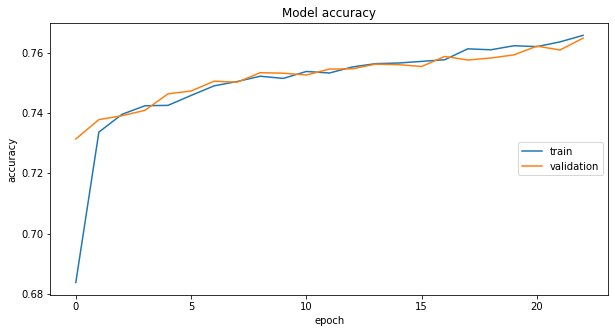

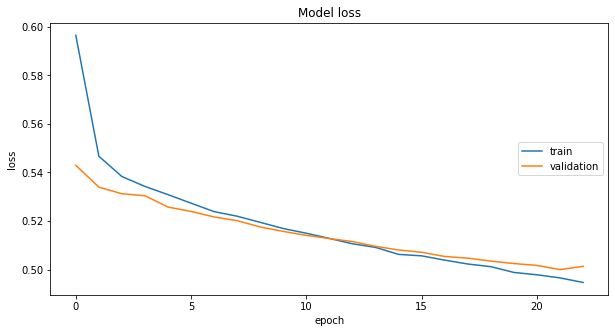

In [ ]:
print(history3.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

## 11.3 DataFrame Upsample sigmoid sigmoid

### 11.3.1 non Dropout

In [ ]:
upDF = pd.read_csv('/content/drive/My Drive/Machine_Learning/Data/upsample_bank-additional-full.csv');
y = upDF['y'].values
X = upDF.drop('y', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_validation = keras.utils.to_categorical(y_validation, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(46780, 56)
(14620, 56)
(11696, 56)
(46780, 2)
(14620, 2)
(11696, 2)


In [ ]:
MPModel = Sequential()
MPModel.add(Dense(500, input_dim=X_train.shape[1], activation='sigmoid'))
MPModel.add(Dense(2, activation='sigmoid'))
MPModel.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               28500     
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = MPModel.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation))

Epoch 1/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.6634 - acc: 0.6382 - val_loss: 0.6272 - val_acc: 0.7166
Epoch 2/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.6072 - acc: 0.7118 - val_loss: 0.5859 - val_acc: 0.7161
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5754 - acc: 0.7228 - val_loss: 0.5635 - val_acc: 0.7214
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5581 - acc: 0.7288 - val_loss: 0.5522 - val_acc: 0.7282
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5499 - acc: 0.7318 - val_loss: 0.5466 - val_acc: 0.7316
Epoch 6/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5451 - acc: 0.7344 - val_loss: 0.5432 - val_acc: 0.7329
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5419 - acc: 0.7378 - val_loss: 0.5414 - val_acc: 0.7346
Epoch 8/1000
24/24 [==============================] - 0s 5ms/step - loss: 0

In [ ]:
# evaluate the model
train_acc = MPModel.evaluate(X_train, y_train)
val_acc = MPModel.evaluate(X_validation, y_validation)
test_acc = MPModel.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc)
print(val_acc)
print(test_acc)

457/457 [==============================] - 1s 2ms/step - loss: 0.4625 - acc: 0.7891
loss, accuracy
[0.399442195892334, 0.8172295689582825]
[0.4565344452857971, 0.7887312173843384]
[0.46247634291648865, 0.7891244888305664]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


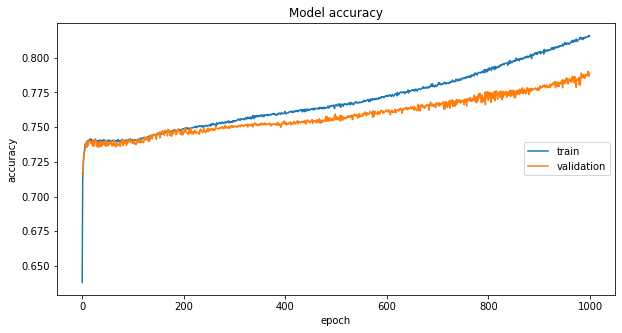

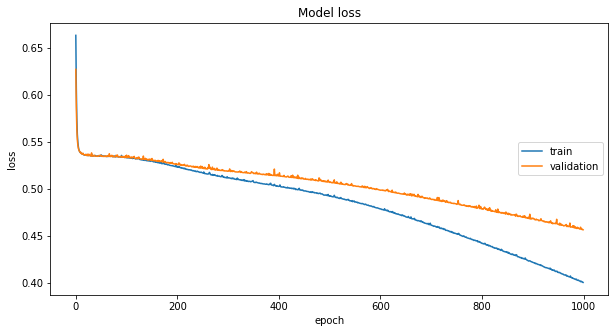

In [ ]:
print(history.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

### 11.3.2 Dropout = 0.5

In [ ]:
MPModel2 = Sequential()
MPModel2.add(Dense(500, input_dim=X_train.shape[1], activation='sigmoid'))
MPModel2.add(Dropout(0.5))
MPModel2.add(Dense(2, activation='sigmoid'))
MPModel2.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 500)               28500     
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = MPModel2.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation))

Epoch 1/1000
24/24 [==============================] - 0s 19ms/step - loss: 0.7163 - acc: 0.5580 - val_loss: 0.6318 - val_acc: 0.6885
Epoch 2/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.6579 - acc: 0.6364 - val_loss: 0.5938 - val_acc: 0.7225
Epoch 3/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.6190 - acc: 0.6811 - val_loss: 0.5707 - val_acc: 0.7201
Epoch 4/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5970 - acc: 0.6970 - val_loss: 0.5588 - val_acc: 0.7267
Epoch 5/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5837 - acc: 0.7077 - val_loss: 0.5517 - val_acc: 0.7284
Epoch 6/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5754 - acc: 0.7134 - val_loss: 0.5477 - val_acc: 0.7310
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5694 - acc: 0.7179 - val_loss: 0.5450 - val_acc: 0.7328
Epoch 8/1000
24/24 [==============================] - 0s 6ms/step - loss: 0

In [ ]:
# evaluate the model
train_acc2 = MPModel2.evaluate(X_train, y_train)
val_acc2 = MPModel2.evaluate(X_validation, y_validation)
test_acc2 = MPModel2.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc2)
print(val_acc2)
print(test_acc2)

457/457 [==============================] - 1s 2ms/step - loss: 0.4619 - acc: 0.7832
loss, accuracy
[0.41131705045700073, 0.8065198659896851]
[0.4579973816871643, 0.7834302186965942]
[0.4618535041809082, 0.7832421064376831]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


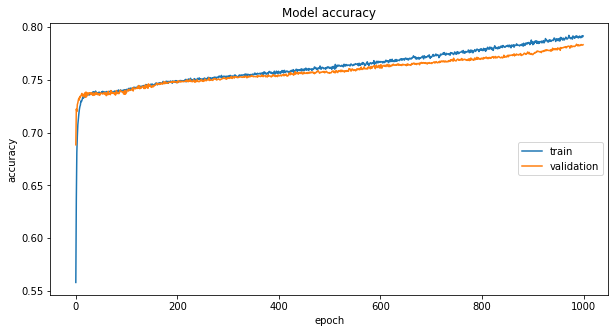

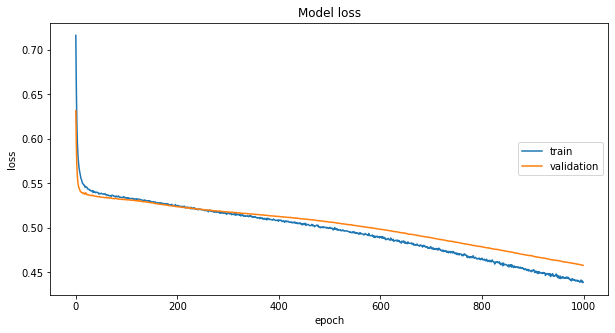

In [ ]:
print(history2.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

### 11.3.3 Early stopping Dropout 0.5

In [ ]:
MPModel3 = Sequential()
MPModel3.add(Dense(500, input_dim=X_train.shape[1], activation='sigmoid'))
MPModel3.add(Dropout(0.5))
MPModel3.add(Dense(2, activation='sigmoid'))
MPModel3.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
MPModel3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               28500     
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 1002      
Total params: 29,502
Trainable params: 29,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1)
history3 = MPModel3.fit(X_train, y_train, epochs=1000, batch_size=2000,
                    validation_data=(X_validation, y_validation), callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.7333 - acc: 0.5442 - val_loss: 0.6360 - val_acc: 0.7153
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.6665 - acc: 0.6288 - val_loss: 0.5975 - val_acc: 0.7179
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.6286 - acc: 0.6724 - val_loss: 0.5751 - val_acc: 0.7237
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.6070 - acc: 0.6889 - val_loss: 0.5623 - val_acc: 0.7262
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5911 - acc: 0.7048 - val_loss: 0.5545 - val_acc: 0.7255
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5822 - acc: 0.7101 - val_loss: 0.5493 - val_acc: 0.7307
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5762 - acc: 0.7145 - val_loss: 0.5464 - val_acc: 0.7341
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
# evaluate the model
train_acc3 = MPModel3.evaluate(X_train, y_train)
val_acc3 = MPModel3.evaluate(X_validation, y_validation)
test_acc3 = MPModel3.evaluate(X_test, y_test)
print('loss, accuracy')
print(train_acc3)
print(val_acc3)
print(test_acc3)

457/457 [==============================] - 1s 2ms/step - loss: 0.5466 - acc: 0.7347
loss, accuracy
[0.542147159576416, 0.7392047643661499]
[0.542460560798645, 0.7376881241798401]
[0.5465512275695801, 0.7346785068511963]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


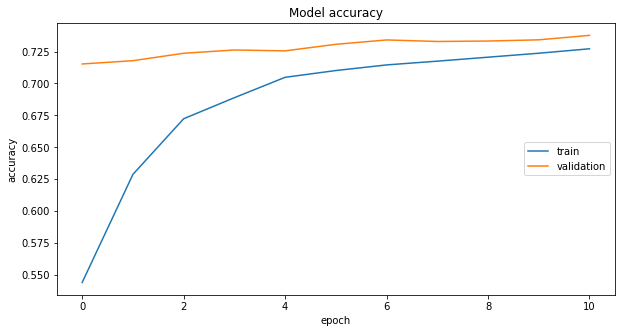

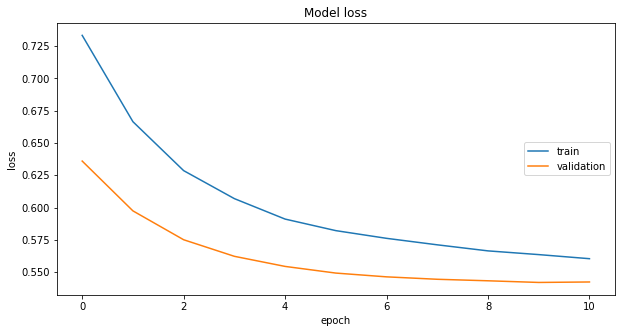

In [ ]:
print(history3.history.keys())
# accuracy
plt.figure(figsize=(10,5))
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# loss
plt.figure(figsize=(10,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# 12. Overfitting

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

# 13. Convolution Neural Network

https://www.tensorflow.org/tutorials/images/cnn

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape)
print(train_images)
print(train_labels.shape)
print(train_labels)

(50000, 32, 32, 3)
[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 

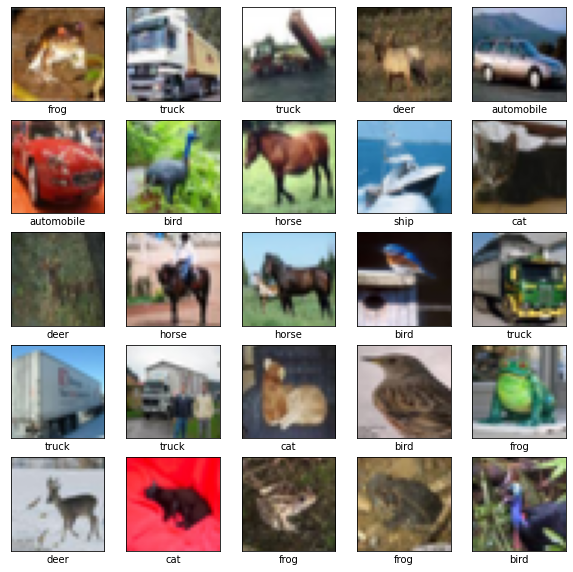

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5247 - accuracy: 0.4484 - val_loss: 1.2397 - val_accuracy: 0.5589
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1577 - accuracy: 0.5895 - val_loss: 1.0422 - val_accuracy: 0.6300
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0022 - accuracy: 0.6450 - val_loss: 0.9678 - val_accuracy: 0.6612
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9060 - accuracy: 0.6829 - val_loss: 0.9086 - val_accuracy: 0.6792
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8389 - accuracy: 0.7059 - val_loss: 0.8795 - val_accuracy: 0.6954
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7797 - accuracy: 0.7251 - val_loss: 0.8475 - val_accuracy: 0.7082
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7264 - accuracy: 0.7429 - val_loss: 0.9241 - val_accuracy:

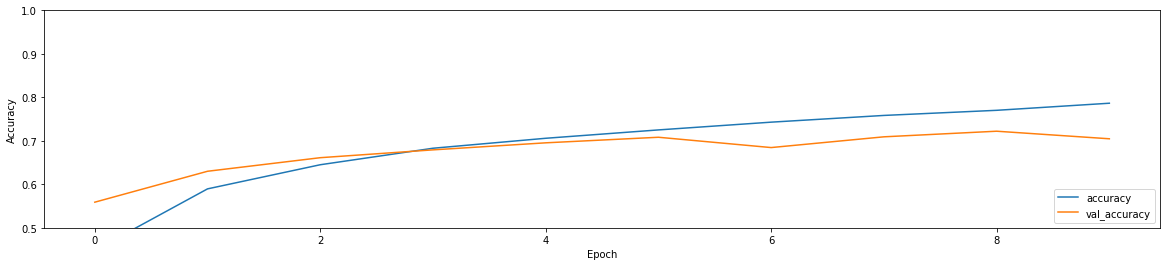

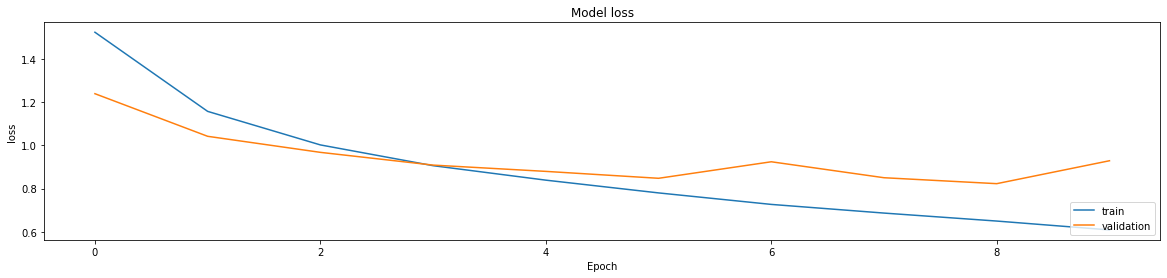

313/313 - 1s - loss: 0.9289 - accuracy: 0.7047


In [ ]:
plt.figure(figsize=(20,4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
# loss
plt.figure(figsize=(20,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7046999931335449
